# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
import country_converter as coco

# –ò–º–ø–æ—Ä—Ç –¥–ª—è –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, classification_report, confusion_matrix, 
                           precision_score, recall_score, precision_recall_curve, average_precision_score)
from sklearn.utils.class_weight import compute_class_weight

# –ò–º–ø–æ—Ä—Ç –º–æ–¥–µ–ª–µ–π
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.svm import SVC            -- –°–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–∞ —Ç–∞–∫–æ–º –æ–±—ä—ë–º–µ –¥–∞–Ω–Ω—ã—Ö
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool

# –î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏
import shap

# –ò–º–ø–æ—Ä—Ç –¥–ª—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
import optuna
from optuna.samplers import TPESampler
import time

from scipy.optimize import minimize
from scipy.stats import rankdata

# –î–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Word2Vec
from gensim.models import Word2Vec

# SBERT
from sentence_transformers import SentenceTransformer

# PyTorch –¥–ª—è MLP
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn.init import kaiming_normal_, constant_  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω—É–∂–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

# –î–ª—è —Ç–∞–±–ª–∏—á–Ω—ã—Ö —Ç—Ä–∞–Ω—Å–æ—Ñ—Ä–º–µ—Ä–æ–≤
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –¥–ª—è –∫—Ä–∞—Å–∏–≤—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –∏ —á–∏—Å–µ–ª
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
pd.set_option("display.float_format", "{:.3f}".format)
warnings.filterwarnings('ignore')


In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dima\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dima\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


–î–∞–Ω–Ω—ã–µ —è –±–µ—Ä—É [–æ—Ç—Å—é–¥–∞](https://www.kaggle.com/datasets/codename007/funding-successful-projects?select=train.csv). –í—ã–±—Ä–∞–ª –∏–º–µ–Ω–Ω–æ —ç—Ç–æ—Ç –¥–∞—Ç–∞—Å–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –≤ –Ω—ë–º –±—ã–ª–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞ –∏ –≤ –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ —è —Ö–æ—á—É –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ –æ–ø–∏—Å–∞–Ω–∏–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

project_id                                               name  \
0  kkst1451568084                                drawing for dollars   
1  kkst1474482071  Sponsor Dereck Blackburn (Lostwars) Artist in ...   
2   kkst183622197                                      Mr. Squiggles   
3   kkst597742710                     Help me write my second novel.   
4  kkst1913131122             Support casting my sculpture in bronze   

                                                desc     goal  \
0  I like drawing pictures. and then i color them...   20.000   
1  I, Dereck Blackburn will be taking upon an inc...  300.000   
2  So I saw darkpony's successfully funded drawin...   30.000   
3  Do your part to help out starving artists and ...  500.000   
4  I'm nearing completion on a sculpture, current... 2000.000   

                                            keywords  disable_communication  \
0                                drawing-for-dollars                  False   
1  sponsor-dereck-blackburn-lostwars-artist-in-re...                  False   
2                                       mr-squiggles                  False   
3                      help-me-write-my-second-novel                  False   
4             support-casting-my-sculpture-in-bronze                  False   

  country currency    deadline  state_changed_at  created_at  launched_at  \
0      US      USD  1241333999        1241334017  1240600507   1240602723   
1      US      USD  1242429000        1242432018  1240960224   1240975592   
2      US      USD  1243027560        1243027818  1242163613   1242164398   
3      US      USD  1243555740        1243556121  1240963795   1240966730   
4      US      USD  1243769880        1243770317  1241177914   1241180541   

   backers_count  final_status  
0              3             1  
1              2             0  
2              0             0  
3             18             1  
4              1             0

In [3]:
dict(data_train.iloc[0])

{'project_id': 'kkst1451568084',
 'name': 'drawing for dollars',
 'desc': 'I like drawing pictures. and then i color them too. so i thought i would suggest something for me to draw and then if someone wants...',
 'goal': 20.0,
 'keywords': 'drawing-for-dollars',
 'disable_communication': False,
 'country': 'US',
 'currency': 'USD',
 'deadline': 1241333999,
 'state_changed_at': 1241334017,
 'created_at': 1240600507,
 'launched_at': 1240602723,
 'backers_count': 3,
 'final_status': 1}

In [99]:
data_test.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at'],
      dtype='object')

In [100]:
data_train.drop(['project_id'], axis= 1, inplace = True)

# EDA

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—â–µ–µ –æ–ø–∏—Å–∞–Ω–∏–µ

In [101]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–µ–º–ø–ª–æ–≤ (—Å—Ç—Ä–æ–∫) —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: ", data_train.shape[0])
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ", data_train.shape[1])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–µ–º–ø–ª–æ–≤ (—Å—Ç—Ä–æ–∫) —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:  108129
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:  13


In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   108126 non-null  object 
 1   desc                   108119 non-null  object 
 2   goal                   108129 non-null  float64
 3   keywords               108129 non-null  object 
 4   disable_communication  108129 non-null  bool   
 5   country                108129 non-null  object 
 6   currency               108129 non-null  object 
 7   deadline               108129 non-null  int64  
 8   state_changed_at       108129 non-null  int64  
 9   created_at             108129 non-null  int64  
 10  launched_at            108129 non-null  int64  
 11  backers_count          108129 non-null  int64  
 12  final_status           108129 non-null  int64  
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 10.0+ MB


In [103]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project_id             63465 non-null  object 
 1   name                   63465 non-null  object 
 2   desc                   63461 non-null  object 
 3   goal                   63465 non-null  float64
 4   keywords               63465 non-null  object 
 5   disable_communication  63465 non-null  bool   
 6   country                63465 non-null  object 
 7   currency               63465 non-null  object 
 8   deadline               63465 non-null  int64  
 9   state_changed_at       63465 non-null  int64  
 10  created_at             63465 non-null  int64  
 11  launched_at            63465 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 5.4+ MB


–ü—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ—á—Ç–∏ –Ω–µ—Ç. –î–∞–Ω–Ω—ã–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞.

–û–¥–Ω–∞–∫–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –±–µ–∑ –æ–ø–∏—Å–∞–Ω–∏—è (4 –ø—Ä–æ–µ–∫—Ç–∞) - –∏—Ö –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω–æ –Ω–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏.

## –†–∞–±–æ—Ç–∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

In [104]:
data_train.isna().sum()

name                      3
desc                     10
goal                      0
keywords                  0
disable_communication     0
country                   0
currency                  0
deadline                  0
state_changed_at          0
created_at                0
launched_at               0
backers_count             0
final_status              0
dtype: int64

–ó–∞–ø–∏—Å–µ–π —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –º–∞–ª–æ —Ç–∞–∫ —á—Ç–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —ç—Ç–æ –∑–∞ –ø—Ä–æ–µ–∫—Ç—ã

In [105]:
data_train[data_train.isna().any(axis=1)]

name desc        goal  \
13244                                                 NaN  NaN   35000.000   
16386                                                 NaN  NaN  200000.000   
19276                                      N/A (Canceled)  NaN   50000.000   
32837                                                 NaN  ...    2000.000   
67393   OF Press - A WordPress Theme and Site Builder ...  NaN    5000.000   
67632            Blue Heart - Natural Remedies (Canceled)  NaN    1500.000   
68852                          Vending Machine (Canceled)  NaN     100.000   
73740                                     None (Canceled)  NaN    2500.000   
75158                                     TEST (Canceled)  NaN 1000001.000   
98721                                      N/A (Canceled)  NaN  100000.000   
104401                                    None (Canceled)  NaN     500.000   

                                                 keywords  \
13244      you-have-the-power-to-put-our-film-in-theaters   
16386                                  bullied-to-triumph   
19276                                        the-lineup-0   
32837                       unlamentia-straima-maybe-more   
67393                                            of-press   
67632                         blue-heart-natural-remedies   
68852                 online-sticker-book-vending-machine   
73740          electroboard-the-new-electronic-skateboard   
75158   caiman-connected-the-ultimate-mobile-device-ac...   
98721      international-festival-of-language-and-culture   
104401  2-songs-seduce-your-dreams-pop-and-latin-kizom...   

        disable_communication country currency    deadline  state_changed_at  \
13244                   False      US      USD  1323061140        1323061142   
16386                   False      US      USD  1330524240        1330524241   
19276                   False      US      USD  1335042707        1331581327   
32837                   False      GB      GBP  1357509600        1357509632   
67393                   False      US      USD  1407707123        1406761089   
67632                   False      US      USD  1407811896        1407024116   
68852                   False      US      USD  1408334400        1408333920   
73740                   False      CA      CAD  1410878293        1408449352   
75158                   False      US      USD  1411793329        1411694770   
98721                   False      US      USD  1427901540        1424449267   
104401                  False      US      USD  1430928908        1430446941   

        created_at  launched_at  backers_count  final_status  
13244   1320612894   1320620155              5             0  
16386   1325021401   1325417731              1             0  
19276   1331063276   1331158307              0             0  
32837   1355858653   1355957868             12             0  
67393   1405032789   1405115123              4             0  
67632   1404522581   1405219896              3             0  
68852   1406991938   1407441222              2             0  
73740   1408279774   1408286293              4             0  
75158   1410013102   1410583729              2             0  
98721   1424103554   1424210815              0             0  
104401  1429640876   1430064908              0             0

–í–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ —ç—Ç–∏ –ø—Ä–æ–µ–∫—Ç—ã –ø—Ä–æ–≤–∞–ª–∏–ª–∏—Å—å –∏–ª–∏ –¥–∞–∂–µ —Å–∫–æ—Ä–µ–µ –±—ã–ª–∏ –æ—Ç–º–µ–Ω–µ–Ω—ã. –û—Ç–º–µ–Ω—è—è –∞–≤—Ç–æ—Ä—ã –≤–∏–¥–∏–º–æ —É–±—Ä–∞–ª–∏ –æ–ø–∏—Å–∞–Ω–∏–µ.

–¢–∞–∫ –∫–∞–∫ –Ω–∞—Å –∏–Ω–µ—Ä–µ—Å—É–µ—Ç –æ–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∫—Ä–∞–π–Ω–µ –º–∞–ª–æ, —Ç–æ —è –ø—Ä–æ—Å—Ç–æ –≤—ã–∫–∏–Ω—É –∏—Ö.

–í —Ü–µ–ª–æ–º –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É, —Ç–æ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü name –Ω–µ –≤—Å–µ–≥–¥–∞ –æ—Ç—Ä–∞–∂–∞–µ—Ç –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å. –í–∏–¥–∏–º–æ —Å–∞–π—Ç –ª–∏–±–æ —Å–æ–∑–¥–∞—Ç–µ–ª–∏ –ø—Ä–æ–µ–∫—Ç–∞ –∏–∑–º–µ–Ω—è—é—Ç –µ–≥–æ –ø–æ—Å—Ç—Ñ–∞–∫—Ç—É–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–ª—è—è –ø—Ä–∏–ø–∏—Å–∫—É Canceled –∏–ª–∏ –≤–æ–≤—Å–µ –∑–∞–º–µ–Ω—è—è –Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–∞ —Ä–∞–Ω–¥–æ–º–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è). –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ç–æ–ª–±—Ü–æ–º name –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –Ω–µ–ª—å–∑—è - –ø–æ—ç—Ç–æ–º—É –º—ã –∑–∞–º–µ–Ω–∏–º –µ–≥–æ –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ keywords - —Ç–∞–º –¥–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—ë—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π, —Ö–æ—Ç—è —á–∞—Å—Ç—å –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –∏ —ç–∫—Å–ø—Ä–µ—Å—Å–∏–∏, –≤—Ä–æ–¥–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞, —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ –∏ —ç–º–æ–¥–∑–∏ –≤—ã–ª–µ—Ç–∏—Ç.

In [106]:
data_train['name'] = data_train['keywords'].str.split('-').str.join(' ')
data_train.drop(['keywords'], axis=1, inplace=True)

data_test['name'] = data_test['keywords'].str.split('-').str.join(' ')
data_test.drop(['keywords'], axis=1, inplace=True)

In [107]:
data_train.isna().sum()

name                      0
desc                     10
goal                      0
disable_communication     0
country                   0
currency                  0
deadline                  0
state_changed_at          0
created_at                0
launched_at               0
backers_count             0
final_status              0
dtype: int64

In [108]:
data_train.dropna(inplace=True)

## –î–∞—Ç—ã

–ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç —Å—Ç–æ–ª–±—Ü—ã —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∞, –∑–∞–ø—É—Å–∫–∞ –ø—Ä–æ–µ–∫—Ç–∞, –¥–µ–¥–ª–∞–π–Ω–∞ –∏ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è (–ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è) –ø—Ä–æ–µ–∫—Ç–∞. –°–Ω–∞—á–∞–ª–∞ –ø–µ—Ä–µ–≤–µ–¥—ë–º –∏—Ö –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã.

In [109]:
data_train["launched_at"] = pd.to_datetime(data_train["launched_at"], unit="s")
data_train["created_at"] = pd.to_datetime(data_train["created_at"], unit="s")
data_train["deadline"] = pd.to_datetime(data_train["deadline"], unit="s")
data_train["state_changed_at"] = pd.to_datetime(data_train["state_changed_at"], unit="s")

data_test["launched_at"] = pd.to_datetime(data_test["launched_at"], unit="s")
data_test["created_at"] = pd.to_datetime(data_test["created_at"], unit="s")
data_test["deadline"] = pd.to_datetime(data_test["deadline"], unit="s")
data_test["state_changed_at"] = pd.to_datetime(data_test["state_changed_at"], unit="s")

data_train["launched_at"].describe()

count                           108119
mean     2013-08-23 22:48:44.862734592
min                2009-04-24 19:52:03
25%                2012-08-02 14:24:28
50%                2014-01-28 00:11:06
75%         2014-10-08 22:34:35.500000
max                2015-05-26 16:41:13
Name: launched_at, dtype: object

–î–∞—Ç–∞ –∑–∞–ø—É—Å–∫–∞ –ø—Ä–æ–µ–∫—Ç–∞ –∏–≥—Ä–∞–µ—Ç –±–æ–ª—å—à—É—é —Ä–æ–ª—å, –ø–æ—ç—Ç–æ–º—É –µ—ë –∏–º–µ–µ—Ç —Å–º—ã—Å–ª —Ä–∞–∑–æ–±—Ä–∞—Ç—å –Ω–∞ –º–µ—Å—è—Ü, –¥–µ–Ω—å –∏ –≥–æ–¥ –∑–∞–ø—É—Å–∫–∞:
- –≥–æ–¥ –æ—Å—Ç–∞–≤–ª—è–µ–º –≤ –≤–∏–¥–µ —Ç—Ä–µ–Ω–¥–∞ (–≤—ã—á–∏—Ç–∞–µ–º –º–∏–Ω–∏–º—É–º)
- –º–µ—Å—è—Ü –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —á–µ—Ä–µ–∑ OHE
- –¥–µ–Ω—å –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —á–µ—Ä–µ–∑ —Å–∏–Ω—É—Å –∏ –∫–æ—Å–∏–Ω—É—Å, —á—Ç–æ–±—ã –∑–∞–∫—Ä–µ–ø–∏—Ç—å —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å
- –æ—Ç–¥–µ–ª—å–Ω–æ –≤—ã–¥–µ–ª–∏–º –±—ã–ª –ª–∏ –∑–∞–ø—É—Å–∫ –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã—Ö

In [110]:
# –ì–æ–¥
data_train["year_trend"] = data_train["launched_at"].dt.year - data_train["launched_at"].dt.year.min()
data_test["year_trend"] = data_test["launched_at"].dt.year - data_test["launched_at"].dt.year.min()

# –ú–µ—Å—è—Ü
data_train['month_launched'] = data_train["launched_at"].dt.month.astype("category")
data_test['month_launched'] = data_test["launched_at"].dt.month.astype("category")

# –î–µ–ª–∞–µ–º OHE –º–µ—Å—è—Ü–∞
data_train = pd.get_dummies(
    data_train,
    columns=["month_launched"],
    prefix="month_launched",        
    prefix_sep="_",        
    drop_first=True        
)
data_test = pd.get_dummies(
    data_test,
    columns=["month_launched"],
    prefix="month_launched",        
    prefix_sep="_",        
    drop_first=True        
)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–Ω—è
data_train["day_sin"] = np.sin(2 * np.pi * data_train["launched_at"].dt.day / 31)
data_train["day_cos"] = np.cos(2 * np.pi * data_train["launched_at"].dt.day / 31)

data_test["day_sin"] = np.sin(2 * np.pi * data_test["launched_at"].dt.day / 31)
data_test["day_cos"] = np.cos(2 * np.pi * data_test["launched_at"].dt.day / 31)

# –§–ª–∞–≥ –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã–µ
data_train["is_weekend"] = data_train["launched_at"].dt.dayofweek.isin([5, 6]).astype(int)
data_test["is_weekend"] = data_test["launched_at"].dt.dayofweek.isin([5, 6]).astype(int)

In [111]:
data_train.columns

Index(['name', 'desc', 'goal', 'disable_communication', 'country', 'currency',
       'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'final_status', 'year_trend', 'month_launched_2',
       'month_launched_3', 'month_launched_4', 'month_launched_5',
       'month_launched_6', 'month_launched_7', 'month_launched_8',
       'month_launched_9', 'month_launched_10', 'month_launched_11',
       'month_launched_12', 'day_sin', 'day_cos', 'is_weekend'],
      dtype='object')

–û—Å—Ç–∞–ª—å–Ω—ã–µ –¥–∞—Ç—ã –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç —Ç–æ–ª—å–∫–æ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –Ω–∏–º–∏ - –±—É–¥–µ–º –º–µ—Ä–∏—Ç—å –≤ –¥–Ω—è—Ö, –ø–æ—ç—Ç–æ–º—É –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º.

–î–∞—Ç—É —Å–º–µ–Ω—ã —Å—Ç–∞—Ç—É—Å–∞ –ø—Ä–∏–¥—ë—Ç—Å—è —É–±—Ä–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫ –ø–æ –Ω–µ–π –º–æ–∂–Ω–æ –∫–æ—Å–≤–µ–Ω–Ω–æ –ø–æ–Ω—è—Ç—å —É—Å–ø–µ—Ö –ø—Ä–æ–µ–∫—Ç–∞ - –µ—Å–ª–∏ —Å—Ç–∞—Ç—É—Å —Å–º–µ–Ω–∏–ª—Å—è –¥–æ –¥–µ–¥–ª–∞–π–Ω–∞, –∑–Ω–∞—á–∏—Ç –ø—Ä–æ–µ–∫—Ç —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –æ—Ç–º–µ–Ω–∏–ª–∏ –∏–ª–∏ —á—Ç–æ-—Ç–æ –ø–æ–¥–æ–±–Ω–æ–µ (–ø—Ä–∏ —É—Å–ø–µ—Ö–µ —Ä–µ–∂–µ –∑–∞–∫—Ä—ã–≤–∞—é—Ç, —Ç–∞–∫ —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –Ω–∞–±—Ä–∞—Ç—å —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ –±–æ–ª—å—à–µ —Å—É–º–º—ã). –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω–∞ –º–æ–º–µ–Ω—Ç –∑–∞–ø—É—Å–∫–∞ —ç—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∞–º –Ω–µ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –∏–∑–≤–µ—Å—Ç–Ω–∞, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø–æ–¥–≥–ª—è–¥—ã–≤–∞–∏–µ –≤ –±—É–¥—É—â–µ–µ.

In [ ]:
data_train['created_dif'] = (data_train['launched_at'] - data_train['created_at']).dt.days
data_train['campaign_duration'] = (data_train['deadline'] - data_train['launched_at']).dt.days
data_train.drop(['state_changed_at', 'launched_at', 'created_at', 'deadline'], axis = 1, inplace=True)

data_test['created_dif'] = (data_test['launched_at'] - data_test['created_at']).dt.days
data_test['campaign_duration'] = (data_test['deadline'] - data_test['launched_at']).dt.days
data_test.drop(['state_changed_at', 'launched_at', 'created_at', 'deadline'], axis = 1, inplace=True)

In [113]:
data_train.columns

Index(['name', 'desc', 'goal', 'disable_communication', 'country', 'currency',
       'backers_count', 'final_status', 'year_trend', 'month_launched_2',
       'month_launched_3', 'month_launched_4', 'month_launched_5',
       'month_launched_6', 'month_launched_7', 'month_launched_8',
       'month_launched_9', 'month_launched_10', 'month_launched_11',
       'month_launched_12', 'day_sin', 'day_cos', 'is_weekend', 'created_dif',
       'campaign_duration'],
      dtype='object')

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.

## –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

In [114]:
data_train[['disable_communication', 'country', 'currency']]

disable_communication country currency
0                       False      US      USD
1                       False      US      USD
2                       False      US      USD
3                       False      US      USD
4                       False      US      USD
...                       ...     ...      ...
108124                  False      US      USD
108125                  False      US      USD
108126                  False      US      USD
108127                  False      US      USD
108128                  False      US      USD

[108119 rows x 3 columns]

### **disable_communication**

–û—Ç–∫–ª—é—á–µ–Ω–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –≤–∞–∂–Ω—ã–π, —Ö–æ—Ç—è –∏ –∫—Ä–∞–π–Ω–µ —Ä–µ–¥–∫–∏–π –ø—Ä–∏–∑–Ω–∞–∫. –ë–∏–Ω–∞—Ä–∏–∑–∏—Ä—É–µ–º.

In [115]:
data_train['disable_communication'] = data_train['disable_communication'].astype(int)
data_test['disable_communication'] = data_test['disable_communication'].astype(int)

### **country**

In [116]:
data_train['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'NZ', 'NL', 'SE', 'IE', 'NO', 'DK', 'DE'],
      dtype=object)

In [117]:
data_test['country'].unique()

array(['US', 'IT', 'GB', 'AU', 'NO', 'NL', 'SE', 'ES', 'DK', 'CA', 'DE',
       'IE', 'FR', 'NZ', 'CH', 'BE', 'AT', 'LU', 'HK', 'SG', 'MX'],
      dtype=object)

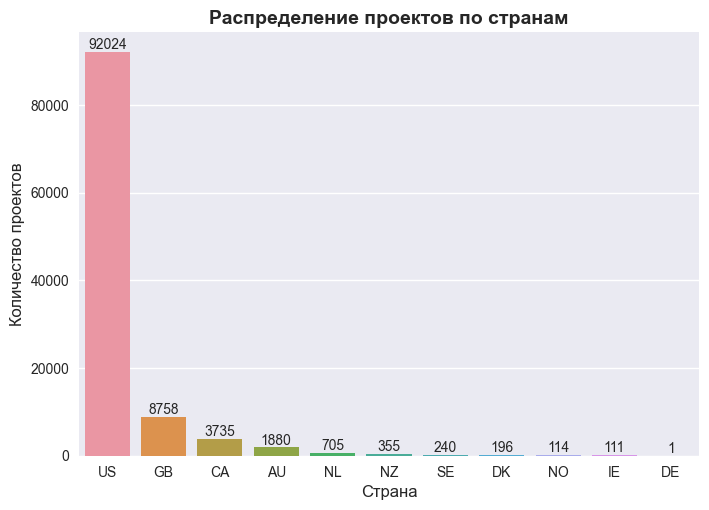

In [118]:
train_counts_info = data_train["country"].value_counts()
sns.countplot(data_train, x = 'country', order = train_counts_info.index)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º', fontsize=14, fontweight='bold')
plt.xlabel('–°—Ç—Ä–∞–Ω–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–µ–∫—Ç–æ–≤', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.show()

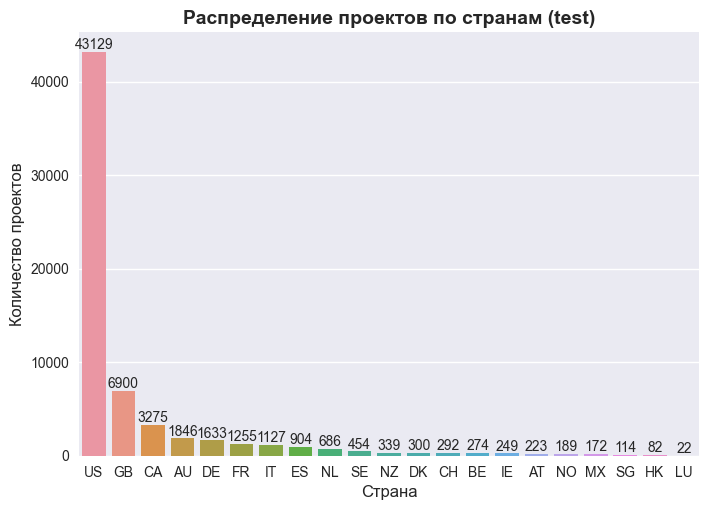

In [119]:
test_counts_info = data_test["country"].value_counts()
sns.countplot(data_test, x = 'country', order=test_counts_info.index)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º (test)', fontsize=14, fontweight='bold')
plt.xlabel('–°—Ç—Ä–∞–Ω–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–µ–∫—Ç–æ–≤', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ –ø–æ–¥–∞–≤–ª—è—é—â–∞—è —á–∞—Å—Ç—å –ø—Ä–æ–µ–∫—Ç–æ–≤ –∏–∑ –°–®–ê. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –º–Ω–æ–≥–æ —Å—Ç—Ä–∞–Ω, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –±—ã–ª–æ –≤ train. –°—Ç—Ä–∞–Ω –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —Ç–∞–∫ —á—Ç–æ —Å—É–∑–∏–º –∏—Ö –¥–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–æ–≤ (–°–µ–≤–µ—Ä–Ω–∞—è –ê–º–µ—Ä–∏–∫–∞, –ï–≤—Ä–æ–ø–∞, –û–∫–µ–∞–Ω–∏—è, –ê–∑–∏—è –∏ —Ç–¥)

In [ ]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∫–æ–¥—ã —Å—Ç—Ä–∞–Ω –≤ —Ä–µ–≥–∏–æ–Ω—ã
cc = coco.CountryConverter()
data_train["region"] = data_train["country"].apply(
    lambda x: cc.convert(names=x, to="continent", not_found="Other")
)

data_test["region"] = data_test["country"].apply(
    lambda x: cc.convert(names=x, to="continent", not_found="Other")
)

In [121]:
data_train["region"].value_counts()

region
America    95759
Europe     10125
Oceania     2235
Name: count, dtype: int64

In [122]:
data_test["region"].value_counts()

region
America    46576
Europe     14508
Oceania     2185
Asia         196
Name: count, dtype: int64

–ê–∑–∏–∏ –æ—á–µ–Ω—å –º–∞–ª–æ –∏ –æ–Ω–∞ —Ç–æ–ª—å–∫–æ –≤ —Ç–µ—Å—Ç–µ, —Ç–∞–∫ —á—Ç–æ –æ–±—ä–µ–¥–µ–Ω—è–µ–º —Å –æ–∫–µ–∞–Ω–∏–µ–π.

In [123]:
data_test["region"] = data_test["region"].apply(lambda x: x if x != 'Asia' else 'Oceania')

–¢–µ–ø–µ—Ä—å –¥–µ–ª–∞–µ–º One Hot Encoding

In [ ]:
data_train = pd.get_dummies(
    data_train,
    columns=["region"],
    prefix="region",        
    prefix_sep="_",        
    drop_first=True        
)
data_test = pd.get_dummies(
    data_test,
    columns=["region"],
    prefix="region",        
    prefix_sep="_",        
    drop_first=True        
)

data_train.drop(['country'], axis=1, inplace=True)
data_test.drop(['country'], axis=1, inplace=True)

### **currency**

In [125]:
data_train['currency'].unique()

array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK'],
      dtype=object)

In [126]:
data_test['currency'].unique()

array(['USD', 'EUR', 'GBP', 'AUD', 'NOK', 'SEK', 'DKK', 'CAD', 'NZD',
       'CHF', 'HKD', 'SGD', 'MXN'], dtype=object)

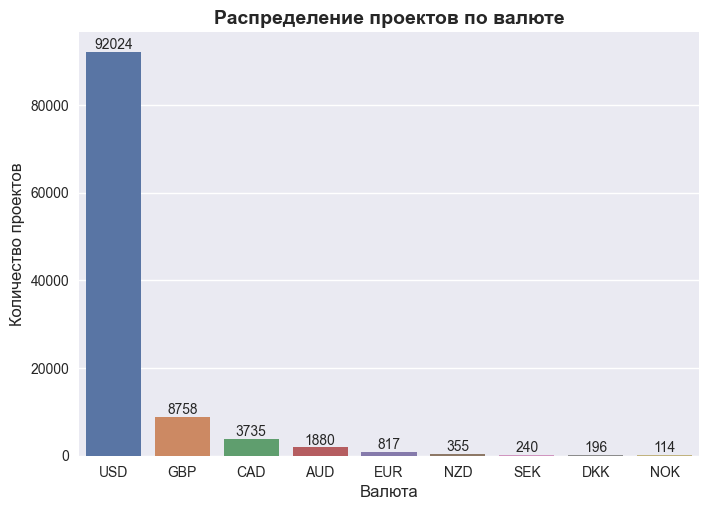

In [127]:
train_counts_info = data_train["currency"].value_counts()
sns.countplot(data_train, x = 'currency', order = train_counts_info.index)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–æ–≤ –ø–æ –≤–∞–ª—é—Ç–µ', fontsize=14, fontweight='bold')
plt.xlabel('–í–∞–ª—é—Ç–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–µ–∫—Ç–æ–≤', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.show()

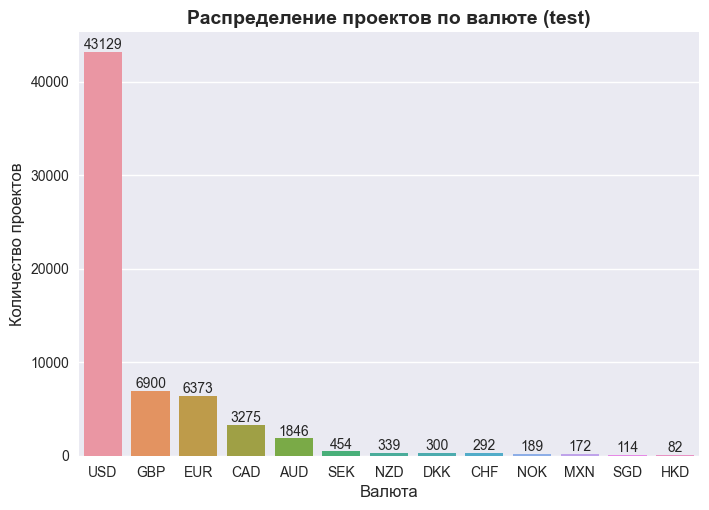

In [128]:
test_counts_info = data_test["currency"].value_counts()
sns.countplot(data_test, x = 'currency', order=test_counts_info.index)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–æ–≤ –ø–æ –≤–∞–ª—é—Ç–µ (test)', fontsize=14, fontweight='bold')
plt.xlabel('–í–∞–ª—é—Ç–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–µ–∫—Ç–æ–≤', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.show()

–û–∂–∏–¥–∞–µ–º–æ —Å–∞–º–∞—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω–∞—è –≤–∞–ª—é—Ç–∞ - –¥–æ–ª–ª–∞—Ä—ã. –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –≤–∞–ª—é—Ç—ã (USD, GBP, EUR –∏ CAD). –û—Å—Ç–∞–ª—å–Ω–æ–µ –ø–æ–ª–æ–∂–∏–º –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é.

In [129]:
main_currencies = set(['USD', 'GBP', 'EUR', 'CAD'])
data_train['currency'] = data_train['currency'].apply(lambda x: x if x in main_currencies else 'Other')
data_test['currency'] = data_test['currency'].apply(lambda x: x if x in main_currencies else 'Other')

–¢–µ–ø–µ—Ä—å –¥–µ–ª–∞–µ–º OHE.

In [130]:
data_train = pd.get_dummies(
    data_train,
    columns=["currency"],
    prefix="currency",        
    prefix_sep="_",        
    drop_first=True        
)
data_test = pd.get_dummies(
    data_test,
    columns=["currency"],
    prefix="currency",        
    prefix_sep="_",        
    drop_first=True        
)

In [131]:
data_train.columns

Index(['name', 'desc', 'goal', 'disable_communication', 'backers_count',
       'final_status', 'year_trend', 'month_launched_2', 'month_launched_3',
       'month_launched_4', 'month_launched_5', 'month_launched_6',
       'month_launched_7', 'month_launched_8', 'month_launched_9',
       'month_launched_10', 'month_launched_11', 'month_launched_12',
       'day_sin', 'day_cos', 'is_weekend', 'created_dif', 'campaign_duration',
       'region_Europe', 'region_Oceania', 'currency_EUR', 'currency_GBP',
       'currency_Other', 'currency_USD'],
      dtype='object')

In [132]:
data_test.columns

Index(['project_id', 'name', 'desc', 'goal', 'disable_communication',
       'year_trend', 'month_launched_2', 'month_launched_3',
       'month_launched_4', 'month_launched_5', 'month_launched_6',
       'month_launched_7', 'month_launched_8', 'month_launched_9',
       'month_launched_10', 'month_launched_11', 'month_launched_12',
       'day_sin', 'day_cos', 'is_weekend', 'created_dif', 'campaign_duration',
       'region_Europe', 'region_Oceania', 'currency_EUR', 'currency_GBP',
       'currency_Other', 'currency_USD'],
      dtype='object')

## –¢–∞—Ä–≥–µ—Ç

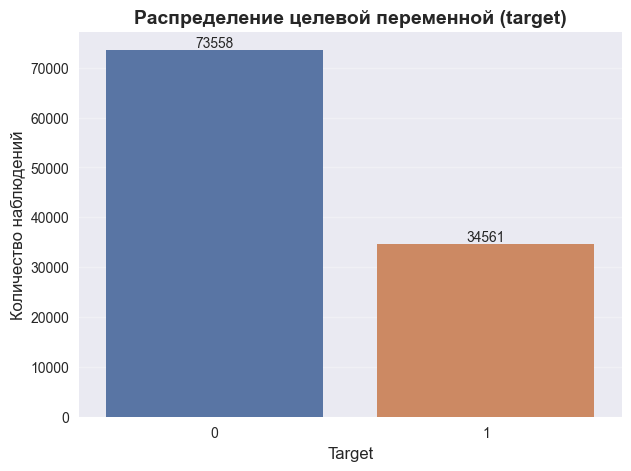

In [133]:
plt.figure(figsize=(7, 5))

sns.countplot(data=data_train, x='final_status')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (target)', fontsize=14, fontweight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π', fontsize=12)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
    
plt.grid(axis='y', alpha=0.3)
plt.show()

–í–∏–¥–µ–Ω —è–≤–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ - –ø—Ä–æ–≤–∞–ª–∏–≤—à–∏—Ö—Å—è –ø—Ä–æ–∫—Ç–æ–≤ –≤ –¥–≤–∞ —Ä–∞–∑–∞ –±–æ–ª—å—à–µ. –≠—Ç–æ –¥–æ–≤–æ–ª—å–Ω–æ –æ–∂–∏–¥–∞–µ–º–æ –¥–ª—è –∫—Ä–∞—É–¥—Ñ–∞—É–Ω–¥–∏–Ω–≥–æ–≤–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å —ç—Ç–æ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å.

## –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train/test

In [134]:
y = data_train['final_status'].copy()
X = data_train.drop(['final_status'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

### Goal

In [135]:
data_train['goal'].describe()

count      108119.000
mean        36716.727
std        971943.060
min             0.010
25%          2000.000
50%          5000.000
75%         13000.000
max     100000000.000
Name: goal, dtype: float64

–ü–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ —É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è —Å–∏–ª—å–Ω—ã–π –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –ø–µ—Ä–µ–∫–æ—Å (–æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–æ–≤ —Å –º–∞–ª–µ–Ω—å–∫–æ–π —Ü–µ–ª—å—é + –≤—ã–±—Ä–æ—Å—ã —Å –±–æ–ª—å—à–∏–º–∏ —Ü–µ–ª—è–º–∏). –ò–∑-–∑–∞ —ç—Ç–æ–≥–æ –æ–±—ã—á–Ω–∞—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –Ω–µ –ø–æ–¥–æ–π–¥—ë—Ç - —Å–Ω–∞—á–∞–ª–∞ —Å–¥–µ–ª–∞–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –∞ –ø–æ—Ç–æ–º –ø—Ä–∏–º–µ–Ω–∏–º RobustScaler (—á—Ç–æ–±—ã —Ç–æ—á–Ω–æ –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤)

In [136]:
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["goal"] = np.log10(X_train["goal"] + 1)
X_test["goal"] = np.log10(X_test["goal"] + 1)
data_test["goal"] = np.log10(data_test["goal"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["goal"] = scaler.fit_transform(X_train[["goal"]])
X_test["goal"] = scaler.transform(X_test[["goal"]])
data_test["goal"] = scaler.transform(data_test[["goal"]])

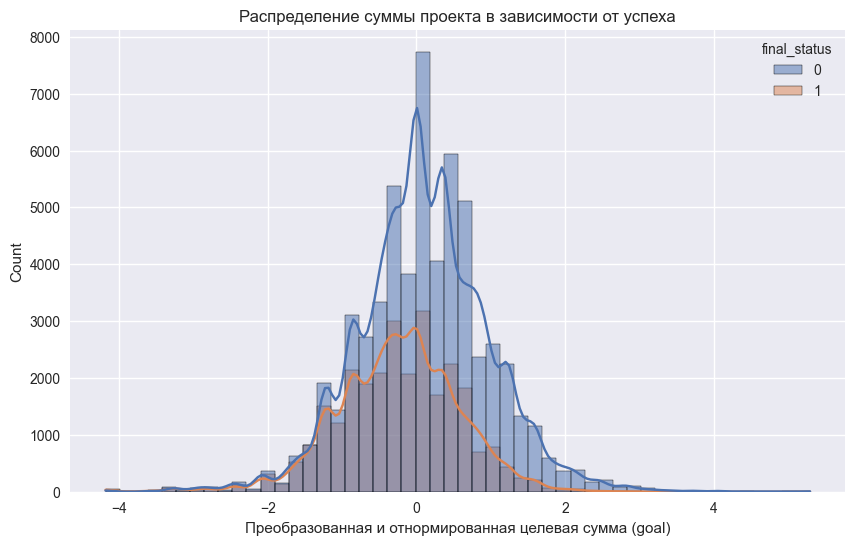

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["goal"],
    hue=y_train,
    bins=50,
    kde=True,     
    common_norm=False   
)
plt.xlabel("–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–∞—è –∏ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Ü–µ–ª–µ–≤–∞—è —Å—É–º–º–∞ (goal)")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã –ø—Ä–æ–µ–∫—Ç–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–í–∏–¥–Ω–æ —á—Ç–æ –ø—Ä–æ–µ–∫—Ç—ã —Å –±–æ–ª—å—à–µ–π —Å—É–º–º–æ–π –∏–º–µ—é—Ç –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—å—à–∏–π —É—Å–ø–µ—Ö.

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–µ–∫–µ—Ä–æ–≤

–ö–∞–∫ –≤—ã—è—Å–Ω–∏–ª–æ—Å—å –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ—á–µ–º—É-—Ç–æ –Ω–µ—Ç —ç—Ç–æ–π –∫–æ–ª–æ–Ω–∫–∏, –æ–¥–Ω–∞–∫–æ –º—ã –≤—Å—ë —Ä–∞–≤–Ω–æ –µ—ë –æ–±—Ä–∞–±–æ—Ç–∞–µ–º (–ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –æ–Ω–∞ –±—É–¥–µ—Ç –Ω–∞ –Ω–∞—à–µ–º —Ç–µ—Å—Ç–µ).

In [138]:
data_train['backers_count'].describe()

count   108119.000
mean       123.528
std       1176.799
min          0.000
25%          2.000
50%         17.000
75%         65.000
max     219382.000
Name: backers_count, dtype: float64

In [139]:
(data_train['backers_count'] == 0).value_counts(normalize=True)

backers_count
False   0.881
True    0.119
Name: proportion, dtype: float64

–°–∏—Ç—É–∞—Ü–∏—è –∑–¥–µ—Å—å –ø–æ—á—Ç–∏ —Ç–∞–∫–∞—è –∂–µ –∫–∞–∫ –∏ —É Goal. –û–¥–Ω–∞–∫–æ –≤–∞–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –µ—Å—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ (12%) –ø—Ä–æ–µ–∫—Ç–æ–≤ –±–µ–∑ –±–µ–∫–µ—Ä–æ–≤. –î–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–º–µ–Ω–∏–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é —Å—Ö–µ–º—É –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è + RobustScaler.

In [140]:
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["backers_count"] = np.log10(X_train["backers_count"] + 1)
X_test["backers_count"] = np.log10(X_test["backers_count"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["backers_count"] = scaler.fit_transform(X_train[["backers_count"]])
X_test["backers_count"] = scaler.transform(X_test[["backers_count"]])

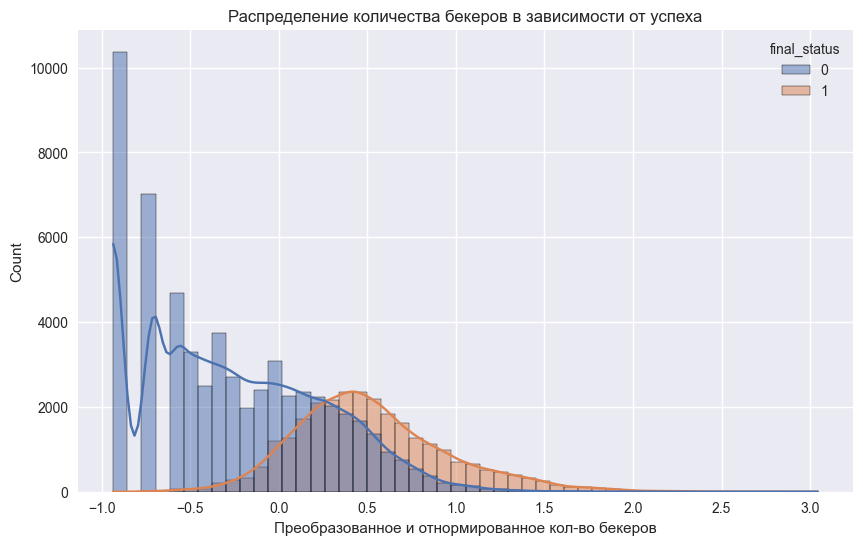

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["backers_count"],
    hue=y_train,
    bins=50,
    kde=True,     
    common_norm=False   
)
plt.xlabel("–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–µ –∏ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∫–æ–ª-–≤–æ –±–µ–∫–µ—Ä–æ–≤")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –±–µ–∫–µ—Ä–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–û–∂–∏–¥–∞–µ–º–æ —É —É—Å–ø–µ—à–Ω—ã—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤ –æ–±—ã—á–Ω–æ –±–æ–ª—å—à–µ –±–µ–∫–µ—Ä–æ–≤.

### –ö–æ–ª—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –º–µ–∂–¥—É —Å–æ–∑–¥–∞–Ω–∏–µ–º –∏ –∑–∞–ø—É—Å–∫–æ–º –ø—Ä–æ–≥—Ä–∞–º–º—ã (created_dif)

In [142]:
data_train['created_dif'].describe()

count   108119.000
mean        37.277
std         87.152
min          0.000
25%          3.000
50%         10.000
75%         32.000
max       1903.000
Name: created_dif, dtype: float64

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ

In [143]:
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["created_dif"] = np.log10(X_train["created_dif"] + 1)
X_test["created_dif"] = np.log10(X_test["created_dif"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["created_dif"] = scaler.fit_transform(X_train[["created_dif"]])
X_test["created_dif"] = scaler.transform(X_test[["created_dif"]])

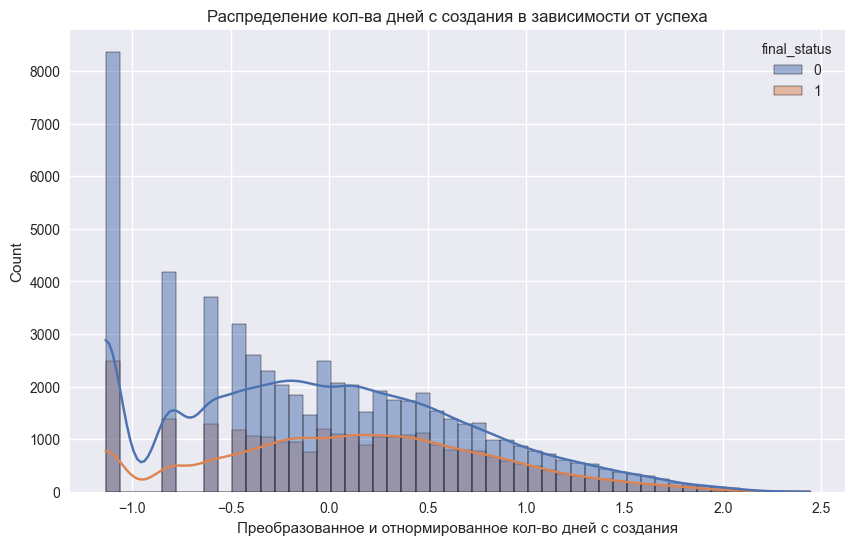

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["created_dif"],
    hue=y_train,
    bins=50,
    kde=True,     
    common_norm=False   
)
plt.xlabel("–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–µ –∏ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∫–æ–ª-–≤–æ –¥–Ω–µ–π —Å —Å–æ–∑–¥–∞–Ω–∏—è")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ –¥–Ω–µ–π —Å —Å–æ–∑–¥–∞–Ω–∏—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–í–∏–¥–∏–º–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è

### –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–µ–∫—Ç–∞ (campaign_duration)

In [145]:
data_train['campaign_duration'].describe()

count   108119.000
mean        33.917
std         12.936
min          1.000
25%         30.000
50%         30.000
75%         36.000
max         91.000
Name: campaign_duration, dtype: float64

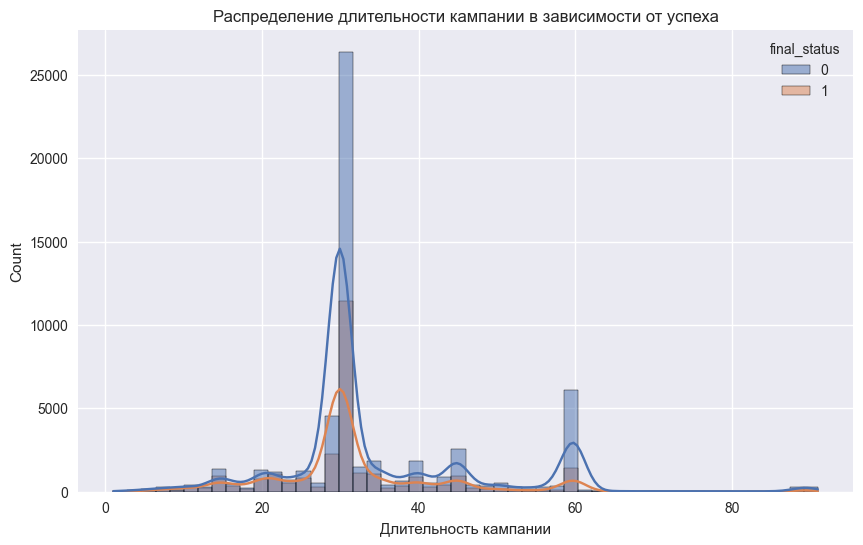

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["campaign_duration"],
    hue=y_train,
    bins=50,
    kde=True,     
    common_norm=False   
)
plt.xlabel("–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫–∞–º–ø–∞–Ω–∏–∏")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∫–∞–º–ø–∞–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–í—ã–≤–æ–¥—ã:
- –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –¥–µ–¥–ª–∞–π–Ω - –æ–∫–æ–ª–æ –º–µ—Å—è—Ü–∞
- –í—Ç–æ—Ä–æ–π –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ - –¥–≤–∞ –º–µ—Å—è—Ü–∞.
- –Ø—Ä–∫–∏—Ö —Ä–∞–∑–ª–∏—á–∏–π –ø–æ —É—Å–ø–µ—Ö—É –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–¥–µ—Å—å –Ω–µ–ª–∏–Ω–µ–π–Ω–∞—è, –ø–æ—ç—Ç–æ–º—É –∏–º–µ–µ—Ç —Å–º—ã—Å–ª —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:
- —Å–≤–µ—Ä—Ö-–∫–æ—Ä–æ—Ç–∫–∏–µ (1-14 –¥–Ω–µ–π)
- –∫–æ—Ä–æ—Ç–∫–∏–µ (15-24 –¥–Ω–µ–π)
- –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ ( 25- 35 –¥–Ω–µ–π)
- –¥–ª–∏–Ω–Ω—ã–µ (36 - 54 –¥–Ω–µ–π)
- –¥–≤—É—Ö-–º–µ—Å—è—á–Ω—ã–µ (55 - 65 –¥–Ω–µ–π)
- —Å–≤–µ—Ä—Ö–¥–ª–∏–Ω–Ω—ã–µ ( –±–æ–ª—å—à–µ 65 –¥–Ω–µ–π)

In [147]:
def categorize_duration(days):
    if days <= 14:
        return "Very_Short"
    elif 15 <= days <= 24:
        return "Short"
    elif 25 <= days <= 35:
        return "Normal"
    elif 36 <= days <= 54:
        return "Long"
    elif 55 <= days <= 65:
        return "Two_month"
    else:
        return "Very_long"

X_train["duration_category"] = X_train["campaign_duration"].apply(categorize_duration)
X_test["duration_category"] = X_test["campaign_duration"].apply(categorize_duration)

In [148]:
X_train['duration_category'].unique()

array(['Very_Short', 'Normal', 'Long', 'Two_month', 'Short', 'Very_long'],
      dtype=object)

In [149]:
X_test['duration_category'].unique()

array(['Normal', 'Two_month', 'Long', 'Very_Short', 'Short', 'Very_long'],
      dtype=object)

In [150]:
X_train = pd.get_dummies(
    X_train,
    columns=["duration_category"],
    prefix="campaign_duration",        
    prefix_sep="_"       
)
X_train.drop(['campaign_duration_Normal', 'campaign_duration'], axis=1, inplace=True)

X_test = pd.get_dummies(
    X_test,
    columns=["duration_category"],
    prefix="campaign_duration",        
    prefix_sep="_"     
)
X_test.drop(['campaign_duration_Normal', 'campaign_duration'], axis=1, inplace=True)

In [151]:
X_test.columns

Index(['name', 'desc', 'goal', 'disable_communication', 'backers_count',
       'year_trend', 'month_launched_2', 'month_launched_3',
       'month_launched_4', 'month_launched_5', 'month_launched_6',
       'month_launched_7', 'month_launched_8', 'month_launched_9',
       'month_launched_10', 'month_launched_11', 'month_launched_12',
       'day_sin', 'day_cos', 'is_weekend', 'created_dif', 'region_Europe',
       'region_Oceania', 'currency_EUR', 'currency_GBP', 'currency_Other',
       'currency_USD', 'campaign_duration_Long', 'campaign_duration_Short',
       'campaign_duration_Two_month', 'campaign_duration_Very_Short',
       'campaign_duration_Very_long'],
      dtype='object')

## –û–ø–∏—Å–∞–Ω–∏–µ –∏ –Ω–∞–∑–≤–∞–Ω–∏–µ (–ø—Ä–æ—Å—Ç—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏)

–ü—Ä–µ–∂–¥–µ —á–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Å –ø–æ–º–æ—â—å—é —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –ø–æ—Å—Ç—Ä–æ–∏–º –ø—Ä–æ—Å—Ç—ã–µ –º–æ–¥–µ–ª–∏ –±–µ–∑ –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –æ–ø–∏—Å–∞–Ω–∏—è –∏ –Ω–∞–∑–≤–∞–Ω–∏—è. –ù–æ –≤—Å—ë –∂–µ –æ—Å—Ç–∞–≤–∏–º —Å–∞–º—ã–µ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
- –¥–ª–∏–Ω—É –æ–ø–∏—Å–∞–Ω–∏—è (–≤ —Å–ª–æ–≤–∞—Ö)
- –¥–ª–∏–Ω—É –Ω–∞–∑–≤–∞–Ω–∏—è (–≤ —Å–ª–æ–≤–∞—Ö)
- –¥–æ–ª—è –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏
- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤

In [152]:
X_train['words_name'] = X_train['name'].apply(lambda x: len(x.split()))
X_train['words_desc'] = X_train['desc'].apply(lambda x: len(x.split()))
X_train['uppercase_ratio'] = X_train['desc'].apply(lambda text: sum(1 for char in text if char.isupper()) / max(len(text), 1))
X_train['exlam_and_quest'] = X_train['desc'].apply(lambda text: sum(1 for char in text if char == '!' or char == '?'))

X_test['words_name'] = X_test['name'].apply(lambda x: len(x.split()))
X_test['words_desc'] = X_test['desc'].apply(lambda x: len(x.split()))
X_test['uppercase_ratio'] = X_test['desc'].apply(lambda text: sum(1 for char in text if char.isupper()) / max(len(text), 1))
X_test['exlam_and_quest'] = X_test['desc'].apply(lambda text: sum(1 for char in text if char == '!' or char == '?'))

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

### –ö–æ–ª-–≤–æ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏

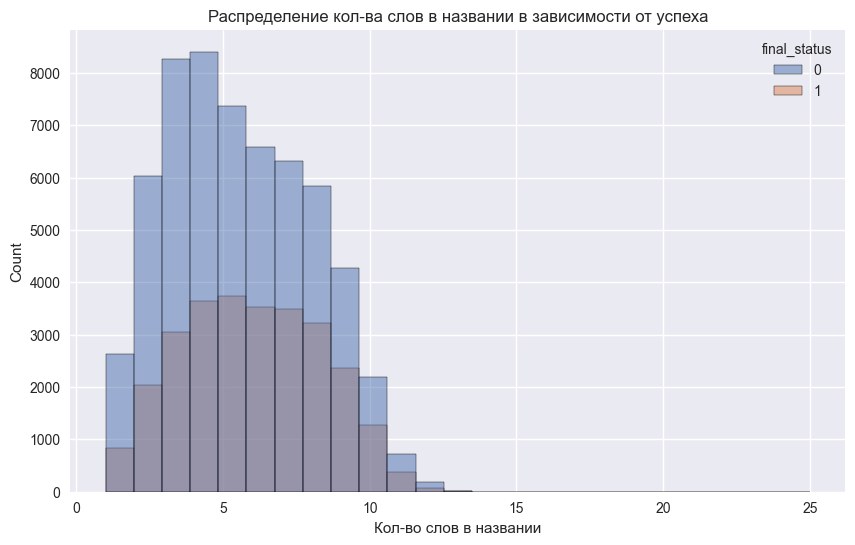

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["words_name"],
    hue=y_train,
    bins=25,     
    common_norm=False   
)
plt.xlabel("–ö–æ–ª-–≤–æ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–í —Ü–µ–ª–æ–º –±–æ–ª–µ–µ –∫–æ—Ä–æ—Ç–∫–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–∏ –∫–∞–∫ –±—É–¥—Ç–æ —á–∞—â–µ –ø—Ä–æ–≤–∞–ª–∏–≤–∞—é—Ç—Å—è. –°–¥–µ–ª–∞–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –Ω–æ—Ä–º–∏—Ä–æ–≤–∫—É.

In [154]:
scaler = StandardScaler()
X_train['words_name'] = scaler.fit_transform(X_train[['words_name']])
X_test['words_name'] = scaler.transform(X_test[['words_name']])

### –ö–æ–ª-–≤–æ —Å–ª–æ–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏

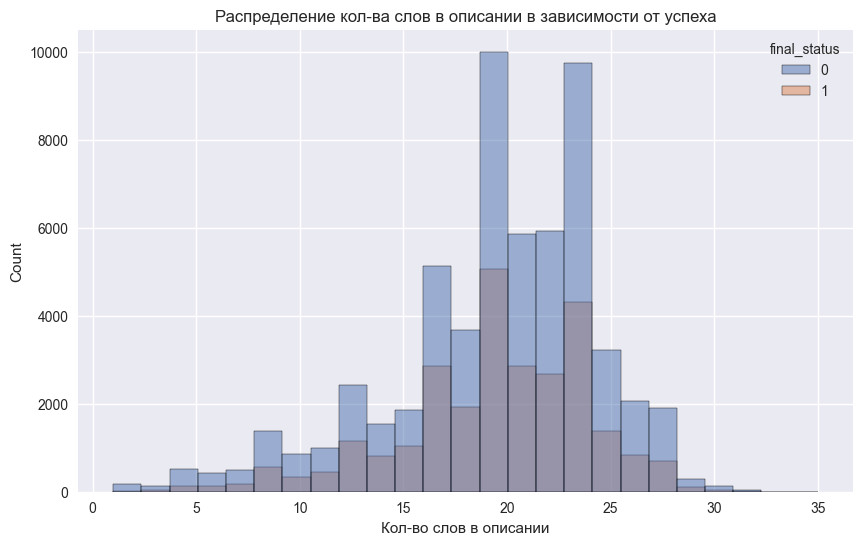

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["words_desc"],
    hue=y_train,
    bins=25,     
    common_norm=False   
)
plt.xlabel("–ö–æ–ª-–≤–æ —Å–ª–æ–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ —Å–ª–æ–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–Ø–≤–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –Ω–µ –≤–∏–¥–Ω–æ. –û–ø—è—Ç—å –∂–µ –¥–µ–ª–∞–µ–º –Ω–æ—Ä–º–∏—Ä–æ–≤–∫—É –¥–ª—è –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–∏—è.

In [156]:
scaler = StandardScaler()
X_train['words_desc'] = scaler.fit_transform(X_train[['words_desc']])
X_test['words_desc'] = scaler.transform(X_test[['words_desc']])

### –î–æ–ª—è –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏

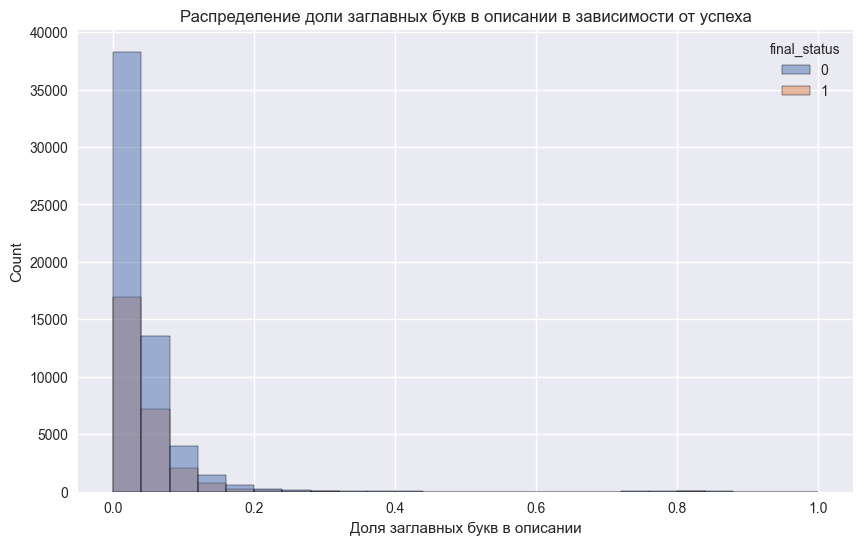

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["uppercase_ratio"],
    hue=y_train,
    bins=25,     
    common_norm=False   
)
plt.xlabel("–î–æ–ª—è –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

–ó–¥–µ—Å—å –≤–∏–¥–Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–∏–º–∏—á–µ—Å–∫–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, —Ç–∞–∫ —á—Ç–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º –∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º.

In [158]:
X_train['uppercase_ratio'] = np.log(X_train[['uppercase_ratio']] + 0.01)
X_test['uppercase_ratio'] = np.log(X_test[['uppercase_ratio']] + 0.01)

scaler = StandardScaler()
X_train['uppercase_ratio'] = scaler.fit_transform(X_train[['uppercase_ratio']])
X_test['uppercase_ratio'] = scaler.transform(X_test[['uppercase_ratio']])

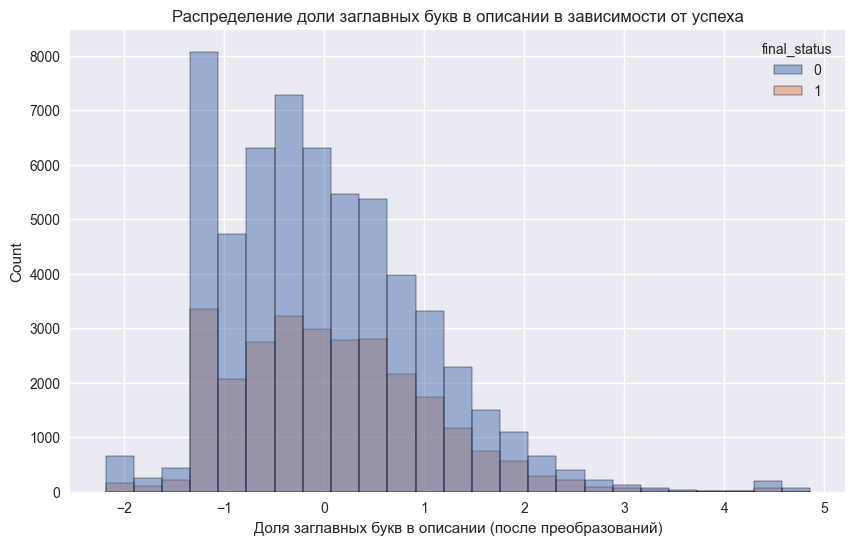

In [159]:
plt.figure(figsize=(10, 6))
sns.histplot(
    x=X_train["uppercase_ratio"],
    hue=y_train,
    bins=25,     
    common_norm=False   
)
plt.xlabel("–î–æ–ª—è –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ (–ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π)")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

### –ö–æ–ª-–≤–æ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤

In [160]:
X_train["exlam_and_quest"].describe()

count   86495.000
mean        0.369
std         0.747
min         0.000
25%         0.000
50%         0.000
75%         1.000
max        17.000
Name: exlam_and_quest, dtype: float64

–ü–æ—Å–º–æ—Ç—Ä–µ–≤ –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ç–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è - –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ –æ–ø–∏—Å–∞–Ω–∏–π ! –∏ ? –Ω–µ—Ç –≤–æ–≤—Å–µ –∏–ª–∏ –æ–Ω –≤—Å–µ–≥–æ 1. –¢–æ–≥–¥–∞ –ø–µ—Ä–µ–¥–µ–ª–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫:
- 0 –µ—Å–ª–∏ –Ω–µ—Ç –∑–Ω–∞–∫–æ–≤
- 1 - –µ—Å–ª–∏ 1-3 –∑–Ω–∞–∫–∞
- 2 - –µ—Å–ª–∏ 4-9 –∑–Ω–∞–∫–∞
- 3 - –µ—Å–ª–∏ –±–æ–ª—å—à–µ 9

In [161]:
def exlam_and_quest_classifier(counter):
    if counter == 0:
        return 0
    elif counter < 4:
        return 1
    elif counter < 9:
        return 2
    else:
        return 3

X_train["exlam_and_quest"] = X_train["exlam_and_quest"].apply(exlam_and_quest_classifier)

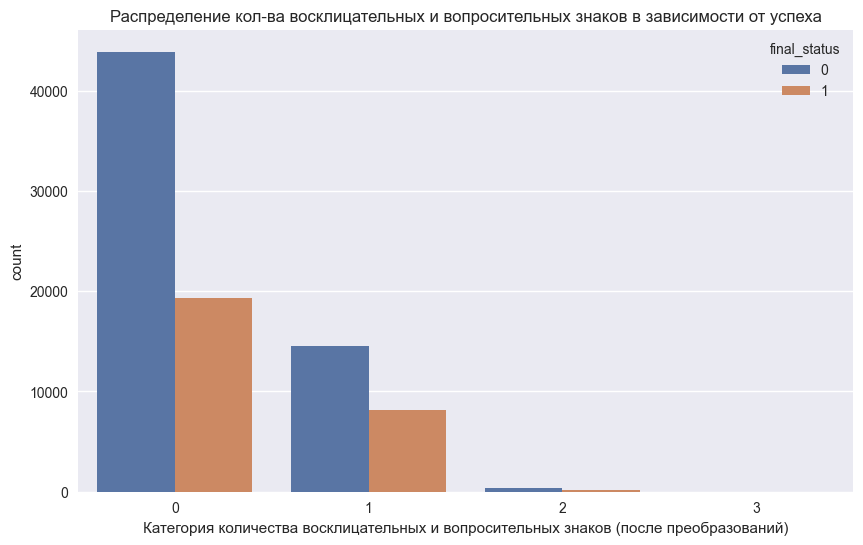

In [162]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x=X_train["exlam_and_quest"],
    hue=y_train  
)
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ (–ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π)")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Å–ø–µ—Ö–∞")
plt.show()

# –í—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫

–£—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ —É –Ω–∞—Å –¥–∏–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–æ–≤–∞–ª–∏–≤—à–∏—Ö—Å—è –≥–¥–µ-—Ç–æ –≤ –¥–≤–∞ –±–æ–ª—å—à–µ) –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤–Ω–æ–π –º–µ—Ç—Ä–∏–∫–∏ –≤–æ–∑—å–º—ë–º f1-score - –æ–Ω–∞ –Ω–µ–ø–ª–æ—Ö–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —É–º–µ—Ä–µ–Ω–Ω–æ–≥–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –≤ –∫–ª–∞—Å—Å–∞—Ö.

–°–∏—Å—Ç–µ–º–∞ Kaggle —Ç–µ—Å—Ç–∏—Ä—É–µ—Ç –ø–æ ROC-AUC, –Ω–æ —É—á–∏—Ç—ã–≤–∞—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –≤–æ–∑—å–º—ë–º –ª—É—á—à–µ PR AUC - –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ–∏—Å–∫–∞ —É—Å–ø–µ—Ö–æ–≤.

## –ö–æ–¥ –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –æ–¥–∏–Ω–æ—á–Ω–æ–π PR AUC

In [23]:
def plot_precision_recall_curve(y_true, y_proba, title="Precision-Recall Curve"):
    """
    –°—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ–∏–∫ Precision-Recall —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–π
    :param y_true: –ò—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (0/1)
    :param y_proba: –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–∞ 1
    :param title: –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
    """
    # 1. –í—ã—á–∏—Å–ª—è–µ–º precision, recall –∏ –ø–æ—Ä–æ–≥–∏
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # 2. –°—á–∏—Ç–∞–µ–º PR AUC
    pr_auc = average_precision_score(y_true, y_proba)
    
    # 3. –°—á–∏—Ç–∞–µ–º baseline (–¥–æ–ª—è —É—Å–ø–µ—Ö–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö)
    baseline = y_true.mean()
    
    # 4. –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ (–º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π F1)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # +1e-10 –∏–∑–±–µ–≥–∞–µ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 0
    max_f1_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[max_f1_idx] if max_f1_idx < len(thresholds) else 1.0
    
    # 5. –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
    plt.figure(figsize=(10, 7))
    
    # –û—Å–Ω–æ–≤–Ω–∞—è –∫—Ä–∏–≤–∞—è
    plt.plot(recall, precision, color='blue', lw=2, 
             label=f'–ú–æ–¥–µ–ª—å (PR AUC = {pr_auc:.3f})')
    
    # Baseline (—É—Ä–æ–≤–µ–Ω—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ —É–≥–∞–¥—ã–≤–∞–Ω–∏—è)
    plt.axhline(y=baseline, color='red', linestyle='--', 
                label=f'Baseline (–¥–æ–ª—è —É—Å–ø–µ—Ö–æ–≤ = {baseline:.3f})')
    
    # –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥
    plt.scatter(recall[max_f1_idx], precision[max_f1_idx], 
                marker='o', color='green', s=150, 
                label=f'–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ = {optimal_threshold:.3f}\n(F1 = {f1_scores[max_f1_idx]:.3f})')
    
    # –î–µ–∫–æ—Ä–∞—Ü–∏–∏
    plt.xlabel('Recall (–¥–æ–ª—è –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö —É—Å–ø–µ—Ö–æ–≤)', fontsize=12)
    plt.ylabel('Precision (—Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π)', fontsize=12)
    plt.title(f'{title} (–¥–∏—Å–±–∞–ª–∞–Ω—Å: {baseline:.0%} —É—Å–ø–µ—Ö–æ–≤)', fontsize=14)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    
    plt.show()
    
    return optimal_threshold, pr_auc

## –ö–æ–¥ –¥–ª—è –≤—ã–≤–æ–¥–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö PR AUC

In [24]:
def plot_precision_recall_curve_multiple(results, y_true, title="Precision-Recall Curve"):
    
    plt.figure(figsize=(10, 7))

    # –°—á–∏—Ç–∞–µ–º baseline (–¥–æ–ª—è —É—Å–ø–µ—Ö–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö)
    baseline = y_true.mean()
    plt.axhline(y=baseline, color='red', linestyle='--', 
                    label=f'Baseline (–¥–æ–ª—è —É—Å–ø–µ—Ö–æ–≤ = {baseline:.3f})')

    for name, result in results.items():
        precision, recall, thresholds = precision_recall_curve(y_true, result['probabilities'])
        pr_auc = average_precision_score(y_true, result['probabilities'])

        # –û—Å–Ω–æ–≤–Ω–∞—è –∫—Ä–∏–≤–∞—è
        plt.plot(recall, precision, lw=2, 
                label=f"{name} (PR AUC = {pr_auc:.3f})")
    
    
    # –î–µ–∫–æ—Ä–∞—Ü–∏–∏
    plt.xlabel('Recall (–¥–æ–ª—è –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö —É—Å–ø–µ—Ö–æ–≤)', fontsize=12)
    plt.ylabel('Precision (—Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π)', fontsize=12)
    plt.title(f'{title} (–¥–∏—Å–±–∞–ª–∞–Ω—Å: {baseline:.0%} —É—Å–ø–µ—Ö–æ–≤)', fontsize=14)
    plt.legend(loc="lower left", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    
    plt.show()

## –ö–æ–¥ –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ –∏ –≤—ã–≤–æ–¥–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

In [25]:
def process_result(model, X_train, X_test, y_train = y_train, y_test = y_test, do_cross_val= True):
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    result =  {
            'model': model,
            'f1_test': f1_score(y_test, y_pred),
            'PR_AUC_test': average_precision_score(y_test, y_pred_proba),
            'accuracy': accuracy_score(y_test, y_pred),
            'predictions': y_pred,
            'probabilities': y_pred_proba
            }

    # –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    if do_cross_val:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

        result['f1_cv_mean'] = cv_scores.mean()
        result['f1_cv_std'] = cv_scores.std()
        result['cv_scores'] = cv_scores

    return result


def print_results(results):
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π f1-score: {results['f1_test']:.3f}")
    print()
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: {results['PR_AUC_test']:.3f}")
    print()
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π accuracy: {results['accuracy']:.3f}")
    print()
    print(f"–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {results['f1_cv_mean']:.3f}")
    print()
    print(f"–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {results['f1_cv_std']:.3f}")
    print()

# –ú–æ–¥–µ–ª–∏ –±–µ–∑ –ø—Ä—è–º–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞

–í—ã–¥–µ–ª–∏–º –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã, –∫—Ä–æ–º–µ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö

In [279]:
X_train_no_text = X_train.drop(['name', 'desc'], axis=1)
X_test_no_text = X_test.drop(['name', 'desc'], axis=1)

–î–∞–ª–µ–µ –æ–±—É—á–∏–º —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è - –±—É–¥–µ–º –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –æ—Ç –ø—Ä–æ—Å—Ç—ã—Ö –∫ —Å–ª–æ–∂–Ω—ã–º:
- –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
- —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å

## –ü—Ä–æ—Å—Ç—ã–µ baseline –º–æ–¥–µ–ª–∏

### –í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏

–í —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –ø—Ä–æ–≥–æ–Ω–∏–º –≤—Å–µ –ø—Ä–æ—Å—Ç—ã–µ baseline –º–æ–¥–µ–ª–∏ –∏ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –≤—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –∏ –ø–æ–æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –ù–µ —Å—Ç–∞–ª —Å—á–∏—Ç–∞—Ç—å SVM, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è.

In [95]:
models = {
    '–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'description': '–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å —Å —Å–∏–≥–º–æ–∏–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π'
    },
    '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π': {
        'model': DecisionTreeClassifier(random_state=42, max_depth=10),
        'description': '–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π —Å –ø—Ä–∞–≤–∏–ª–∞–º–∏'
    },
    '–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42),
        'description': '–ê–Ω—Å–∞–º–±–ª—å –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π'
    },
    '–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å': {
        'model': GaussianNB(),
        'description': '–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–∞—è –º–æ–¥–µ–ª—å —Å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ–º –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏'
    },
    'k-NN': {
        'model': KNeighborsClassifier(n_neighbors=5),
        'description': '–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ –±–ª–∏–∂–∞–π—à–∏–º —Å–æ—Å–µ–¥—è–º'
    }
}

In [96]:
results = {}
trained_models = {}

for name, info in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model = info['model']
    model.fit(X_train_no_text, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_no_text, X_test_no_text)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 2.3 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.811

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.884

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.876

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.810

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.002

***************************************
–û–±—É—á–µ–Ω–∏–µ: –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 1.9 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.801

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.840

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.867

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.795

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.003

***************************************
–û–±—É—á–µ–Ω–∏–µ: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 45

In [98]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    '–û–ø–∏—Å–∞–Ω–∏–µ': [models[name]['description'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
                 –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy                                              –û–ø–∏—Å–∞–Ω–∏–µ
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è          0.811        0.884        0.810     0.876                 –õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å —Å —Å–∏–≥–º–æ–∏–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π
          –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å          0.803        0.863        0.803     0.870                             –ê–Ω—Å–∞–º–±–ª—å –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π
        –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π          0.801        0.840        0.795     0.867                 –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π —Å –ø—Ä–∞–≤–∏–ª–∞–º–∏
                   k-NN          0.617        0.630        0.621     0.769                    –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ –±–ª–∏–∂–∞–π—à–∏–º —Å–æ—Å–µ–¥—è–º
          –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å          0.502        0.655        0.502     0.379 –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–∞—è –º–æ

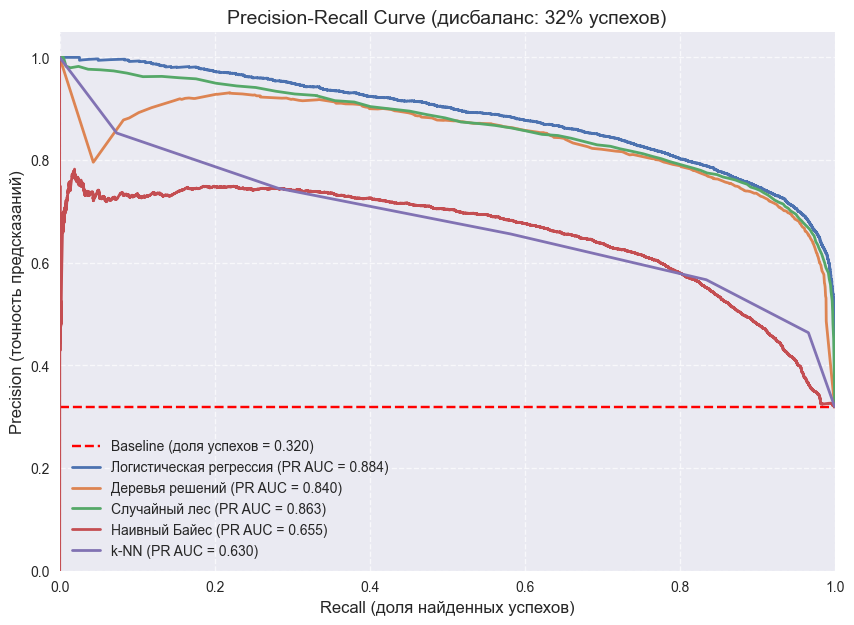

In [ ]:
plot_precision_recall_curve_multiple(results, y_test)

–î–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ (–ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è)

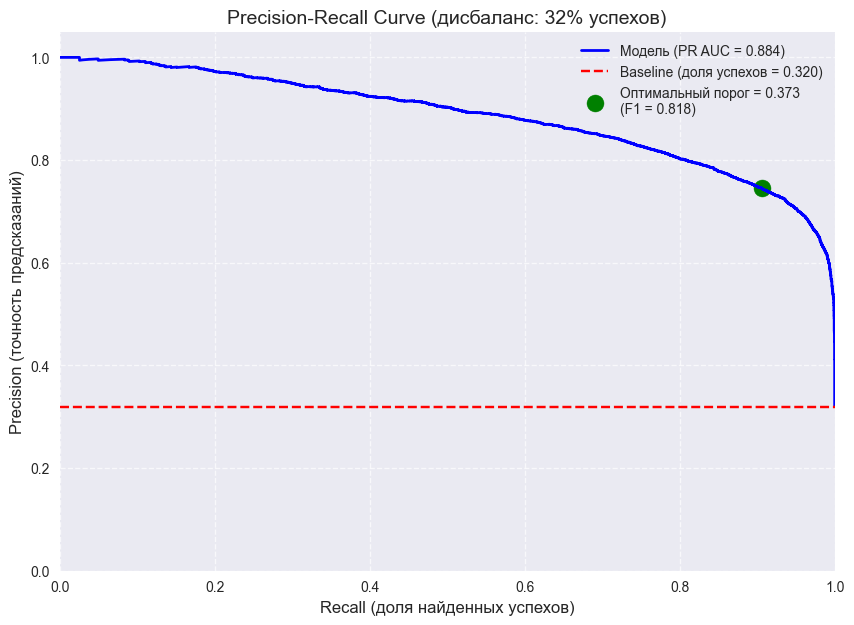

(0.3728501170724735, 0.8840396019134587)

In [ ]:
plot_precision_recall_curve(y_test, results['–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è']['probabilities'])

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —à–∏—Ä–æ–∫–æ–π —Å–µ—Ç–∫–æ–π (GridSearch) –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ (–ª–æ–≥—Ä–µ–≥—Ä–µ—Å—Å–∏—è)

–°–æ–∑–¥–∞—ë–º —Å–µ—Ç–∫—É –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è

In [ ]:
# 1. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # –°–∏–ª–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "class_weight": [
        None,
        "balanced",
        {0: 0.67, 1: 0.33},  # –¢–æ—á–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å
        {0: 0.5, 1: 0.5},    # –í—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏–µ
        {0: 0.4, 1: 0.6}     # –£—Å–∏–ª–µ–Ω–∏–µ —É—Å–ø–µ—Ö–æ–≤
    ],
    "solver": ["liblinear", "saga"]
}

# 2. –§–∏–ª—å—Ç—Ä—É–µ–º –Ω–µ—Å–æ–≤–º–µ—Å—Ç–∏–º—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏
filtered_params = []
for C in param_grid["C"]:
    for penalty in param_grid["penalty"]:
        for class_weight in param_grid["class_weight"]:
            for solver in param_grid["solver"]:
                # –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏
                if solver == "liblinear" and penalty not in ["l1", "l2"]:
                    continue
                if solver == "lbfgs" and penalty not in ["l2", "none"]:
                    continue
                if penalty == "elasticnet" and solver != "saga":
                    continue
                
                filtered_params.append({
                    "C": [C],
                    "penalty": [penalty],
                    "class_weight": [class_weight],
                    "solver": [solver],
                    "max_iter": [1000]
                })

# 3. GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=filtered_params,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # –ü–æ—Å—Ç–∞–≤–∏–ª –Ω–µ–º–Ω–æ–≥–æ –¥—Ä—É–≥—É—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é, —á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω—è–ª—Å—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤
    n_jobs=-1,
    verbose=2,
    refit=True
)

–ó–∞–ø—É—Å–∫–∞–µ–º –ø–æ–¥–±–æ—Ä

In [ ]:
grid_search.fit(X_train_no_text, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

–ü–µ—Ä–µ–±–æ—Ä –¥–µ–ª–∞–ª—Å—è –æ—Ç–¥–µ–ª—å–Ω–æ –≤ kaggle - –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –Ω–∏–∂–µ.

In [99]:
best_estimator = LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6}, max_iter=1000,
                   penalty='l1', random_state=42, solver='saga')
best_estimator.fit(X_train_no_text, y_train)
best_estimator

LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6}, max_iter=1000,
                   penalty='l1', random_state=42, solver='saga')

In [100]:
results = process_result(best_estimator, X_train_no_text, X_test_no_text)
print_results(results)

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.818

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.884

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.873

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.818

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.003



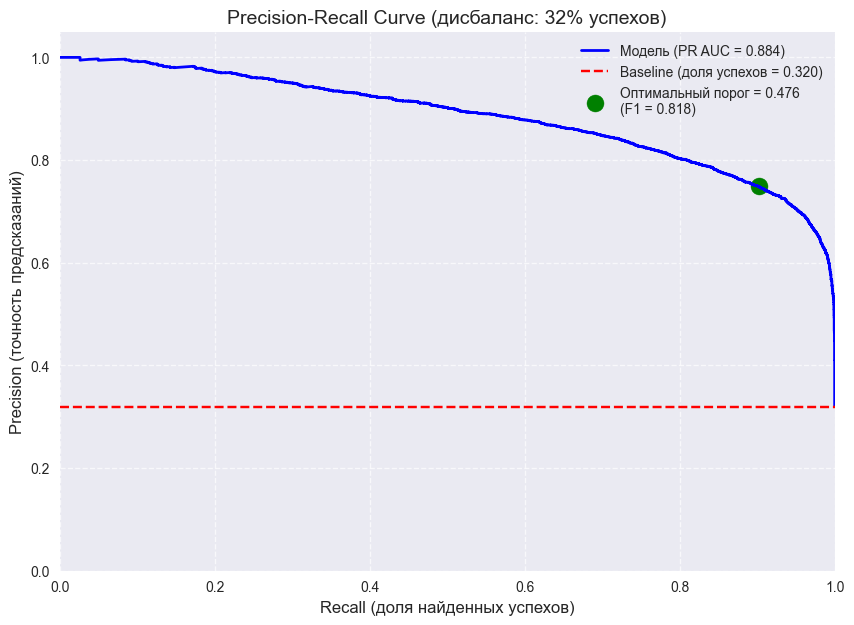

(0.47637097823853847, 0.8840180337364503)

In [101]:
plot_precision_recall_curve(y_test, results['probabilities'])

–ö–∞–∫ –≤–∏–¥–Ω–æ —Å–∏–ª—å–Ω–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–µ—Ç - –º—ã –ø—Ä–æ—Å—Ç–æ –¥–æ–±–∏–ª–∏—Å—å —Ç–∞–∫–æ–≥–æ –∂–µ f1-score –∫–∞–∫ –∏ –ø—Ä–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–º –ø–æ—Ä–æ–≥–µ –≤ –ø—Ä–æ—à–ª—ã–π —Ä–∞–∑. –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –Ω–µ –±—É–¥–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å –ø–æ–º–æ—â—å—é Optuna.

### –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫

In [108]:
y_test.sum()

6912

Text(0.5, 31.222222222222214, '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')

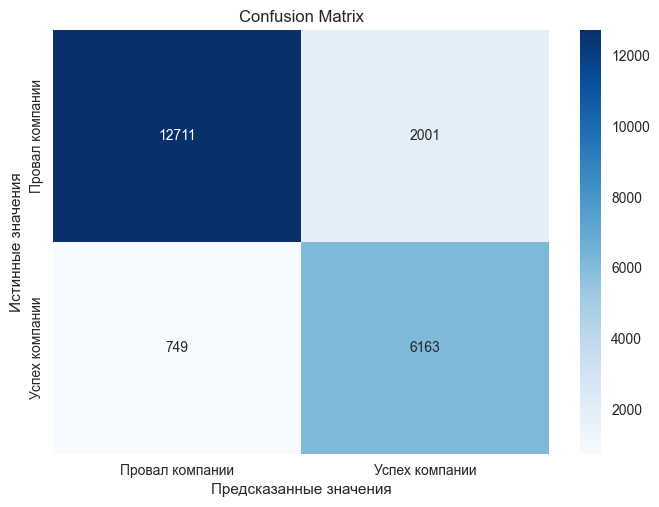

In [106]:
cm = confusion_matrix(y_test, results['predictions'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['–ü—Ä–æ–≤–∞–ª –∫–æ–º–ø–∞–Ω–∏–∏', '–£—Å–ø–µ—Ö –∫–æ–º–ø–∞–Ω–∏–∏'],
            yticklabels=['–ü—Ä–æ–≤–∞–ª –∫–æ–º–ø–∞–Ω–∏–∏', '–£—Å–ø–µ—Ö –∫–æ–º–ø–∞–Ω–∏–∏'])
plt.title(f'Confusion Matrix')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')

In [113]:
print(f"–¢–µ—Å—Ç–æ–≤—ã–π Precision: {precision_score(y_test, results['predictions']):.3f}")
print(f"–¢–µ—Å—Ç–æ–≤—ã–π Recall: {recall_score(y_test, results['predictions']):.3f}")

–¢–µ—Å—Ç–æ–≤—ã–π Precision: 0.755
–¢–µ—Å—Ç–æ–≤—ã–π Recall: 0.892


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –Ω–∞—Ö–æ–¥–∏–º –ø–æ—á—Ç–∏ 90% —É—Å–ø–µ—Ö–æ –∏ –≥–¥–µ 75% –Ω–∞—à–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ–± —É—Å–ø–µ—Ö–µ –ø—Ä–∞–≤–¥–∏–≤—ã.

### –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

In [86]:
coefficients = best_estimator.coef_[0]
intercept = best_estimator.intercept_[0]
feature_names = X_train_no_text.columns.tolist()

–¢–∞–±–ª–∏—Ü–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [94]:
# –°–æ–∑–¥–∞–µ–º DataFrame —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏
feature_importance = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients,
    "abs_coefficient": np.abs(coefficients)
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é (–≥–ª–∞–≤–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –≤–∞–∂–Ω–æ—Å—Ç–∏)
feature_importance = feature_importance.sort_values("abs_coefficient", ascending=False)

# –î–æ–±–∞–≤–ª—è–µ–º –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è
feature_importance["effect"] = np.where(
    feature_importance["coefficient"] > 0, 
    "–£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö", 
    "–£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö"
)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–æ–ø-20
print(feature_importance[["feature", "coefficient", "effect"]].head(15))

                         feature  coefficient                      effect
2                  backers_count         7.58  –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
1          disable_communication        -7.34    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
0                           goal        -3.14    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
20                region_Oceania        -2.85    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
23                currency_Other         2.78  –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
22                  currency_GBP        -0.91    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
9               month_launched_7        -0.28    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
26       campaign_duration_Short         0.28  –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
21                  currency_EUR        -0.25    –£–º–µ–Ω—å—à–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö
28  campaign_duration_Very_Short         0.22  –£–≤–µ–ª–∏—á–∏–≤–∞

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

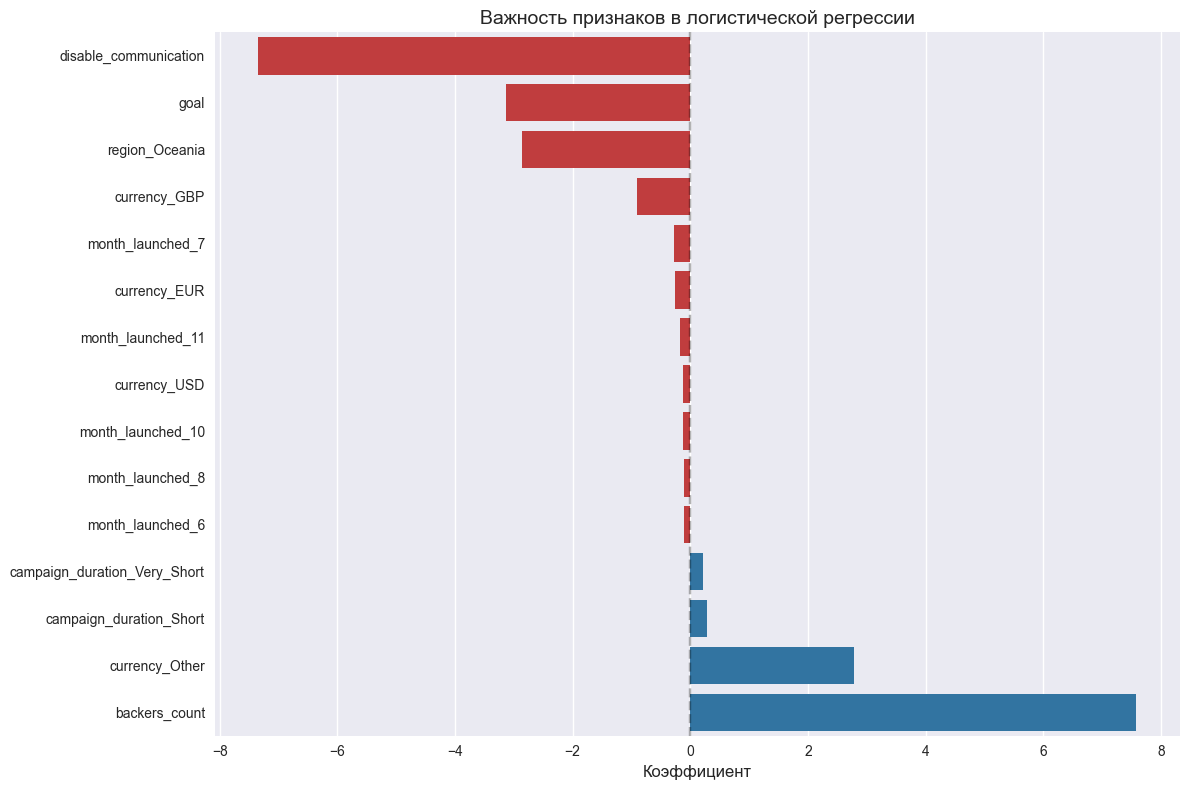

In [ ]:
top_features = feature_importance.head(15)

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏
top_features = top_features.sort_values("coefficient")

plt.figure(figsize=(12, 8))
colors = ["#d62728" if coef < 0 else "#1f77b4" for coef in top_features["coefficient"]]
sns.barplot(
    x="coefficient", 
    y="feature", 
    data=top_features,
    palette=colors
)

plt.title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏", fontsize=14)
plt.xlabel("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç", fontsize=12)
plt.ylabel("")
plt.axvline(x=0, color="k", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**–í—ã–≤–æ–¥—ã:**
- –æ–∂–∏–¥–∞–µ–º–æ, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–µ–∫–µ—Ä–æ–≤ —Å–∏–ª—å–Ω—ã–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å —É—Å–ø–µ—à–Ω–æ—Å—Ç–∏ –ø—Ä–æ–µ–∫—Ç–∞, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –¥–æ–±–∞–≤–ª—è–µ—Ç –µ–º—É –≤–µ—Å–∞ –∏ –ª–µ–≥–∏—Ç–∏–º–Ω–æ—Å—Ç–∏ –≤ –≥–ª–∞–∑–∞—Ö –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π

- –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ - —Å–∏–ª—å–Ω—ã–π –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π —Å–∏–≥–Ω–∞–ª. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∫–∞–∫ —Ñ–ª–∞–≥, —á—Ç–æ —Ç–µ–º–∞ –ø—Ä–æ–µ–∫—Ç–∞ —Å–æ–º–Ω–∏—Ç–µ–ª—å–Ω–∞—è –∏–ª–∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω–∞—è –∏ –∞–≤—Ç–æ—Ä—ã –∑–Ω–∞—è —ç—Ç–æ –æ—Ç–∫–ª—é—á–∞—é—Ç –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏. 

- —á–µ–º –≤—ã—à–µ —Ü–µ–ª–µ–≤–∞—è —Å—É–º–º–∞ —Å–±–æ—Ä–æ–≤, —Ç–µ–º —Å–ª–æ–∂–Ω–µ–µ –µ—ë –¥–æ—Å—Ç–∏–≥–Ω—É—Ç—å, —Ç–∞–∫ —á—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ —Å–∏–ª—å–Ω—ã–π –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç

- –ª—é–±–æ–ø—ã—Ç–Ω–æ, —á—Ç–æ –ø—Ä–æ–µ–∫—Ç—ã –Ω–µ –∏–∑ –ï–≤—Ä–æ–ø—ã –∏ –°–®–ê —á–∞—â–µ –ø—Ä–æ–≤–∞–ª–∏–≤–∞—é—Ç—Å—è, –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ—Ç–æ–º—É —á—Ç–æ —Ç–∞–º –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –Ω–µ —Ç–∞–∫ –∏–∑–≤–µ—Å—Ç–Ω–∞ –∏ –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ –ø–æ–∫—Ä—ã—Ç–∏—è.
- —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—ã–º –∏–º–µ–Ω–Ω–æ –≤ –ê–Ω–≥–ª–∏–∏ –ø—Ä–æ–µ–∫—Ç–∞–º –≤–∏–¥–∏–º–æ —Å–ª–æ–∂–Ω–µ–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å—Å—è (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç —É —Ñ—É–Ω—Ç–æ–≤ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–∞–ª—é—Ç—ã)
- —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–∞—è (–Ω–µ –µ–≤—Ä–æ, –¥–æ–ª–ª–∞—Ä, –∫–∞–Ω–∞–¥—Å–∫–∏–π –¥–æ–ª–∞—Ä –∏–ª–∏ —Ñ—É–Ω—Ç—ã) –≤–∞–ª—é—Ç–∞ –¥–∞—é—Ç –ø–ª—é—Å –∫ —É—Å–ø–µ—Ö—É –∫–æ–º–ø–∞–Ω–∏–∏. –í–æ–∑–º–æ–∂–Ω–æ, –≤—ã–±–∏—Ä–∞—è —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—É—é –≤–∞–ª—é—Ç—É –∞–≤—Ç–æ—Ä—ã —Å—É–∂–∞—é—Ç —Ü–µ–ª–µ–≤—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é –∏ —Ç–µ–º —Å–∞–º—ã–º —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö (—Ç–∞–∫ –∫–∞–∫ –ø—Ä–æ–µ–∫—Ç –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ–º—É –ø—Ä–æ—Ü–µ–Ω—Ç—É –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã—Ö –ª—é–¥–µ–π)
- –Ω–µ–±–æ–ª—å—à–æ–π —ç—Ñ—Ñ–µ–∫—Ç, –Ω–æ –∫–æ—Ä–æ—Ç–∫–∏–µ –∏ —Å–≤–µ—Ä—Ö–∫–æ—Ä–æ—Ç–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –±–æ–ª–µ–µ —á–∞—Å—Ç–æ –ø—Ä–∏—É—Å–ø–µ–≤–∞—é—Ç - —ç—Ç–æ –ª–æ–≥–∏—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ —Å—É–º–º—ã —É –Ω–∏—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ —Ç–æ–∂–µ –æ—á–µ–Ω—å –Ω–µ–±–æ–ª—å—à–∏–µ.

**–ü–æ –¥–∞—Ç–µ –∑–∞–ø—É—Å–∫–∞:**

–°—É–¥—è –ø–æ –≤—Å–µ–º—É –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –¥–µ–Ω—å –∑–∞–ø—É—Å–∫–∞ –Ω–µ –∏–º–µ–µ—Ç —Ä–µ—à–∞—é—â–µ–π —Ä–æ–ª–∏, –æ–¥–Ω–∞–∫–æ –µ—Å–ª–∏ –≤—Å—ë –∂–µ –æ—Ç—Ç–∞–ª–∫–∏–≤–∞—Ç—å—Å—è –æ—Ç –≤–µ—Å–æ–≤, —Ç–æ –ª—É—á—à–µ –ù–ï –∑–∞–ø—É—Å–∫–∞—Ç—å –∫–∞–º–ø–∞–Ω–∏—é –ª–µ—Ç–æ–º –∏ –æ—Å–µ–Ω—å—é.

## –ë—É—Å—Ç–∏–Ω–≥–∏

### Baseline

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –±—É—Å—Ç–∏–Ω–≥–∏

In [118]:
# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
models = {
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        verbosity=0
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbosity=-1,
        force_col_wise=True
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        verbose=False
    )
}

In [119]:
results = {}
trained_models = {}

for name, model in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model.fit(X_train_no_text, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_no_text, X_test_no_text)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: XGBoost
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 1.5 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.807

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.882

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.872

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.807

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.002

***************************************
–û–±—É—á–µ–Ω–∏–µ: LightGBM
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 1.6 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.815

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.891

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.877

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.814

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.003

***************************************
–û–±—É—á–µ–Ω–∏–µ: CatBoost
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 62.9 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.815

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.887


In [99]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
  –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy
LightGBM          0.815        0.891        0.814     0.877
CatBoost          0.815        0.887        0.812     0.877
 XGBoost          0.807        0.882        0.807     0.872

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: LightGBM (0.815)


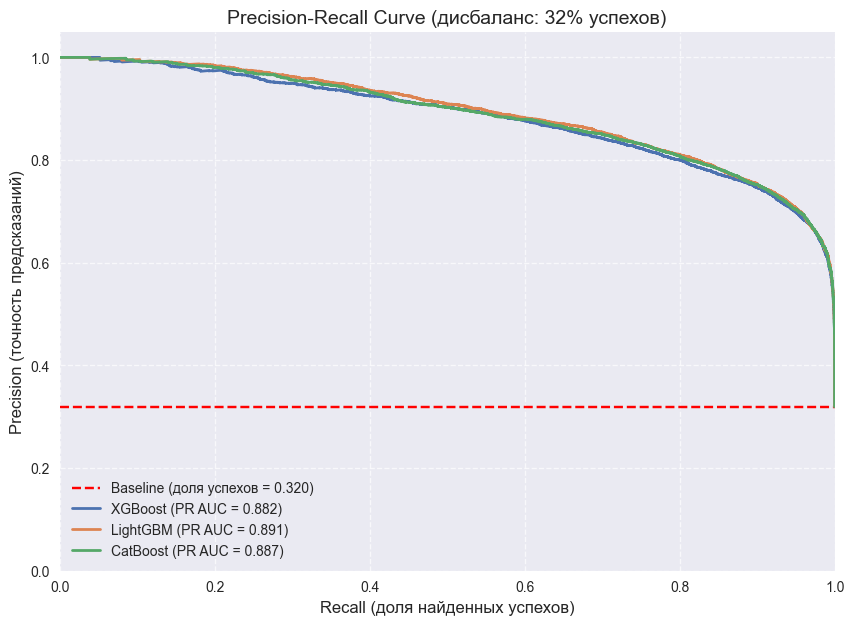

In [100]:
plot_precision_recall_curve_multiple(results, y_test)

–î–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ (LightGBM)

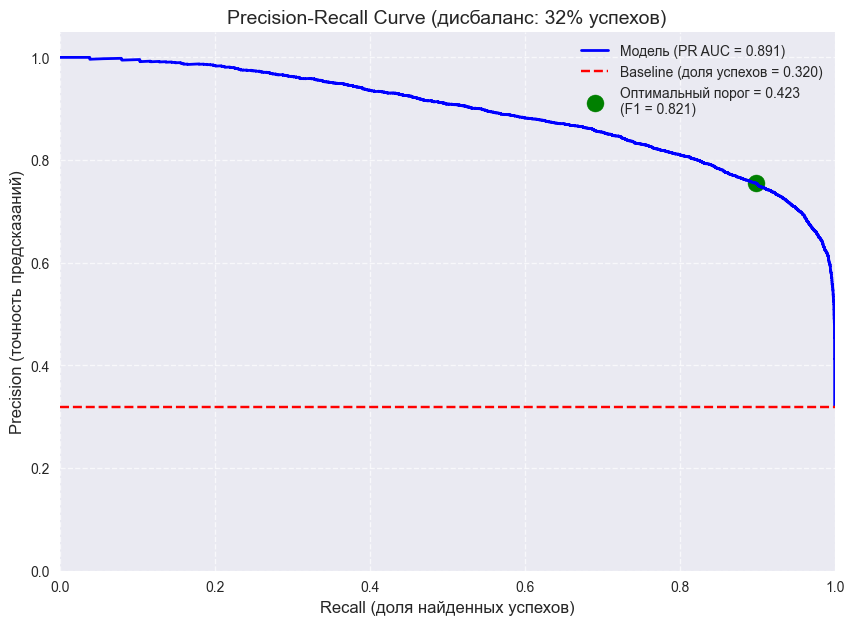

(0.42278736336267086, 0.890757698954909)

In [102]:
plot_precision_recall_curve(y_test, results['LightGBM']['probabilities'])

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –Ω–µ–±–æ–ª—å—à–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –º—ã –¥–æ—Å—Ç–∏–≥–ª–∏ (–ø—Ä–∏ –≤—ã–±–æ—Ä–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞). –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å LightGBM (–∫–∞–∫ —Å–∞–º—ã–π –±—ã—Å—Ç—Ä—ã–π –∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç).

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è (—Å –ø–æ–º–æ—â—å—é Optuna –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏)

–û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –±—É–¥–µ–º –≤ Kaggle

In [ ]:
def optimize_lightgbm(trial, X_train, y_train):
    """–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ LightGBM"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        "is_unbalance": True, # –î–ª—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
        'random_state': 42,
        'verbosity': -1,
        'force_col_wise': True
    }
    
    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    return scores.mean()

In [ ]:
N_TRIALS = 5000
TIMEOUT = 7500

start_time = time.time()
    
# –°–æ–∑–¥–∞–µ–º study
study = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=42)
)

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é
study.optimize(
    lambda trial: optimize_lightgbm(trial, X_train_no_text, y_train),
    n_trials=N_TRIALS,
    timeout=TIMEOUT,
    show_progress_bar=True
)

optimization_time = time.time() - start_time

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
best_params = study.best_params
best_cv_score = study.best_value
print('-' * 100)

print(f"–ó–∞–≤–µ—Ä—à–µ–Ω–æ –∑–∞ {optimization_time:.1f} —Å–µ–∫—É–Ω–¥")
print(f"–õ—É—á—à–∏–π CV f1-score: {best_cv_score:.4f}")
print(f"–ü—Ä–æ–≤–µ–¥–µ–Ω–æ {len(study.trials)} –ø–æ–ø—ã—Ç–æ–∫")
print(f"–¢–æ–ø-3 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏:")

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª—é—á–µ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
key_params = ['learning_rate', 'max_depth', 'n_estimators', 'iterations', 'max_iter']
shown_params = 0
for param in key_params:
    if param in best_params and shown_params < 3:
        value = best_params[param]
        if isinstance(value, float):
            print(f"      ‚Ä¢ {param}: {value:.4f}")
        else:
            print(f"      ‚Ä¢ {param}: {value}")
        shown_params += 1

print('-' * 100)

optimized_model = lgb.LGBMClassifier(**best_params)

optimized_model.fit(X_train_no_text, y_train)

result = process_result(optimized_model, X_train_no_text, X_test_no_text)

print_results(result)

[I 2025-08-14 13:26:09,985] A new study created in memory with name: no-name-7c2150e7-2d72-4ff2-aaa1-3f798bfd09f4


  0%|          | 0/5000 [00:00<?, ?it/s]

[I 2025-08-14 13:26:11,748] Trial 0 finished with value: 0.8089957484759062 and parameters: {'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'feature_fraction': 0.8394633936788146, 'bagging_fraction': 0.6624074561769746, 'min_child_samples': 19, 'reg_alpha': 0.5808361216819946, 'reg_lambda': 8.661761457749352}. Best is trial 0 with value: 0.8089957484759062.
[I 2025-08-14 13:26:14,827] Trial 1 finished with value: 0.8157032110368582 and parameters: {'n_estimators': 621, 'max_depth': 8, 'learning_rate': 0.010725209743171996, 'feature_fraction': 0.9879639408647978, 'bagging_fraction': 0.9329770563201687, 'min_child_samples': 25, 'reg_alpha': 1.8182496720710062, 'reg_lambda': 1.8340450985343382}. Best is trial 1 with value: 0.8157032110368582.
[I 2025-08-14 13:26:16,505] Trial 2 finished with value: 0.8137399251081435 and parameters: {'n_estimators': 339, 'max_depth': 7, 'learning_rate': 0.04345454109729477, 'feature_fraction': 0.7164916560792167, 'bagging_fract

KeyboardInterrupt: 

### –ê–Ω–∞–ª–∏–∑ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–ª—É—á–µ–Ω—ã –∏–∑ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –Ω–∞ Kaggle

In [72]:
best_params = {
    'n_estimators': 493, 
    'max_depth': 3, 
    'learning_rate': 0.10426716049785455, 
    'feature_fraction': 0.9947089259050176, 
    'bagging_fraction': 0.8148654260211938, 
    'min_child_samples': 9, 
    'reg_alpha': 5.5112247353974215, 
    'reg_lambda': 9.561295790261457,
    "is_unbalance": True, # –î–ª—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
    'random_state': 42,
    'verbosity': -1,
    'force_col_wise': True}
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train_no_text, y_train)

results = process_result(best_model, X_train_no_text, X_test_no_text)

print_results(results)

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.817

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.890

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.867

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.818

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.003



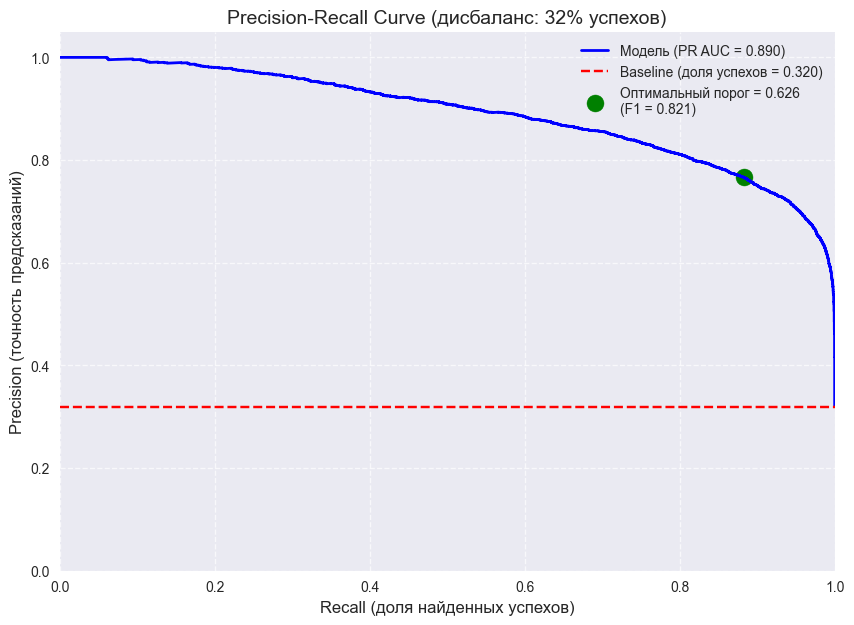

(0.6263076171205622, 0.8900504557001147)

In [73]:
plot_precision_recall_curve(y_test, results['probabilities'])

–í–∏–¥–∏–º–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –Ω–µ—Ç.

#### –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫

Text(0.5, 31.222222222222214, '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')

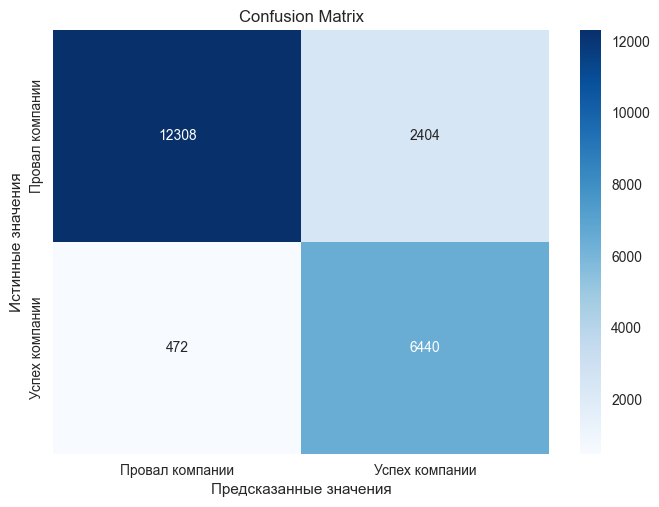

In [74]:
cm = confusion_matrix(y_test, results['predictions'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['–ü—Ä–æ–≤–∞–ª –∫–æ–º–ø–∞–Ω–∏–∏', '–£—Å–ø–µ—Ö –∫–æ–º–ø–∞–Ω–∏–∏'],
            yticklabels=['–ü—Ä–æ–≤–∞–ª –∫–æ–º–ø–∞–Ω–∏–∏', '–£—Å–ø–µ—Ö –∫–æ–º–ø–∞–Ω–∏–∏'])
plt.title(f'Confusion Matrix')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')

In [75]:
print(f"–¢–µ—Å—Ç–æ–≤—ã–π Precision: {precision_score(y_test, results['predictions']):.3f}")
print(f"–¢–µ—Å—Ç–æ–≤—ã–π Recall: {recall_score(y_test, results['predictions']):.3f}")

–¢–µ—Å—Ç–æ–≤—ã–π Precision: 0.728
–¢–µ—Å—Ç–æ–≤—ã–π Recall: 0.932


–û—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–æ–≤—ã—Å–∏–ª–∏ –ø–æ–ª–Ω–æ—Ç—É –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π, –Ω–æ –∑–∞ —Å—á—ë—Ç –ø—Ä–æ—Å–µ–¥–∞–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏.

#### –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ (SHAP)

–ì—Ä–∞—Ñ–∏–∫–æ–≤ –º–Ω–æ–≥–æ - –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∏ –∏ –∫–æ—Å–º–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª Qwen.

**–°–æ–∑–¥–∞–Ω–∏–µ Explainer –∏ –ø–æ–ª—É—á–µ–Ω–∏–µ SHAP –∑–Ω–∞—á–µ–Ω–∏–π**

In [76]:
# 1. –°–æ–∑–¥–∞–µ–º Explainer
# –î–ª—è –¥–µ—Ä–µ–≤—å–µ–≤ (LightGBM/XGBoost) –∏—Å–ø–æ–ª—å–∑—É–µ–º TreeExplainer
explainer = shap.TreeExplainer(
    model=best_model,
    feature_names=X_test_no_text.columns.tolist()
)

# 2. –í—ã—á–∏—Å–ª—è–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è
sample_size = len(X_test_no_text)
X_sample = X_test_no_text.iloc[:sample_size]

print(f"\n–í—ã—á–∏—Å–ª—è–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è {sample_size} –ø—Ä–∏–º–µ—Ä–æ–≤...")
shap_values = explainer(X_sample)

# 3. –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É SHAP –∑–Ω–∞—á–µ–Ω–∏–π
print("\n–°—Ç—Ä—É–∫—Ç—É—Ä–∞ SHAP –∑–Ω–∞—á–µ–Ω–∏–π:")
print(f"- –§–æ—Ä–º–∞: {shap_values.shape}")
print(f"- –¢–∏–ø: {type(shap_values)}")

# –î–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º, –Ω—É–∂–Ω–æ –ª–∏ –≤—ã–±—Ä–∞—Ç—å –∫–ª–∞—Å—Å
if len(shap_values.shape) == 3:
    print("- –≠—Ç–æ –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è (2 –∫–ª–∞—Å—Å–∞)")
    print("- –ë–µ—Ä–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ (—É—Å–ø–µ—Ö = 1)")
    shap_values = shap_values[:, :, 1]
    print(f"  –ù–æ–≤–∞—è —Ñ–æ—Ä–º–∞: {shap_values.shape}")
else:
    print("- –≠—Ç–æ –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å –æ–¥–Ω–∏–º –Ω–∞–±–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏–π")

# 4. –ü—Ä–æ–≤–µ—Ä—è–µ–º –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (expected_value)
expected_value =  1 / (1 + np.exp(-explainer.expected_value))
if isinstance(expected_value, np.ndarray) and len(expected_value) > 1:
    expected_value = 1 / (1 + np.exp(expected_value[1]))  # –ë–µ—Ä–µ–º –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
print(f"\n–ë–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (—Å—Ä–µ–¥–Ω—è—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞): {expected_value:.4f}")

# 5. –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç Explanation –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
shap_explanation = shap.Explanation(
    values=shap_values,
    base_values=expected_value,
    data=X_sample.values,
    feature_names=X_sample.columns.tolist()
)


–í—ã—á–∏—Å–ª—è–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è 21624 –ø—Ä–∏–º–µ—Ä–æ–≤...

–°—Ç—Ä—É–∫—Ç—É—Ä–∞ SHAP –∑–Ω–∞—á–µ–Ω–∏–π:
- –§–æ—Ä–º–∞: (21624, 34)
- –¢–∏–ø: <class 'shap._explanation.Explanation'>
- –≠—Ç–æ –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å –æ–¥–Ω–∏–º –Ω–∞–±–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏–π

–ë–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (—Å—Ä–µ–¥–Ω—è—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞): 0.0822


**–ì–ª–æ–±–∞–ª—å–Ω–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**

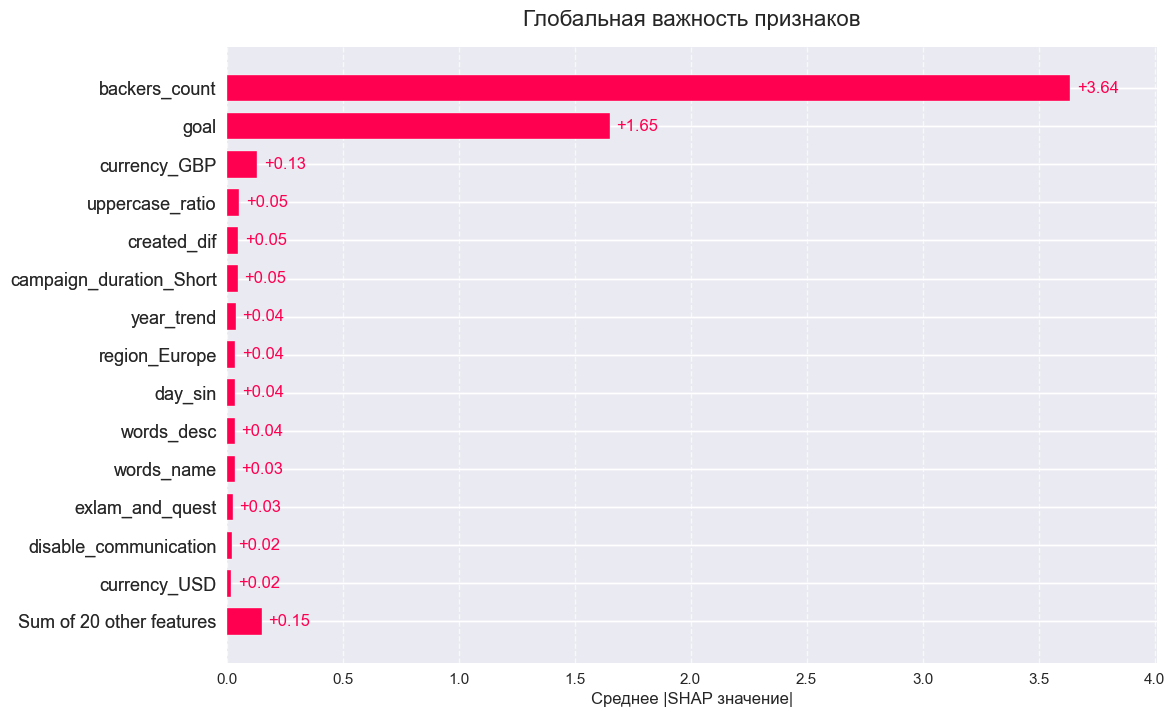


–¢–û–ü-5 –ü–†–ò–ó–ù–ê–ö–û–í –ü–û –ì–õ–û–ë–ê–õ–¨–ù–û–ô –í–ê–ñ–ù–û–°–¢–ò
1. backers_count: 3.6363
2. goal: 1.6506
3. currency_GBP: 0.1313
4. uppercase_ratio: 0.0546
5. created_dif: 0.0508


In [77]:
plt.clf() 
plt.close('all')
fig, ax = plt.subplots(figsize=(12, 8))

# –°—Ç—Ä–æ–∏–º –ë–ê–†-–ü–õ–û–¢ —Å SHAP –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ (—Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫!)
shap.plots.bar(shap_explanation, max_display=15, show=False, ax=ax)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –æ—Å–µ–π
ax.set_title('–ì–ª–æ–±–∞–ª—å–Ω–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', fontsize=16, pad=15)
ax.set_xlabel('–°—Ä–µ–¥–Ω–µ–µ |SHAP –∑–Ω–∞—á–µ–Ω–∏–µ|', fontsize=12)
ax.set_ylabel('')

# –£–ª—É—á—à–∞–µ–º —á–∏—Ç–∞–µ–º–æ—Å—Ç—å
ax.grid(axis='x', linestyle='--', alpha=0.7)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.show()

# –¢–µ–∫—Å—Ç–æ–≤—ã–π –≤—ã–≤–æ–¥ —Ç–æ–ø-5 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–æ—Ç–¥–µ–ª—å–Ω–æ –æ—Ç –≥—Ä–∞—Ñ–∏–∫–∞)
print("\n" + "="*50)
print("–¢–û–ü-5 –ü–†–ò–ó–ù–ê–ö–û–í –ü–û –ì–õ–û–ë–ê–õ–¨–ù–û–ô –í–ê–ñ–ù–û–°–¢–ò")
print("="*50)

# –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ |SHAP –∑–Ω–∞—á–µ–Ω–∏–µ| –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
feature_importance = np.abs(shap_explanation.values).mean(axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

for i, idx in enumerate(sorted_idx[:5]):
    feature = shap_explanation.feature_names[idx]
    impact = feature_importance[idx]
    print(f"{i+1}. {feature}: {impact:.4f}")

–ö–∞–∫ –≤–∏–¥–Ω–æ, –∫–ª—é—á–µ–≤—ã–º–∏ –æ—Å—Ç–∞—é—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–µ–∫–µ—Ä–æ–≤ –∏ —Å—É–º–º–∞ —Å–±–æ—Ä–æ–≤. –õ—é–±–æ–ø—ã—Ç–Ω–æ –µ—â—ë —Å–∏–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ —Ñ—É–Ω—Ç–æ–≤ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–∞–ª—é—Ç—ã. –ë—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ –∏–º–µ–Ω–Ω–æ –æ–Ω–∏ –≤–ª–∏—è—é—Ç.

–í —Ü–µ–ª–æ–º —Å–∏–ª—å–Ω–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å.

**Waterfall Plot ‚Äî –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è**

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —É—Å–ø–µ—à–Ω—ã–π –ø—Ä–æ–µ–∫—Ç (–∏–Ω–¥–µ–∫—Å 4354)
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞: 99.99%


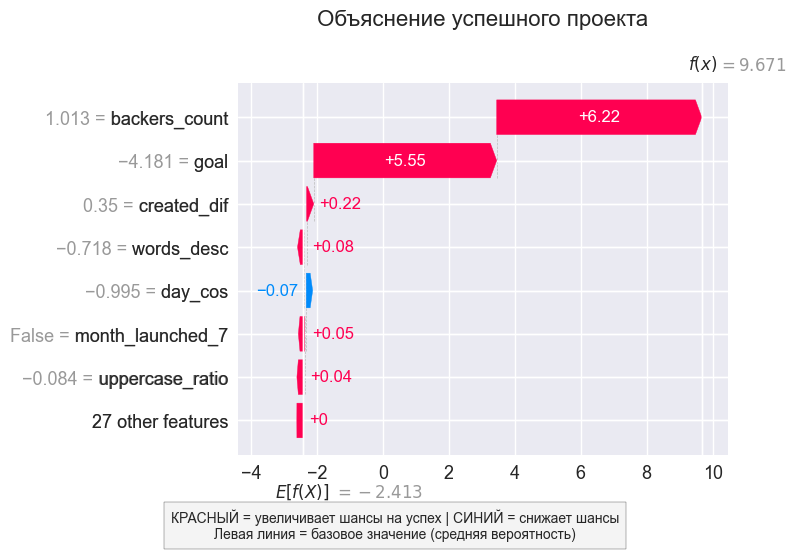


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –£–°–ü–ï–®–ù–û–ì–û –ü–†–û–ï–ö–¢–ê
–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:
  1. backers_count = 1.01: +6.217 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  2. goal = -4.18: +5.546 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  3. created_dif = 0.35: +0.217 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º

–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —Å–Ω–∏–∂–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:
  1. day_cos = -0.99: -0.075 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  2. year_trend = 6.00: -0.013 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  3. campaign_duration_Short = 0.00: -0.013 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º

üí° –ò—Ç–æ–≥: –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = -2.413
   –°—É–º–º–∞—Ä–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ = 12.084
   –§–∏–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = 9.671
   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞ = 99.99%


In [79]:
# –ù–∞—Ö–æ–¥–∏–º –¢–ò–ü–ò–ß–ù–´–ô –£–°–ü–ï–®–ù–´–ô –ø—Ä–æ–µ–∫—Ç
success_idx = np.argmax(shap_explanation.base_values + shap_explanation.values.sum(axis=1))
success_prob = 1 / (1 + np.exp(-(shap_explanation.base_values[success_idx] + shap_explanation.values[success_idx].sum())))
print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —É—Å–ø–µ—à–Ω—ã–π –ø—Ä–æ–µ–∫—Ç (–∏–Ω–¥–µ–∫—Å {success_idx})")
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞: {success_prob:.2%}")

# –°–û–ó–î–ê–ï–ú –ì–†–ê–§–ò–ö
shap.plots.waterfall(shap_explanation[success_idx], max_display=8, show=False)
ax = plt.gca()  # –ü–æ–ª—É—á–∞–µ–º —Ç–µ–∫—É—â—É—é –æ—Å—å

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–≥–æ–ª–æ–≤–æ–∫
ax.set_title('–û–±—ä—è—Å–Ω–µ–Ω–∏–µ —É—Å–ø–µ—à–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞', fontsize=16, pad=20)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ—è—Å–Ω–µ–Ω–∏–µ –ø–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–º
plt.figtext(0.5, 0.01, 
            "–ö–†–ê–°–ù–´–ô = —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö | –°–ò–ù–ò–ô = —Å–Ω–∏–∂–∞–µ—Ç —à–∞–Ω—Å—ã\n"
            "–õ–µ–≤–∞—è –ª–∏–Ω–∏—è = –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (—Å—Ä–µ–¥–Ω—è—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å)",
            ha="center", 
            fontsize=10, 
            bbox={"facecolor":"#f0f0f0", "alpha":0.7, "pad":5})

# 4. –ù–ê–°–¢–†–ê–ò–í–ê–ï–ú –í–ù–ï–®–ù–ò–ô –í–ò–î
plt.tight_layout(rect=[0, 0.05, 1, 1])  # –û—Å—Ç–∞–≤–ª—è–µ–º –º–µ—Å—Ç–æ –¥–ª—è –ø–æ—è—Å–Ω–µ–Ω–∏—è –≤–Ω–∏–∑—É
plt.show()

# 5. –¢–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
print("\n" + "="*50)
print("–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –£–°–ü–ï–®–ù–û–ì–û –ü–†–û–ï–ö–¢–ê")
print("="*50)

# –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è
base_value = shap_explanation.base_values[success_idx]
shap_values = shap_explanation.values[success_idx]
data = shap_explanation.data[success_idx]
feature_names = shap_explanation.feature_names

# –¢–æ–ø-3 –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
sorted_indices = np.argsort(np.abs(shap_values))[::-1]
top_positive = [i for i in sorted_indices if shap_values[i] > 0][:3]
top_negative = [i for i in sorted_indices if shap_values[i] < 0][:3]

print("–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:")
for i, idx in enumerate(top_positive):
    print(f"  {i+1}. {feature_names[idx]} = {data[idx]:.2f}: +{shap_values[idx]:.3f} –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º")

print("\n–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —Å–Ω–∏–∂–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:")
for i, idx in enumerate(top_negative):
    print(f"  {i+1}. {feature_names[idx]} = {data[idx]:.2f}: {shap_values[idx]:.3f} –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º")

print(f"\nüí° –ò—Ç–æ–≥: –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = {base_value:.3f}")
print(f"   –°—É–º–º–∞—Ä–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ = {shap_values.sum():.3f}")
print(f"   –§–∏–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = {base_value + shap_values.sum():.3f}")
print(f"   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞ = {success_prob:.2%}")

–ö–∞–∫ –≤–∏–¥–Ω–æ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å —É—Å–ø–µ—Ö–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –±–µ–∫–µ—Ä–æ–≤ - —ç—Ç–æ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å.

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–µ–∫—Ç (–∏–Ω–¥–µ–∫—Å 19830)
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞: 0.00%


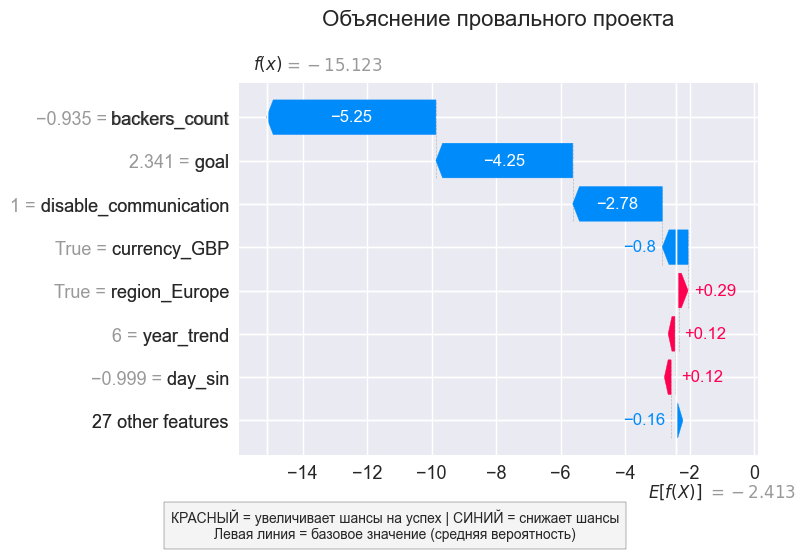


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ü–†–û–í–ê–õ–¨–ù–û–ì–û –ü–†–û–ï–ö–¢–ê
–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:
  1. region_Europe = 1.00: +0.293 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  2. year_trend = 6.00: +0.118 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  3. day_sin = -1.00: +0.117 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º

–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —Å–Ω–∏–∂–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:
  1. backers_count = -0.94: -5.254 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  2. goal = 2.34: -4.245 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º
  3. disable_communication = 1.00: -2.778 –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º

üí° –ò—Ç–æ–≥: –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = -2.413
   –°—É–º–º–∞—Ä–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ = -12.710
   –§–∏–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = -15.123
   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞ = 0.00%


In [80]:
# –ù–∞—Ö–æ–¥–∏–º –¢–ò–ü–ò–ß–ù–´–ô –ü–†–û–í–ê–õ–¨–ù–´–ô –ø—Ä–æ–µ–∫—Ç
success_idx = np.argmin(shap_explanation.base_values + shap_explanation.values.sum(axis=1))
success_prob = 1 / (1 + np.exp(-(shap_explanation.base_values[success_idx] + shap_explanation.values[success_idx].sum())))
print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–µ–∫—Ç (–∏–Ω–¥–µ–∫—Å {success_idx})")
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞: {success_prob:.2%}")

# –°–û–ó–î–ê–ï–ú –ì–†–ê–§–ò–ö
shap.plots.waterfall(shap_explanation[success_idx], max_display=8, show=False)
ax = plt.gca()  # –ü–æ–ª—É—á–∞–µ–º —Ç–µ–∫—É—â—É—é –æ—Å—å

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–≥–æ–ª–æ–≤–æ–∫
ax.set_title('–û–±—ä—è—Å–Ω–µ–Ω–∏–µ –ø—Ä–æ–≤–∞–ª—å–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞', fontsize=16, pad=20)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ—è—Å–Ω–µ–Ω–∏–µ –ø–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–º
plt.figtext(0.5, 0.01, 
            "–ö–†–ê–°–ù–´–ô = —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö | –°–ò–ù–ò–ô = —Å–Ω–∏–∂–∞–µ—Ç —à–∞–Ω—Å—ã\n"
            "–õ–µ–≤–∞—è –ª–∏–Ω–∏—è = –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (—Å—Ä–µ–¥–Ω—è—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å)",
            ha="center", 
            fontsize=10, 
            bbox={"facecolor":"#f0f0f0", "alpha":0.7, "pad":5})

# 4. –ù–ê–°–¢–†–ê–ò–í–ê–ï–ú –í–ù–ï–®–ù–ò–ô –í–ò–î
plt.tight_layout(rect=[0, 0.05, 1, 1])  # –û—Å—Ç–∞–≤–ª—è–µ–º –º–µ—Å—Ç–æ –¥–ª—è –ø–æ—è—Å–Ω–µ–Ω–∏—è –≤–Ω–∏–∑—É
plt.show()

# 5. –¢–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
print("\n" + "="*50)
print("–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ü–†–û–í–ê–õ–¨–ù–û–ì–û –ü–†–û–ï–ö–¢–ê")
print("="*50)

# –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è
base_value = shap_explanation.base_values[success_idx]
shap_values = shap_explanation.values[success_idx]
data = shap_explanation.data[success_idx]
feature_names = shap_explanation.feature_names

# –¢–æ–ø-3 –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
sorted_indices = np.argsort(np.abs(shap_values))[::-1]
top_positive = [i for i in sorted_indices if shap_values[i] > 0][:3]
top_negative = [i for i in sorted_indices if shap_values[i] < 0][:3]

print("–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:")
for i, idx in enumerate(top_positive):
    print(f"  {i+1}. {feature_names[idx]} = {data[idx]:.2f}: +{shap_values[idx]:.3f} –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º")

print("\n–¢–æ–ø-3 —Ñ–∞–∫—Ç–æ—Ä–∞, —Å–Ω–∏–∂–∞—é—â–∏—Ö —à–∞–Ω—Å—ã:")
for i, idx in enumerate(top_negative):
    print(f"  {i+1}. {feature_names[idx]} = {data[idx]:.2f}: {shap_values[idx]:.3f} –∫ –ª–æ–≥-—à–∞–Ω—Å–∞–º")

print(f"\nüí° –ò—Ç–æ–≥: –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = {base_value:.3f}")
print(f"   –°—É–º–º–∞—Ä–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ = {shap_values.sum():.3f}")
print(f"   –§–∏–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = {base_value + shap_values.sum():.3f}")
print(f"   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Å–ø–µ—Ö–∞ = {success_prob:.2%}")

–ó–¥–µ—Å—å –Ω–∞–æ–±–æ—Ä–æ—Ç –≤–∏–¥–Ω–æ, —á—Ç–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –±–µ–∫–µ—Ä–æ–≤, —Å–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–∞—è —Ü–µ–ª—å –∏ –æ—Ç–∫–ª—é—á—ë–Ω–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ —Å—á–∏—Ç–∞–π –ø–æ—Å—Ç–∞–≤–∏–ª–∏ —Å—Ä–∞–∑—É –∫—Ä–µ—Å—Ç –Ω–∞ –ø—Ä–æ–µ–∫—Ç–µ. –õ—é–±–æ–ø—ã—Ç–Ω–æ, —á—Ç–æ –∫–∞–∫ –∏ –≤ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Ñ—É–Ω—Ç—ã –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–∞–ª—é—Ç—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å–∏–ª—å–Ω–æ –ø–æ–Ω–∏–∂–∞—é—Ç —à–∞–Ω—Å—ã.

**–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å SHAP –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞**

–î–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –≤–æ–∑—å–º—ë–º —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: 'backers_count' (—Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)


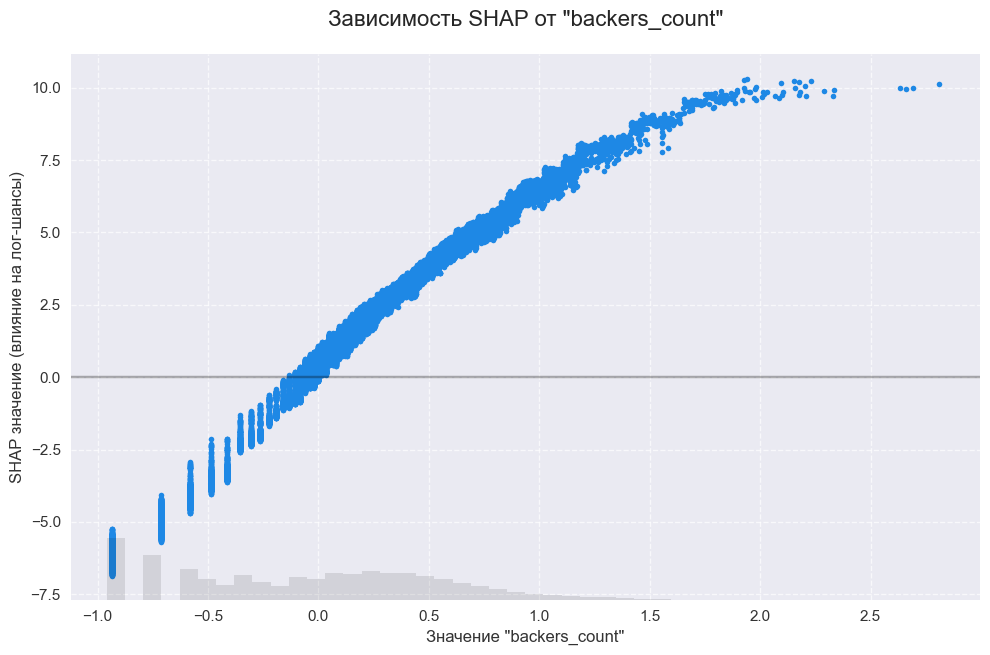


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø 'BACKERS_COUNT'
‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º 21624 –ø—Ä–∏–º–µ—Ä–æ–≤
‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π
‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö

üí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: backers_count –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ 2.43-2.81


In [81]:
# 1. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –°–ê–ú–´–ô –í–ê–ñ–ù–´–ô –ø—Ä–∏–∑–Ω–∞–∫ (–ø–æ —Å—Ä–µ–¥–Ω–µ–º—É |SHAP|)
feature_importance = np.abs(shap_explanation.values).mean(axis=0)
most_important_idx = np.argmax(feature_importance)
most_important_feature = shap_explanation.feature_names[most_important_idx]
print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: '{most_important_feature}' (—Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)")

# 2. –°–æ–∑–¥–∞–µ–º –ß–ò–°–¢–´–ô –≥—Ä–∞—Ñ–∏–∫ —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –æ—Å–∏
plt.clf()
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 7))

# 3. –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
shap.plots.scatter(
    shap_explanation[:, most_important_feature],
    ax=ax,
    show=False
)

# 4. –£–ª—É—á—à–∞–µ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
ax.set_title(f'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å SHAP –æ—Ç "{most_important_feature}"', fontsize=16, pad=20)
ax.set_xlabel(f'–ó–Ω–∞—á–µ–Ω–∏–µ "{most_important_feature}"', fontsize=12)
ax.set_ylabel('SHAP –∑–Ω–∞—á–µ–Ω–∏–µ (–≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ª–æ–≥-—à–∞–Ω—Å—ã)', fontsize=12)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.grid(linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# 5. –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# 6. –¢–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
print("\n" + "="*50)
print(f"–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø '{most_important_feature.upper()}'")
print("="*50)

# –ü–†–ê–í–ò–õ–¨–ù–û–ï –ü–û–õ–£–ß–ï–ù–ò–ï –î–ê–ù–ù–´–• (–∫–∞–∫ –∂–µ –¥–æ–ª–≥–æ —è —Å —ç—Ç–∏–º –µ–±–∞–ª—Å—è)
feature_idx = shap_explanation.feature_names.index(most_important_feature)
shap_values = np.array(shap_explanation.values[:, feature_idx]).flatten()
feature_values = np.array(shap_explanation.data[:, feature_idx]).flatten()

print(f"‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º {len(shap_values)} –ø—Ä–∏–º–µ—Ä–æ–≤")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –¥–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–º–∏
def is_numeric_array(arr):
    """–ü—Ä–æ–≤–µ—Ä—è–µ—Ç, —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏ –º–∞—Å—Å–∏–≤ —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è"""
    try:
        # –ü—ã—Ç–∞–µ–º—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ float
        np.array(arr, dtype=float)
        return True
    except:
        return False

is_numeric = is_numeric_array(feature_values)

if is_numeric:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π")
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —á–∏—Å–ª–æ–≤–æ–π –º–∞—Å—Å–∏–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    numeric_values = np.array(feature_values, dtype=float)
    
    # –£–¥–∞–ª—è–µ–º NaN –∑–Ω–∞—á–µ–Ω–∏—è –¢–û–õ–¨–ö–û –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    mask = ~np.isnan(shap_values) & ~np.isnan(numeric_values)
    valid_shap = shap_values[mask]
    valid_features = numeric_values[mask]
    
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
    if len(valid_shap) > 1:
        correlation = np.corrcoef(valid_features, valid_shap)[0, 1]
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–∏–ø –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
        if correlation > 0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        elif correlation < -0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –Ω–∏–∂–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        else:
            print("‚Üí –ù–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–¥–µ-—Ç–æ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –¥–∏–∞–ø–∞–∑–æ–Ω–∞")
        
        # –ü—ã—Ç–∞–µ–º—Å—è –Ω–∞–π—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É
        try:
            import pandas as pd
            df = pd.DataFrame({
                'feature': valid_features,
                'shap': valid_shap
            })
            
            # –ë–∏–Ω–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
            df['bin'] = pd.cut(df['feature'], bins=min(10, len(df)//10))
            bin_means = df.groupby('bin')['shap'].mean()
            
            # –ù–∞—Ö–æ–¥–∏–º –±–∏–Ω —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º SHAP
            best_bin = bin_means.idxmax()
            best_value = f"{best_bin.left:.2f}-{best_bin.right:.2f}"
            
            print(f"\nüí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: {most_important_feature} –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ {best_value}")
        except Exception as e:
            print(f"\n‚ö†Ô∏è –û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ–∏—Å–∫–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞: {str(e)}")
    else:
        print("‚ö†Ô∏è –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏")
else:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π")
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
    unique_values = np.unique(feature_values)
    print(f"‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç {len(unique_values)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π")
    
    # –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
    shap_by_value = {}
    for val in unique_values:
        mask = (feature_values == val)
        shap_by_value[val] = np.mean(shap_values[mask])
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ SHAP –∑–Ω–∞—á–µ–Ω–∏—é
    sorted_values = sorted(shap_by_value.items(), key=lambda x: x[1], reverse=True)
    
    print("\n–°—Ä–µ–¥–Ω–µ–µ SHAP –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º:")
    for val, shap_val in sorted_values:
        print(f"  {val}: {shap_val:.3f}")


–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–ª—è goal

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: 'goal'


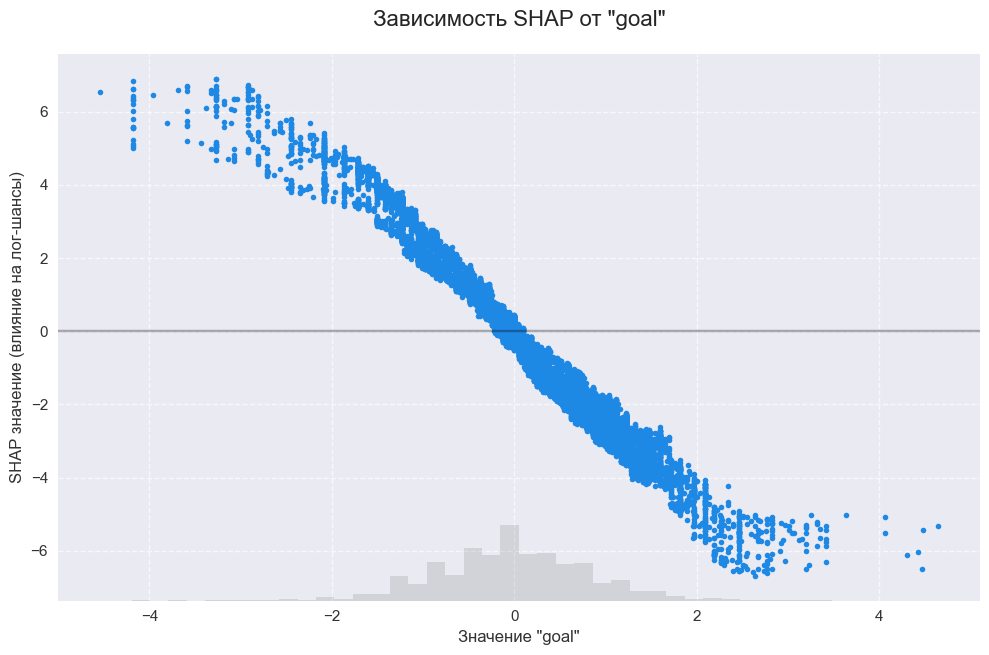


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø 'GOAL'
‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º 21624 –ø—Ä–∏–º–µ—Ä–æ–≤
‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π
‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –Ω–∏–∂–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö

üí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: goal –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ -4.55--3.63


In [82]:
# 1. –û–ø—Ä–µ–¥–µ–ª—è–µ–º goal
most_important_idx = feature_names.index('goal')
most_important_feature = shap_explanation.feature_names[most_important_idx]
print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: '{most_important_feature}'")

# 2. –°–æ–∑–¥–∞–µ–º –ß–ò–°–¢–´–ô –≥—Ä–∞—Ñ–∏–∫ —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –æ—Å–∏
plt.clf()
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 7))

# 3. –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
shap.plots.scatter(
    shap_explanation[:, most_important_feature],
    ax=ax,
    show=False
)

# 4. –£–ª—É—á—à–∞–µ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
ax.set_title(f'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å SHAP –æ—Ç "{most_important_feature}"', fontsize=16, pad=20)
ax.set_xlabel(f'–ó–Ω–∞—á–µ–Ω–∏–µ "{most_important_feature}"', fontsize=12)
ax.set_ylabel('SHAP –∑–Ω–∞—á–µ–Ω–∏–µ (–≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ª–æ–≥-—à–∞–Ω—Å—ã)', fontsize=12)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.grid(linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# 5. –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# 6. –¢–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
print("\n" + "="*50)
print(f"–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø '{most_important_feature.upper()}'")
print("="*50)

# –ü–†–ê–í–ò–õ–¨–ù–û–ï –ü–û–õ–£–ß–ï–ù–ò–ï –î–ê–ù–ù–´–• (–∫–∞–∫ –∂–µ –¥–æ–ª–≥–æ —è —Å —ç—Ç–∏–º –µ–±–∞–ª—Å—è)
feature_idx = shap_explanation.feature_names.index(most_important_feature)
shap_values = np.array(shap_explanation.values[:, feature_idx]).flatten()
feature_values = np.array(shap_explanation.data[:, feature_idx]).flatten()

print(f"‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º {len(shap_values)} –ø—Ä–∏–º–µ—Ä–æ–≤")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –¥–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–º–∏
def is_numeric_array(arr):
    """–ü—Ä–æ–≤–µ—Ä—è–µ—Ç, —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏ –º–∞—Å—Å–∏–≤ —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è"""
    try:
        # –ü—ã—Ç–∞–µ–º—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ float
        np.array(arr, dtype=float)
        return True
    except:
        return False

is_numeric = is_numeric_array(feature_values)

if is_numeric:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π")
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —á–∏—Å–ª–æ–≤–æ–π –º–∞—Å—Å–∏–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    numeric_values = np.array(feature_values, dtype=float)
    
    # –£–¥–∞–ª—è–µ–º NaN –∑–Ω–∞—á–µ–Ω–∏—è –¢–û–õ–¨–ö–û –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    mask = ~np.isnan(shap_values) & ~np.isnan(numeric_values)
    valid_shap = shap_values[mask]
    valid_features = numeric_values[mask]
    
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
    if len(valid_shap) > 1:
        correlation = np.corrcoef(valid_features, valid_shap)[0, 1]
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–∏–ø –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
        if correlation > 0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        elif correlation < -0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –Ω–∏–∂–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        else:
            print("‚Üí –ù–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–¥–µ-—Ç–æ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –¥–∏–∞–ø–∞–∑–æ–Ω–∞")
        
        # –ü—ã—Ç–∞–µ–º—Å—è –Ω–∞–π—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É
        try:
            import pandas as pd
            df = pd.DataFrame({
                'feature': valid_features,
                'shap': valid_shap
            })
            
            # –ë–∏–Ω–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
            df['bin'] = pd.cut(df['feature'], bins=min(10, len(df)//10))
            bin_means = df.groupby('bin')['shap'].mean()
            
            # –ù–∞—Ö–æ–¥–∏–º –±–∏–Ω —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º SHAP
            best_bin = bin_means.idxmax()
            best_value = f"{best_bin.left:.2f}-{best_bin.right:.2f}"
            
            print(f"\nüí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: {most_important_feature} –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ {best_value}")
        except Exception as e:
            print(f"\n‚ö†Ô∏è –û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ–∏—Å–∫–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞: {str(e)}")
    else:
        print("‚ö†Ô∏è –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏")
else:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π")
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
    unique_values = np.unique(feature_values)
    print(f"‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç {len(unique_values)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π")
    
    # –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
    shap_by_value = {}
    for val in unique_values:
        mask = (feature_values == val)
        shap_by_value[val] = np.mean(shap_values[mask])
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ SHAP –∑–Ω–∞—á–µ–Ω–∏—é
    sorted_values = sorted(shap_by_value.items(), key=lambda x: x[1], reverse=True)
    
    print("\n–°—Ä–µ–¥–Ω–µ–µ SHAP –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º:")
    for val, shap_val in sorted_values:
        print(f"  {val}: {shap_val:.3f}")


–ù–∞–∫–æ–Ω–µ—Ü –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞–∫–æ–π-—Ç–æ –º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ - –Ω–∞–ø—Ä–∏–º–µ—Ä –¥–ª–∏–Ω—É –æ–ø–∏—Å–∞–Ω–∏—è.

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: 'words_desc'


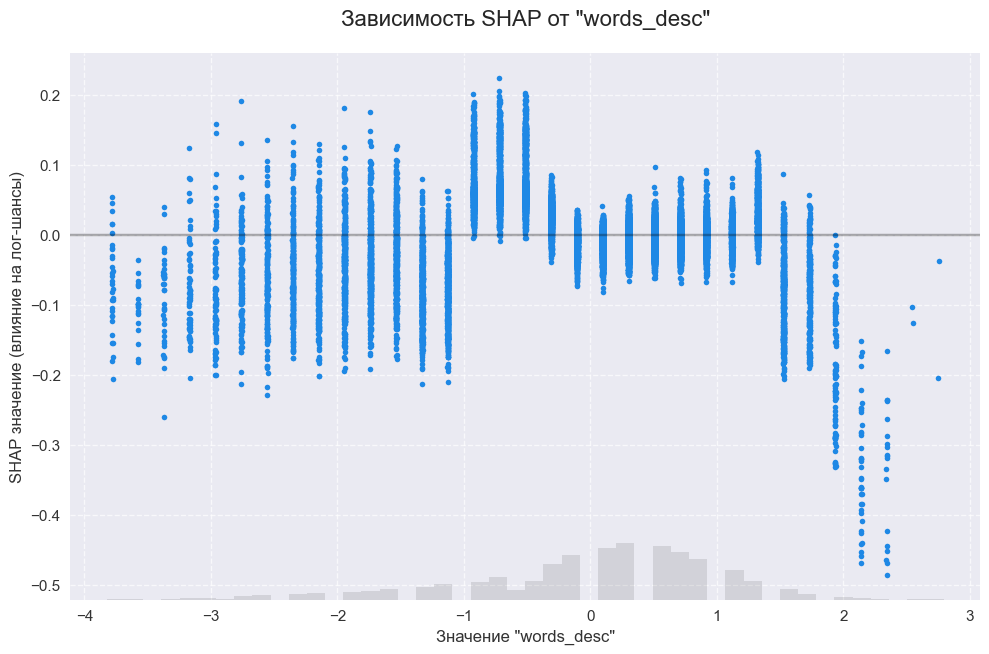


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø 'WORDS_DESC'
‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º 21624 –ø—Ä–∏–º–µ—Ä–æ–≤
‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π
‚Üí –ù–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–¥–µ-—Ç–æ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –¥–∏–∞–ø–∞–∑–æ–Ω–∞

üí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: words_desc –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ -1.17--0.51


In [83]:
# 1. –û–ø—Ä–µ–¥–µ–ª—è–µ–º currency_GBP
most_important_idx = feature_names.index('words_desc')
most_important_feature = shap_explanation.feature_names[most_important_idx]
print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è: '{most_important_feature}'")

# 2. –°–æ–∑–¥–∞–µ–º –ß–ò–°–¢–´–ô –≥—Ä–∞—Ñ–∏–∫ —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –æ—Å–∏
plt.clf()
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 7))

# 3. –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
shap.plots.scatter(
    shap_explanation[:, most_important_feature],
    ax=ax,
    show=False
)

# 4. –£–ª—É—á—à–∞–µ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
ax.set_title(f'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å SHAP –æ—Ç "{most_important_feature}"', fontsize=16, pad=20)
ax.set_xlabel(f'–ó–Ω–∞—á–µ–Ω–∏–µ "{most_important_feature}"', fontsize=12)
ax.set_ylabel('SHAP –∑–Ω–∞—á–µ–Ω–∏–µ (–≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ª–æ–≥-—à–∞–Ω—Å—ã)', fontsize=12)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.grid(linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# 5. –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# 6. –¢–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
print("\n" + "="*50)
print(f"–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ó–ê–í–ò–°–ò–ú–û–°–¢–ò –î–õ–Ø '{most_important_feature.upper()}'")
print("="*50)

# –ü–†–ê–í–ò–õ–¨–ù–û–ï –ü–û–õ–£–ß–ï–ù–ò–ï –î–ê–ù–ù–´–• (–∫–∞–∫ –∂–µ –¥–æ–ª–≥–æ —è —Å —ç—Ç–∏–º –µ–±–∞–ª—Å—è)
feature_idx = shap_explanation.feature_names.index(most_important_feature)
shap_values = np.array(shap_explanation.values[:, feature_idx]).flatten()
feature_values = np.array(shap_explanation.data[:, feature_idx]).flatten()

print(f"‚Üí –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º {len(shap_values)} –ø—Ä–∏–º–µ—Ä–æ–≤")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –¥–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–º–∏
def is_numeric_array(arr):
    """–ü—Ä–æ–≤–µ—Ä—è–µ—Ç, —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏ –º–∞—Å—Å–∏–≤ —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è"""
    try:
        # –ü—ã—Ç–∞–µ–º—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ float
        np.array(arr, dtype=float)
        return True
    except:
        return False

is_numeric = is_numeric_array(feature_values)

if is_numeric:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π")
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —á–∏—Å–ª–æ–≤–æ–π –º–∞—Å—Å–∏–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    numeric_values = np.array(feature_values, dtype=float)
    
    # –£–¥–∞–ª—è–µ–º NaN –∑–Ω–∞—á–µ–Ω–∏—è –¢–û–õ–¨–ö–û –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    mask = ~np.isnan(shap_values) & ~np.isnan(numeric_values)
    valid_shap = shap_values[mask]
    valid_features = numeric_values[mask]
    
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
    if len(valid_shap) > 1:
        correlation = np.corrcoef(valid_features, valid_shap)[0, 1]
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–∏–ø –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
        if correlation > 0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        elif correlation < -0.7:
            print("‚Üí –õ–∏–Ω–µ–π–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –Ω–∏–∂–µ —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö")
        else:
            print("‚Üí –ù–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–¥–µ-—Ç–æ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –¥–∏–∞–ø–∞–∑–æ–Ω–∞")
        
        # –ü—ã—Ç–∞–µ–º—Å—è –Ω–∞–π—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É
        try:
            import pandas as pd
            df = pd.DataFrame({
                'feature': valid_features,
                'shap': valid_shap
            })
            
            # –ë–∏–Ω–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
            df['bin'] = pd.cut(df['feature'], bins=min(10, len(df)//10))
            bin_means = df.groupby('bin')['shap'].mean()
            
            # –ù–∞—Ö–æ–¥–∏–º –±–∏–Ω —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º SHAP
            best_bin = bin_means.idxmax()
            best_value = f"{best_bin.left:.2f}-{best_bin.right:.2f}"
            
            print(f"\nüí° –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —à–∞–Ω—Å–æ–≤ –Ω–∞ —É—Å–ø–µ—Ö: {most_important_feature} –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ {best_value}")
        except Exception as e:
            print(f"\n‚ö†Ô∏è –û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ–∏—Å–∫–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞: {str(e)}")
    else:
        print("‚ö†Ô∏è –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏")
else:
    print("‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π")
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
    unique_values = np.unique(feature_values)
    print(f"‚Üí –ü—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç {len(unique_values)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π")
    
    # –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
    shap_by_value = {}
    for val in unique_values:
        mask = (feature_values == val)
        shap_by_value[val] = np.mean(shap_values[mask])
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ SHAP –∑–Ω–∞—á–µ–Ω–∏—é
    sorted_values = sorted(shap_by_value.items(), key=lambda x: x[1], reverse=True)
    
    print("\n–°—Ä–µ–¥–Ω–µ–µ SHAP –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º:")
    for val, shap_val in sorted_values:
        print(f"  {val}: {shap_val:.3f}")


–í–∏–¥–Ω–æ, —á—Ç–æ —Å—É–ø–µ—Ä –∫–æ—Ä–æ—Ç–∫–æ–µ –∏–ª–∏ –¥–ª–∏–Ω–Ω–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ - —ç—Ç–æ –ø–ª–æ—Ö–æ (–æ–∂–∏–¥–∞–µ–º–æ). –û–ø—Ç–∏–º–∞–ª—å–Ω–æ –≥–¥–µ-—Ç–æ –ø–æ—Å–µ—Ä–µ–¥–∏–Ω–µ.

## Stacking –∏ blending (–Ω–µ–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π)

### Stacking

–ë—É–¥–µ–º —Å–æ–±–∏—Ä–∞—Ç—å –∏–∑ –ø—Ä–æ—Å—Ç—ã—Ö –Ω–µ–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π (—Ç–∞–∫ –∫–∞–∫ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∂–¥—É—é –æ—á–µ–Ω—å –¥–æ–ª–≥–æ) –∏ —Ç–µ—Ö, —á—Ç–æ –º—ã —É–∂–µ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–ª–∏. –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–æ –≤ –±—É–¥—É—â–µ–º.

In [78]:
best_params = {
    'n_estimators': 493, 
    'max_depth': 3, 
    'learning_rate': 0.10426716049785455, 
    'feature_fraction': 0.9947089259050176, 
    'bagging_fraction': 0.8148654260211938, 
    'min_child_samples': 9, 
    'reg_alpha': 5.5112247353974215, 
    'reg_lambda': 9.561295790261457,
    "is_unbalance": True, # –î–ª—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
    'random_state': 42,
    'verbosity': -1,
    'force_col_wise': True}

selected_models = {
    # Tree-based –º–æ–¥–µ–ª–∏
    'RandomForest': RandomForestClassifier(
        n_estimators=100, max_depth=10, random_state=42
    ),
    'DecisionTree': DecisionTreeClassifier(
        max_depth=8, random_state=42
    ),
    
    # Gradient Boosting –º–æ–¥–µ–ª–∏
    'XGBoost': xgb.XGBClassifier(
        n_estimators=100, max_depth=6, learning_rate=0.1, 
        random_state=42, eval_metric='logloss', verbosity=0
    ),
    'LightGBM': lgb.LGBMClassifier(**best_params),
    'CatBoost': CatBoostClassifier(
        iterations=100, depth=6, learning_rate=0.1,
        random_state=42, verbose=False
    ),
    
    # Linear –º–æ–¥–µ–ª–∏
    'LogisticRegression': LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6}, max_iter=1000,
                   penalty='l1', random_state=42, solver='saga')
}

–í—Å–µ –º–æ–¥–µ–ª–∏ –∏–∑ —Å–ø–∏—Å–∫–∞ —É–∂–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–ª–∏—Å—å –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å, —Ç–∞–∫ —á—Ç–æ –æ—Ç–¥–µ–ª—å–Ω–æ –Ω–µ –±—É–¥–µ–º –ø—Ä–æ–≥–æ–Ω—è—Ç—å –∏—Ö.

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è cross-validation stacking

In [79]:
def create_cv_stacking_features(models, X_train, y_train, cv_folds=5):
    
    n_samples = X_train.shape[0]
    n_models = len(models)
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—É meta-features
    meta_features = np.zeros((n_samples, n_models))
    
    # –°–æ–∑–¥–∞–µ–º cross-validation –æ–±—ä–µ–∫—Ç
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    for i, (model_name, model) in enumerate(models.items()):
        print(f"   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ {i+1}/{n_models}: {model_name}")
        
        for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
            # –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ —Ñ–æ–ª–¥–∞
            X_fold_train = X_train.iloc[train_idx]
            y_fold_train = y_train.iloc[train_idx]
            X_fold_val = X_train.iloc[val_idx]
            
            # –ö–ª–æ–Ω–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å –¥–ª—è –∏–∑–±–µ–∂–∞–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ—Ä–∏–≥–∏–Ω–∞–ª–∞
            model_clone = type(model)(**model.get_params())
            model_clone.fit(X_fold_train, y_fold_train)
            pred_proba = model_clone.predict_proba(X_fold_val)[:, 1]
            
            # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è validation –∏–Ω–¥–µ–∫—Å–æ–≤
            meta_features[val_idx, i] = pred_proba
    
    return meta_features

#### –°–æ–∑–¥–∞—ë–º –º–µ—Ç–∞ —Ñ–∏—á–∏

In [80]:
start_time = time.time()
meta_features_train = create_cv_stacking_features(selected_models, X_train_no_text, y_train, cv_folds=5)
stacking_time = time.time() - start_time

print(f"\n –í—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è meta-features: {stacking_time:.1f} —Å–µ–∫—É–Ω–¥")
print(f" –§–æ—Ä–º–∞ meta-features: {meta_features_train.shape}")

meta_df = pd.DataFrame(meta_features_train, columns=list(selected_models.keys()))
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è meta-features
meta_corr = meta_df.corr()
print(f"\n –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É meta-features:")
print(f"‚Ä¢ –°—Ä–µ–¥–Ω—è—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {meta_corr.values[np.triu_indices_from(meta_corr.values, 1)].mean():.4f}")
print(f"‚Ä¢ –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {meta_corr.values[np.triu_indices_from(meta_corr.values, 1)].min():.4f}")
print(f"‚Ä¢ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {meta_corr.values[np.triu_indices_from(meta_corr.values, 1)].max():.4f}")

   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 1/6: RandomForest
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 2/6: DecisionTree
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 3/6: XGBoost
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 4/6: LightGBM
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 5/6: CatBoost
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ 6/6: LogisticRegression

 –í—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è meta-features: 91.9 —Å–µ–∫—É–Ω–¥
 –§–æ—Ä–º–∞ meta-features: (86495, 6)

 –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É meta-features:
‚Ä¢ –°—Ä–µ–¥–Ω—è—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.9706
‚Ä¢ –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.9286
‚Ä¢ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.9960


#### –û–±—É—á–∞–µ–º –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏

In [86]:
meta_models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    'XGBoost_Meta': xgb.XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, 
                                     random_state=42, eval_metric='logloss', verbosity=0),
    'LightGBM_Meta': lgb.LGBMClassifier(n_estimators=50, max_depth=3, learning_rate=0.1,
                                       random_state=42, verbosity=-1, force_col_wise=True)
}

In [87]:
# –û–±—É—á–∞–µ–º –∏ —Ç–µ—Å—Ç–∏—Ä—É–µ–º –∫–∞–∂–¥—É—é –º–µ—Ç–∞-–º–æ–¥–µ–ª—å
stacking_results = {}

for meta_name, meta_model in meta_models.items():
    print(f"\n –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å: {meta_name}")
    
    start_time = time.time()
    
    try:
        # –û–±—É—á–∞–µ–º –º–µ—Ç–∞-–º–æ–¥–µ–ª—å –Ω–∞ meta-features
        meta_model.fit(meta_features_train, y_train)
        
        # –°–æ–∑–¥–∞–µ–º test meta-features (–æ–±—É—á–∞–µ–º –±–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –ø–æ–ª–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)
        test_meta_features = np.zeros((X_test_no_text.shape[0], len(selected_models)))
        
        for i, (model_name, model) in enumerate(selected_models.items()):
            model_full = type(model)(**model.get_params())
            model_full.fit(X_train_no_text, y_train)
            test_meta_features[:, i] = model_full.predict_proba(X_test_no_text)[:, 1]
        
        training_time = time.time() - start_time
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
        results = process_result(meta_model, meta_features_train, test_meta_features)
        results['training_time'] = training_time
        results['test_meta_features'] = test_meta_features

        stacking_results[f'Stacking_{meta_name}'] = results.copy()

        print_results(results)
        
        print(f"\n –í—Ä–µ–º—è: {training_time:.2f} —Å–µ–∫")
        
    except Exception as e:
        print(f" –û—à–∏–±–∫–∞: {str(e)}")


 –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å: LogisticRegression
–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.818

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.890

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.878

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.815

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.002


 –í—Ä–µ–º—è: 25.65 —Å–µ–∫

 –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å: RandomForest
–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.816

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.890

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.878

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.816

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.001


 –í—Ä–µ–º—è: 28.48 —Å–µ–∫

 –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å: XGBoost_Meta
–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.817

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.890

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.878

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.815

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.001


 –í—Ä–µ–º—è: 24.49 —Å–µ–∫

 –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å: LightGBM_Meta
–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.817

–¢–µ—Å—Ç–æ–≤

#### –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

In [100]:
stacking_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(stacking_results.keys()),
    'f1_test': [stacking_results[name]['f1_test'] for name in stacking_results.keys()],
    'PR_AUC_test': [stacking_results[name]['PR_AUC_test'] for name in stacking_results.keys()],
    'accuracy': [stacking_results[name]['accuracy'] for name in stacking_results.keys()],
    'f1_cv_mean': [stacking_results[name]['f1_cv_mean'] for name in stacking_results.keys()],
    'f1_cv_std': [stacking_results[name]['f1_cv_std'] for name in stacking_results.keys()],
    '–í—Ä–µ–º—è (—Å–µ–∫)': [stacking_results[name]['training_time'] for name in stacking_results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ ROC-AUC
stacking_df = stacking_df.sort_values('f1_test', ascending=False).reset_index(drop=True)

print(f"\n –†–ï–ó–£–õ–¨–¢–ê–¢–´ STACKING –ú–û–î–ï–õ–ï–ô:")
print(f"{'='*100}")
print(stacking_df.round(4).to_string(index=False))


 –†–ï–ó–£–õ–¨–¢–ê–¢–´ STACKING –ú–û–î–ï–õ–ï–ô:
                     –ú–æ–¥–µ–ª—å  f1_test  PR_AUC_test  accuracy  f1_cv_mean  f1_cv_std  –í—Ä–µ–º—è (—Å–µ–∫)
Stacking_LogisticRegression    0.818        0.890     0.878       0.815      0.002       25.654
     Stacking_LightGBM_Meta    0.817        0.890     0.878       0.815      0.002       24.596
      Stacking_XGBoost_Meta    0.817        0.890     0.878       0.815      0.001       24.486
      Stacking_RandomForest    0.816        0.890     0.878       0.816      0.001       28.480


–ß—Ç–æ–∂ –¥–∞–∂–µ —Ç—É—Ç –Ω–µ —É–ª—É—á—à–∏–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

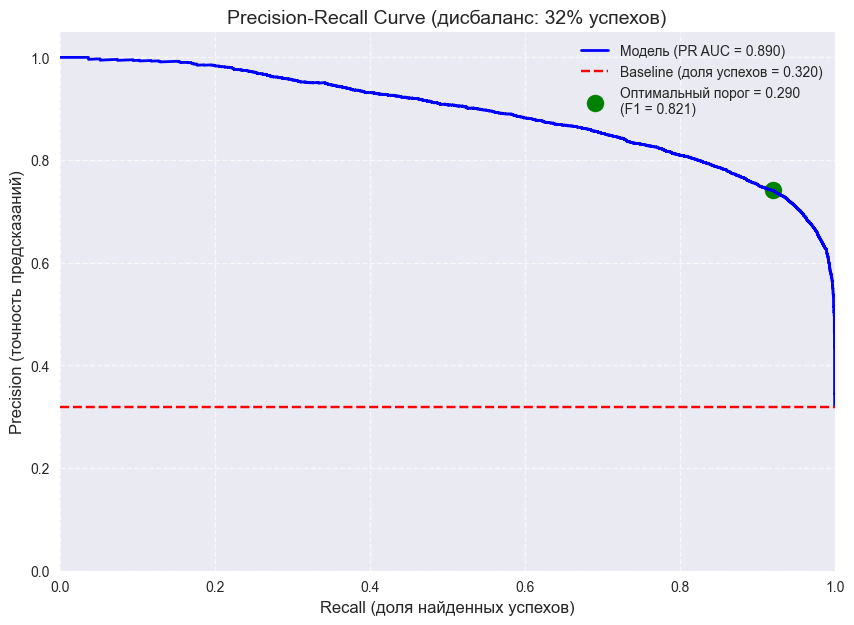

(0.2898858242927743, 0.8896492704736896)

In [101]:
plot_precision_recall_curve(y_test, stacking_results['Stacking_LogisticRegression']['probabilities'])

### –ë–ª–µ–Ω–¥–∏–Ω–≥

#### –°–æ–∑–¥–∞—ë–º validation –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [102]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è hold-out validation
X_train_main, X_val, y_train_main, y_val = train_test_split(
    X_train_no_text, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [106]:
val_predictions = {}
test_predictions_for_blending = {}

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π —á–∞—Å—Ç–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –Ω–∞ validation
for name, model in selected_models.items():
    print(f"   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: {name}")

    model_clone = type(model)(**model.get_params())
    model_clone.fit(X_train_main, y_train_main)
    val_predictions[name] = model_clone.predict_proba(X_val)[:, 1]
    
    # –î–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ–±—É—á–∞–µ–º –Ω–∞ –≤—Å–µ—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    model_full = type(model)(**model.get_params())
    model_full.fit(X_train_no_text, y_train)
    test_predictions_for_blending[name] = model_full.predict_proba(X_test_no_text)[:, 1]

   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: RandomForest
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: DecisionTree
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: XGBoost
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: LightGBM
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: CatBoost
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: LogisticRegression


#### –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –±–ª–µ–Ω–¥–∏–Ω–≥–∞

In [128]:
# 1. Simple Averaging Blending
def simple_averaging_blend(predictions_dict):
    pred_matrix = np.column_stack(list(predictions_dict.values()))
    return np.mean(pred_matrix, axis=1)

# 2. Weighted Blending —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π
def optimize_weights_blend(val_predictions_dict, y_val, method='minimize'):
    model_names = list(val_predictions_dict.keys())
    val_pred_matrix = np.column_stack(list(val_predictions_dict.values()))
    
    def objective_function(weights):
        # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –≤–µ—Å–∞
        weights = weights / weights.sum()
        blended_pred = np.dot(val_pred_matrix, weights)
        return -f1_score(y_val, (blended_pred > 0.5) * 1)  # –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π f1-score
    
    if method == 'minimize':
        # Scipy optimize
        from scipy.optimize import minimize
        
        n_models = len(model_names)
        initial_weights = np.ones(n_models) / n_models
        bounds = [(0, 1) for _ in range(n_models)]
        
        # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ: —Å—É–º–º–∞ –≤–µ—Å–æ–≤ = 1
        constraints = ({'type': 'eq', 'fun': lambda w: w.sum() - 1})
        
        result = minimize(objective_function, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)
        
        return result.x, model_names
    
    elif method == 'differential_evolution':
        # Differential Evolution
        from scipy.optimize import differential_evolution
        
        n_models = len(model_names)
        bounds = [(0, 1) for _ in range(n_models)]
        
        def objective_with_normalization(weights):
            weights = weights / weights.sum()  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤–Ω—É—Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏
            blended_pred = np.dot(val_pred_matrix, weights)
            return -f1_score(y_val, (blended_pred > 0.5) * 1)
        
        result = differential_evolution(objective_with_normalization, bounds, seed=42)
        optimal_weights = result.x / result.x.sum()  # –§–∏–Ω–∞–ª—å–Ω–∞—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
        
        return optimal_weights, model_names

# 3. Rank Blending
def rank_averaging_blend(predictions_dict, weights=None):
    model_names = list(predictions_dict.keys())
    n_samples = len(list(predictions_dict.values())[0])
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ä–∞–Ω–≥–∏
    rank_matrix = np.zeros((n_samples, len(model_names)))
    
    for i, (name, pred) in enumerate(predictions_dict.items()):
        rank_matrix[:, i] = rankdata(pred) / len(pred)  # –ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ —Ä–∞–Ω–≥–∏
    
    # –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ —Ä–∞–Ω–≥–æ–≤
    if weights is None:
        weights = np.ones(len(model_names)) / len(model_names)
    
    blended_ranks = np.dot(rank_matrix, weights)
    return blended_ranks

# 4. Power Averaging
def power_averaging_blend(predictions_dict, power=1.0, weights=None):
    pred_matrix = np.column_stack(list(predictions_dict.values()))
    
    if weights is None:
        weights = np.ones(pred_matrix.shape[1]) / pred_matrix.shape[1]
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–µ–ø–µ–Ω—å
    powered_preds = np.power(pred_matrix, power)
    
    # –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ
    blended = np.dot(powered_preds, weights)
    
    # –û–±—Ä–∞—Ç–Ω–∞—è —Å—Ç–µ–ø–µ–Ω—å
    if power != 0:
        blended = np.power(blended, 1.0/power)
    
    return blended

#### Simple Averaging

In [ ]:
blending_results = {}

simple_blend_test = simple_averaging_blend(test_predictions_for_blending)

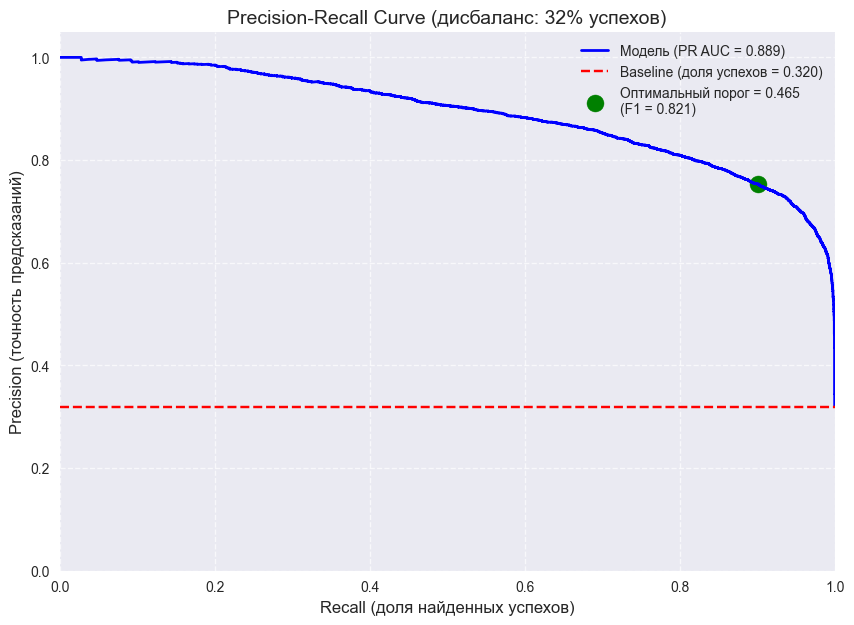

(0.4653731655916959, 0.8893693205746778)

In [130]:
plot_precision_recall_curve(y_test, simple_blend_test)

In [ ]:
simple_blend_test_pred = (simple_blend_test > 0.465) * 1
blending_results['Simple_Averaging'] = {
    'f1_score_test': f1_score(y_test, simple_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, simple_blend_test),
    'predictions': simple_blend_test,
    'method': 'Simple averaging of all models'
}

#### Optimized Weighted Blending (Scipy minimize)

In [142]:
optimal_weights_scipy, model_names = optimize_weights_blend(val_predictions, y_val, method='minimize')

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –∫ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
test_pred_matrix = np.column_stack([test_predictions_for_blending[name] for name in model_names])
weighted_blend_test = np.dot(test_pred_matrix, optimal_weights_scipy)

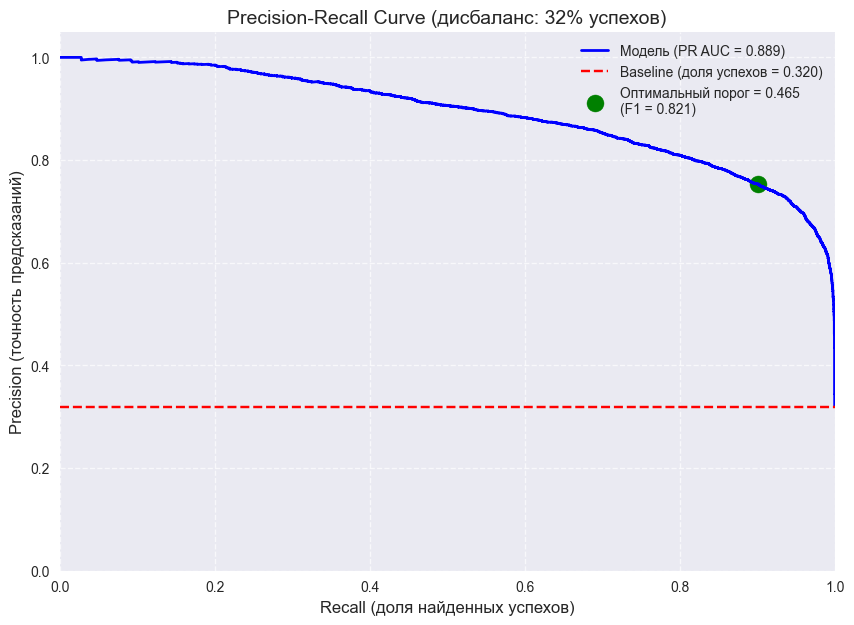

(0.4653731655916959, 0.8893693205746778)

In [143]:
plot_precision_recall_curve(y_test, weighted_blend_test)

In [154]:
weighted_blend_test_pred = (weighted_blend_test > 0.465) * 1
blending_results['Optimized_Weighted'] = {
    'f1_score_test': f1_score(y_test, weighted_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, weighted_blend_test),
    'predictions': weighted_blend_test_pred,
    'method': 'Scipy minimize optimization'
}

#### Differential Evolution Blending

In [137]:
optimal_weights_de, model_names_de = optimize_weights_blend(val_predictions, y_val, method='differential_evolution')

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –∫ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
test_pred_matrix_de = np.column_stack([test_predictions_for_blending[name] for name in model_names_de])
de_blend_test = np.dot(test_pred_matrix_de, optimal_weights_de)

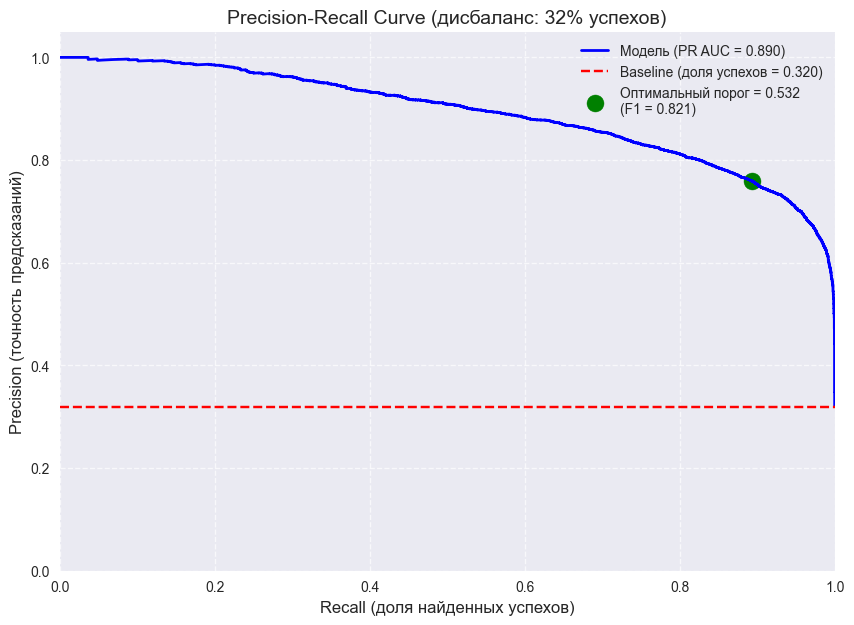

(0.5317275171672846, 0.8902768455581023)

In [138]:
plot_precision_recall_curve(y_test, de_blend_test)

In [155]:
de_blend_test_pred = (de_blend_test > 0.532) * 1
blending_results['Weighted_DE'] = {
    'f1_score_test': f1_score(y_test, de_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, de_blend_test),
    'predictions': de_blend_test_pred,
    'method': 'Differential Evolution optimization'
}

#### Rank Averaging

In [140]:
rank_blend_test = rank_averaging_blend(test_predictions_for_blending)

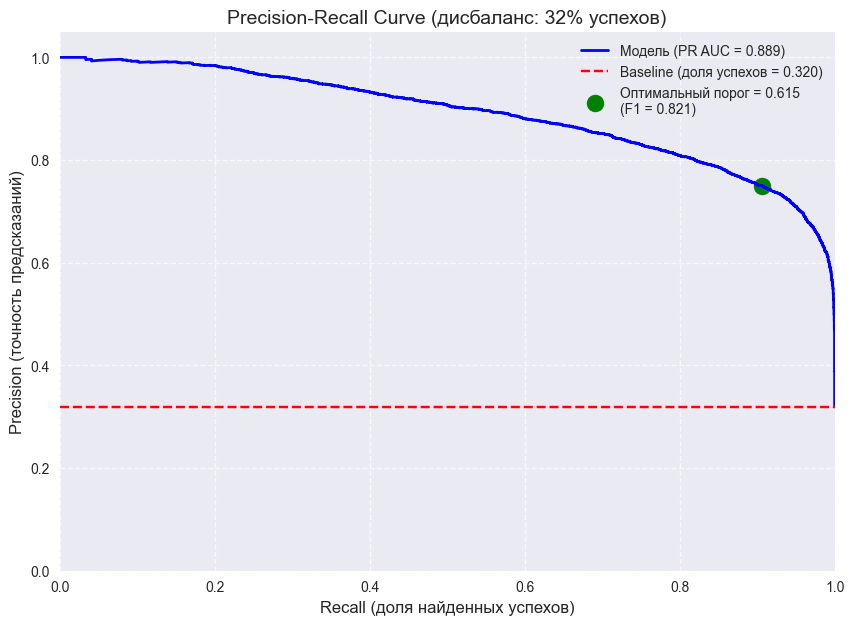

(0.6154157417684054, 0.8889957022339529)

In [141]:
plot_precision_recall_curve(y_test, rank_blend_test)

In [156]:
rank_blend_test_pred = (rank_blend_test > 0.615) * 1
blending_results['Rank_Averaging'] = {
    'f1_score_test': f1_score(y_test, rank_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, rank_blend_test),
    'predictions': rank_blend_test_pred,
    'method': 'Rank-based averaging'
}

#### Power Averaging (—Å—Ç–µ–ø–µ–Ω—å 2)

In [148]:
power_blend_test = power_averaging_blend(test_predictions_for_blending, power=2)

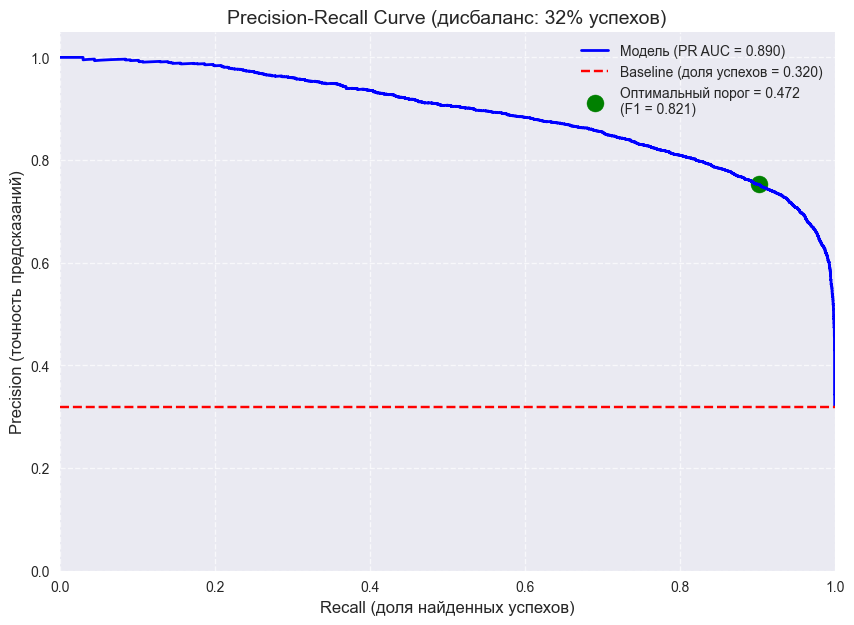

(0.47167163607437274, 0.8895480843468494)

In [149]:
plot_precision_recall_curve(y_test, power_blend_test)

In [157]:
power_blend_test_pred = (power_blend_test > 0.472) * 1
blending_results['Rank_Averaging'] = {
    'f1_score_test': f1_score(y_test, power_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, power_blend_test),
    'predictions': power_blend_test_pred,
    'method': 'Power averaging with p=2'
}

#### –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º

In [158]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π DataFrame
comparison_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(blending_results.keys()),
    'f1_score_test': [blending_results[name]['f1_score_test'] for name in blending_results.keys()],
    'PR_AUC_test': [blending_results[name]['PR_AUC_test'] for name in blending_results.keys()],
    '–û–ø–∏—Å–∞–Ω–∏–µ': [blending_results[name]['method'] for name in blending_results.keys()],
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score
comparison_df = comparison_df.sort_values('f1_score_test', ascending=False).reset_index(drop=True)
comparison_df['–†–∞–Ω–≥'] = range(1, len(comparison_df) + 1)

print("–¢–û–ü-15 –ú–û–î–ï–õ–ï–ô:")
print("=" * 100)
top_15 = comparison_df.head(15)[['–†–∞–Ω–≥', '–ú–æ–¥–µ–ª—å', 'f1_score_test', 'PR_AUC_test', '–û–ø–∏—Å–∞–Ω–∏–µ']].round(4)
print(top_15.to_string(index=False))

–¢–û–ü-15 –ú–û–î–ï–õ–ï–ô:
 –†–∞–Ω–≥             –ú–æ–¥–µ–ª—å  f1_score_test  PR_AUC_test                            –û–ø–∏—Å–∞–Ω–∏–µ
    1        Weighted_DE          0.821        0.890 Differential Evolution optimization
    2   Simple_Averaging          0.821        0.889      Simple averaging of all models
    3 Optimized_Weighted          0.821        0.889         Scipy minimize optimization
    4     Rank_Averaging          0.821        0.889            Power averaging with p=2


**–í—ã–≤–æ–¥—ã:**
- –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, –Ω–∏ stacking, –Ω–∏ blending –Ω–µ –¥–∞–ª –∑–Ω–∞—á–∏–º—ã—Ö —É–ª—É—á—à–µ–Ω–∏–π. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤ —Ç–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö, —á—Ç–æ –µ—Å—Ç—å, –Ω–µ —Ç–æ —á—Ç–æ–±—ã —Å—É–ø–µ—Ä –≥–ª—É–±–æ–∫–∏–µ –∏ –º—ã –∏—Ö —É–∂–µ –≤—ã–∂–∞–ª–∏ –≤ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- –æ—Å—Ç–∞—ë—Ç—Å—è —Ç–æ–ª—å–∫–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ—Å–ª–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≥–ª—É–±–æ–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ —Ç–µ–∫—Å—Ç—É (TF-IDF, –µ–º–±–µ–¥–¥–∏–Ω–≥–∏)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Å–ø–µ—Ö–∞ —Ç–æ–ª—å–∫–æ –ø–æ —Ç–µ–∫—Å—Ç—É –æ–ø–∏—Å–∞–Ω–∏—è –∏ –Ω–∞–∑–≤–∞–Ω–∏—è

–ü–æ–ø—Ä–æ–±—É–µ–º —Ç–µ–ø–µ—Ä—å –Ω–∞–æ–±–æ—Ä–æ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —É—Å–ø–µ—à–Ω–æ—Å—Ç—å –ø—Ä–æ–µ–∫—Ç–∞ —Ç–æ–ª—å–∫–æ –ø–æ —Ç–µ–∫—Å—Ç–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π —ç—Ç–æ —Ñ–∞–∫—Ç–æ—Ä.

In [228]:
X_train_text = X_train[['name', 'desc']]
X_test_text = X_test[['name', 'desc']]

## –ß–µ—Ä–µ–∑ TF-IDF

–í –¥–∞–Ω–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ –æ–±—ä–µ–¥–∏–Ω—è–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∏ —Ç–µ—Å—Ç –≤ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫.

In [301]:
X_train_text = X_train['name'] + " " + X_train['desc']
X_test_text = X_test['name'] + " " + X_test['desc']

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—Å—Ç—ã –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –∫–æ—Ä–æ—Ç–∫–∏–µ.

–Ø –ø—Ä–æ–±–æ–≤–∞–ª —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å –¥–µ–Ω—å–≥–∏, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∞–ª–æ—Å—å —Ö—É–∂–µ.

In [347]:
def preprocess_kickstarter_text(text):
    if not isinstance(text, str) or not text.strip():
        return ""
    
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–∞—Ö, –∫–æ–≥–¥–∞ –∏—Ö –º–Ω–æ–≥–æ (–Ω—É –∏–ª–∏ –ø–æ –∫—Ä–∞–π–Ω–µ–Ω–π –º–µ—Ä–µ –ø—ã—Ç–∞–µ–º—Å—è)
    text = re.sub(r'!{3,}', ' MULTIPLEEXCLAMATION ', text)
    text = re.sub(r'!{2}', ' DOUBLEEXCLAMATION ', text)

    # –£–¥–∞–ª—è–µ–º –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # –£–¥–∞–ª—è–µ–º URL –∏ HTML
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)

    # –ö–∞—Å—Ç–æ–º–Ω—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # –°—Ç–µ–º–º–∏–Ω–≥
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens if len(word) > 1]
    
    return " ".join(tokens)

In [348]:
examples = [
        "This is an AMAZING project!!! Only $5,00 needed. Don't miss out!",
        "Our innovative product will change the world. Be the first backer!",
        "Limited edition available. Early bird special for the first 100 pledgers.",
        "We're not going to accept low quality. Support our vision today!!!"
    ]
preprocess_kickstarter_text(examples[0])

'amaz project multipleexclam 500 need dont miss'

In [349]:
X_train_clean = X_train_text.apply(preprocess_kickstarter_text)
X_test_clean = X_test_text.apply(preprocess_kickstarter_text)

In [350]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.8
)

X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_clean)

### –ú–æ–¥–µ–ª–∏

In [ ]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
models = {
    '–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        class_weight='balanced'
    ),

    '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        class_weight='balanced'
    ),

    '–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å': RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced'
    ),

    '–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å': MultinomialNB(
        class_prior=None,  
        fit_prior=True,
        alpha=0.5
    ),

    'k-NN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),

    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        verbosity=0,
        scale_pos_weight=scale_pos_weight,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbosity=-1,
        force_col_wise=True,
        is_unbalance=True,
        learning_rate=0.05,
        feature_fraction=0.8
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        verbose=False,
        class_weights=class_weights,  
        learning_rate=0.05,
        subsample=0.8,
        max_depth=6
    )
}

In [362]:
results = {}
trained_models = {}

for name, model in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model.fit(X_train_tfidf, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_tfidf, X_test_tfidf)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 0.9 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.530

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.524

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.646

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.528

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.004

***************************************
–û–±—É—á–µ–Ω–∏–µ: –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 7.6 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.337

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.395

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.674

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.340

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.004

***************************************
–û–±—É—á–µ–Ω–∏–µ: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 83

In [363]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
                 –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è          0.530        0.524        0.528     0.646
               CatBoost          0.522        0.519        0.518     0.651
               LightGBM          0.508        0.512        0.503     0.655
                XGBoost          0.454        0.476        0.456     0.662
          –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å          0.398        0.516        0.393     0.703
        –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π          0.337        0.395        0.340     0.674
          –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å          0.298        0.519        0.292     0.704
                   k-NN          0.103        0.363        0.094     0.680

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (0.530)


In [369]:
y_test.describe()

count   21624.000
mean        0.320
std         0.466
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: final_status, dtype: float64

–£–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, –Ω–æ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å–Ω–æ–≤–∞ –æ–∫–∞–∑–∞–ª–∞—Å—å –ª—É—á—à–µ–π.

–ß—Ç–æ –∂ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ —Å–∏–ª—å–Ω–æ –≤–ø–µ—á–∞—Ç–ª—è—é—Ç, –Ω–æ –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ, —á–µ–º —Å–ª—É—á–∞–π–Ω–æ–µ —É–≥–∞–¥—ã–≤–∞–Ω–∏–µ —Å —Ä–∞–≤–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é (–≥–¥–µ-—Ç–æ –Ω–∞ 6%). –ö—Ä–æ–º–µ —Ç–æ–≥–æ Accuracy —É –Ω–∞—Å —Ö—É–∂–µ, —á–µ–º –µ—Å–ª–∏ –±—ã –º—ã –ø—Ä–æ—Å—Ç–æ —É–≥–∞–¥—ã–≤–∞–ª–∏ –ø—Ä–æ–≤–∞–ª (—É—á–∏—Ç—ã–≤–∞—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤), –Ω–æ –ª—É—á—à–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ —É–≥–∞–¥—ã–≤–∞–Ω–∏—è.

–•–æ—Ç—è –∫–æ–Ω–µ—á–Ω–æ –µ—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Å–ª—É—á–∞–π–Ω—ã–º —É–≥–∞–¥—ã–≤–∞–Ω–∏–µ–º (–ø–æ –≤–µ—Å—É –∫–ª–∞—Å—Å–æ–≤), —Ç–æ –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–µ.

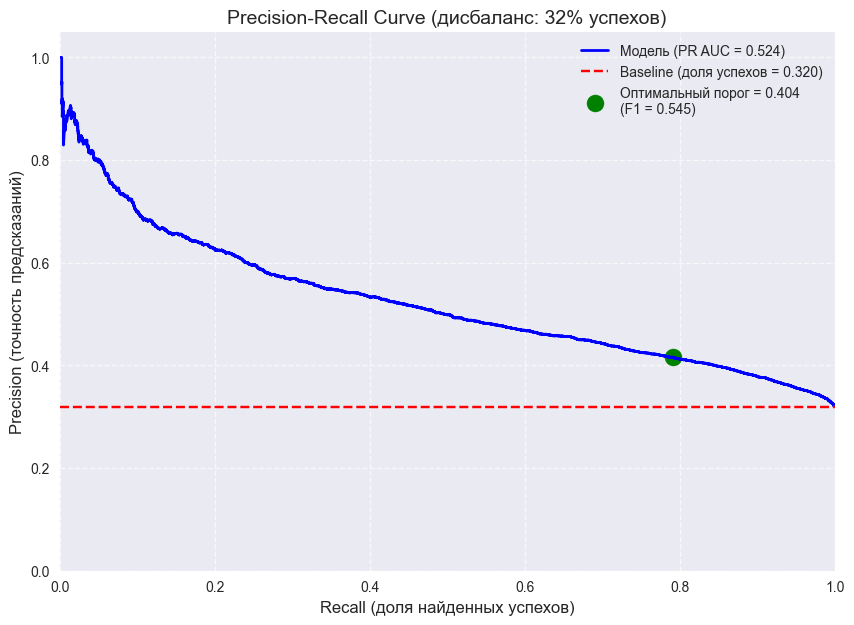

(0.4041108033125507, 0.5241833785143031)

In [371]:
plot_precision_recall_curve(y_test, results['–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è']['probabilities'])

### –ë–ª–µ–Ω–¥–∏–Ω–≥

In [372]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è hold-out validation
X_train_main, X_val, y_train_main, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [374]:
val_predictions = {}
test_predictions_for_blending = {}

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π —á–∞—Å—Ç–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –Ω–∞ validation
for name, info in results.items():
    if name in ['–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å', '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π', '–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å', 'k-NN']:
        continue
    print(f"   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: {name}")

    model = info['model']

    model_clone = type(model)(**model.get_params())
    model_clone.fit(X_train_main, y_train_main)
    val_predictions[name] = model_clone.predict_proba(X_val)[:, 1]
    
    # –î–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –±–µ—Ä—ë–º —É–∂–µ –æ–±—É—á–µ–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –Ω–µ —É—á–∏—Ç—å –¥–≤–∞–∂–¥—ã
    test_predictions_for_blending[name] = model.predict_proba(X_test_tfidf)[:, 1]

   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: XGBoost
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: LightGBM
   –û–±—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏: CatBoost


#### –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –±–ª–µ–Ω–¥–∏–Ω–≥–∞

In [379]:
# 1. Simple Averaging Blending
def simple_averaging_blend(predictions_dict):
    pred_matrix = np.column_stack(list(predictions_dict.values()))
    return np.mean(pred_matrix, axis=1)

# 2. Weighted Blending —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π
def optimize_weights_blend(val_predictions_dict, y_val, method='minimize'):
    model_names = list(val_predictions_dict.keys())
    val_pred_matrix = np.column_stack(list(val_predictions_dict.values()))
    
    def objective_function(weights):
        # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –≤–µ—Å–∞
        weights = weights / weights.sum()
        blended_pred = np.dot(val_pred_matrix, weights)
        return -average_precision_score(y_val, blended_pred)  # –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π PR AUC
    
    if method == 'minimize':
        # Scipy optimize
        from scipy.optimize import minimize
        
        n_models = len(model_names)
        initial_weights = np.ones(n_models) / n_models
        bounds = [(0, 1) for _ in range(n_models)]
        
        # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ: —Å—É–º–º–∞ –≤–µ—Å–æ–≤ = 1
        constraints = ({'type': 'eq', 'fun': lambda w: w.sum() - 1})
        
        result = minimize(objective_function, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)
        
        return result.x, model_names
    
    elif method == 'differential_evolution':
        # Differential Evolution
        from scipy.optimize import differential_evolution
        
        n_models = len(model_names)
        bounds = [(0, 1) for _ in range(n_models)]
        
        def objective_with_normalization(weights):
            weights = weights / weights.sum()  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤–Ω—É—Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏
            blended_pred = np.dot(val_pred_matrix, weights)
            return -average_precision_score(y_val, blended_pred)
        
        result = differential_evolution(objective_with_normalization, bounds, seed=42)
        optimal_weights = result.x / result.x.sum()  # –§–∏–Ω–∞–ª—å–Ω–∞—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
        
        return optimal_weights, model_names

# 3. Rank Blending
def rank_averaging_blend(predictions_dict, weights=None):
    model_names = list(predictions_dict.keys())
    n_samples = len(list(predictions_dict.values())[0])
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ä–∞–Ω–≥–∏
    rank_matrix = np.zeros((n_samples, len(model_names)))
    
    for i, (name, pred) in enumerate(predictions_dict.items()):
        rank_matrix[:, i] = rankdata(pred) / len(pred)  # –ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ —Ä–∞–Ω–≥–∏
    
    # –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ —Ä–∞–Ω–≥–æ–≤
    if weights is None:
        weights = np.ones(len(model_names)) / len(model_names)
    
    blended_ranks = np.dot(rank_matrix, weights)
    return blended_ranks

# 4. Power Averaging
def power_averaging_blend(predictions_dict, power=1.0, weights=None):
    pred_matrix = np.column_stack(list(predictions_dict.values()))
    
    if weights is None:
        weights = np.ones(pred_matrix.shape[1]) / pred_matrix.shape[1]
    
    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–µ–ø–µ–Ω—å
    powered_preds = np.power(pred_matrix, power)
    
    # –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ
    blended = np.dot(powered_preds, weights)
    
    # –û–±—Ä–∞—Ç–Ω–∞—è —Å—Ç–µ–ø–µ–Ω—å
    if power != 0:
        blended = np.power(blended, 1.0/power)
    
    return blended

In [376]:
def compute_optimal_threshhold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # +1e-10 –∏–∑–±–µ–≥–∞–µ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 0
    max_f1_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[max_f1_idx] if max_f1_idx < len(thresholds) else 1.0
    return optimal_threshold

In [377]:
blending_results = {}

#### Simple Averaging

In [ ]:
simple_blend_test = simple_averaging_blend(test_predictions_for_blending)
opt_thr = compute_optimal_threshhold(y_test, simple_blend_test)
simple_blend_test_pred = (simple_blend_test > opt_thr) * 1
blending_results['Simple_Averaging'] = {
    'f1_score_test': f1_score(y_test, simple_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, simple_blend_test),
    'predictions': simple_blend_test,
    'method': 'Simple averaging of all models'
}

#### Optimized Weighted Blending (Scipy minimize)

In [380]:
optimal_weights_scipy, model_names = optimize_weights_blend(val_predictions, y_val, method='minimize')

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –∫ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
test_pred_matrix = np.column_stack([test_predictions_for_blending[name] for name in model_names])
weighted_blend_test = np.dot(test_pred_matrix, optimal_weights_scipy)

opt_thr = compute_optimal_threshhold(y_test, weighted_blend_test)

weighted_blend_test_pred = (weighted_blend_test > opt_thr) * 1
blending_results['Optimized_Weighted'] = {
    'f1_score_test': f1_score(y_test, weighted_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, weighted_blend_test),
    'predictions': weighted_blend_test_pred,
    'method': 'Scipy minimize optimization'
}

#### Differential Evolution Blending

In [381]:
optimal_weights_de, model_names_de = optimize_weights_blend(val_predictions, y_val, method='differential_evolution')

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –∫ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
test_pred_matrix_de = np.column_stack([test_predictions_for_blending[name] for name in model_names_de])
de_blend_test = np.dot(test_pred_matrix_de, optimal_weights_de)

opt_thr = compute_optimal_threshhold(y_test, de_blend_test)

de_blend_test_pred = (de_blend_test > opt_thr) * 1
blending_results['Weighted_DE'] = {
    'f1_score_test': f1_score(y_test, de_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, de_blend_test),
    'predictions': de_blend_test_pred,
    'method': 'Differential Evolution optimization'
}

#### Rank Averaging

In [382]:
rank_blend_test = rank_averaging_blend(test_predictions_for_blending)

opt_thr = compute_optimal_threshhold(y_test, rank_blend_test)

rank_blend_test_pred = (rank_blend_test > opt_thr) * 1
blending_results['Rank_Averaging'] = {
    'f1_score_test': f1_score(y_test, rank_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, rank_blend_test),
    'predictions': rank_blend_test_pred,
    'method': 'Rank-based averaging'
}

#### Power Averaging (—Å—Ç–µ–ø–µ–Ω—å 2)

In [383]:
power_blend_test = power_averaging_blend(test_predictions_for_blending, power=2)

opt_thr = compute_optimal_threshhold(y_test, power_blend_test)

power_blend_test_pred = (power_blend_test > opt_thr) * 1
blending_results['Rank_Averaging'] = {
    'f1_score_test': f1_score(y_test, power_blend_test_pred),
    'PR_AUC_test': average_precision_score(y_test, power_blend_test),
    'predictions': power_blend_test_pred,
    'method': 'Power averaging with p=2'
}

#### –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º

In [384]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π DataFrame
comparison_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(blending_results.keys()),
    'f1_score_test': [blending_results[name]['f1_score_test'] for name in blending_results.keys()],
    'PR_AUC_test': [blending_results[name]['PR_AUC_test'] for name in blending_results.keys()],
    '–û–ø–∏—Å–∞–Ω–∏–µ': [blending_results[name]['method'] for name in blending_results.keys()],
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score
comparison_df = comparison_df.sort_values('f1_score_test', ascending=False).reset_index(drop=True)
comparison_df['–†–∞–Ω–≥'] = range(1, len(comparison_df) + 1)

print("–¢–û–ü-15 –ú–û–î–ï–õ–ï–ô:")
print("=" * 100)
top_15 = comparison_df.head(15)[['–†–∞–Ω–≥', '–ú–æ–¥–µ–ª—å', 'f1_score_test', 'PR_AUC_test', '–û–ø–∏—Å–∞–Ω–∏–µ']].round(4)
print(top_15.to_string(index=False))

–¢–û–ü-15 –ú–û–î–ï–õ–ï–ô:
 –†–∞–Ω–≥             –ú–æ–¥–µ–ª—å  f1_score_test  PR_AUC_test                            –û–ø–∏—Å–∞–Ω–∏–µ
    1        Weighted_DE          0.549        0.531 Differential Evolution optimization
    2     Rank_Averaging          0.548        0.528            Power averaging with p=2
    3   Simple_Averaging          0.548        0.527      Simple averaging of all models
    4 Optimized_Weighted          0.548        0.527         Scipy minimize optimization


–ü–æ–ª—É—á–∏–ª–æ—Å—å –Ω–µ–º–Ω–æ–≥–æ —É–ª—É—á—à–∏—Ç—å. –¢–µ–ø–µ—Ä—å –º—ã –ª—É—á—à–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (—Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.5) –ø–æ f1-score –≥–¥–µ-—Ç–æ –Ω–∞ 10%.

## Embedding –º–æ–¥–µ–ª–∏

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

–î–ª—è Embedding –º–æ–¥–µ–ª–µ–π –ø–æ—Å—Ç–∞—Ä–∞–µ–º—Å—è –Ω–µ —É–±–∏—Ä–∞—Ç—å –¥–æ–ø —Å–∏–≥–Ω–∞–ª—ã –∏–∑ —Ç–µ–∫—Å—Ç–∞, —Ç–æ –µ—Å—Ç—å –º–∏–Ω–∏–º—É–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏

In [385]:
def preprocess_text_for_embeddings(text):
    if not isinstance(text, str) or not text.strip():
        return ""
    
    # –£–¥–∞–ª—è–µ–º URL –∏ HTML
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)

    # –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –ø—Ä–æ–±–µ–ª—ã
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [386]:
X_train_clean = X_train_text.apply(preprocess_text_for_embeddings)
X_test_clean = X_test_text.apply(preprocess_text_for_embeddings)

### Word2Vec

#### –û–±—É—á–∞–µ–º

In [389]:
# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è
tokenized_texts = [nltk.word_tokenize(text.lower()) for text in X_train_clean]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=100,     
    window=5,            
    min_count=5,         
    workers=4,
)

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {len(w2v_model.wv.index_to_key)}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: 20047


#### –ö–æ–¥–∏—Ä—É–µ–º

In [ ]:
def get_average_embedding(text, model, vector_size=100):
    words = nltk.word_tokenize(text.lower())
    word_embeddings = [model.wv[word] for word in words if word in model.wv]
    
    if len(word_embeddings) == 0:
        return np.zeros(vector_size)
    
    return np.mean(word_embeddings, axis=0)

In [ ]:
X_train_w2v = np.array([get_average_embedding(text, w2v_model) for text in X_train_clean])
X_test_w2v = np.array([get_average_embedding(text, w2v_model) for text in X_test_clean])

In [392]:
print(f"–§–æ—Ä–º–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤: {X_train_w2v.shape}")

–§–æ—Ä–º–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤: (86495, 100)


#### –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏

In [395]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
models = {
    '–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        class_weight='balanced'
    ),

    '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        class_weight='balanced'
    ),

    '–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å': RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced'
    ),

    'k-NN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),

    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        verbosity=0,
        scale_pos_weight=scale_pos_weight,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbosity=-1,
        force_col_wise=True,
        is_unbalance=True,
        learning_rate=0.05,
        feature_fraction=0.8
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        verbose=False,
        class_weights=class_weights,  
        learning_rate=0.05,
        subsample=0.8,
        max_depth=6
    )
}

In [396]:
results = {}
trained_models = {}

for name, model in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model.fit(X_train_w2v, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_w2v, X_test_w2v)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 15.9 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.505

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.437

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.588

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.500

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.004

***************************************
–û–±—É—á–µ–Ω–∏–µ: –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 50.1 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.471

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.389

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.548

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.461

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.001

***************************************
–û–±—É—á–µ–Ω–∏–µ: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 

In [397]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
                 –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy
               CatBoost          0.512        0.485        0.507     0.625
                XGBoost          0.509        0.472        0.503     0.602
               LightGBM          0.506        0.470        0.506     0.599
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è          0.505        0.437        0.500     0.588
        –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π          0.471        0.389        0.461     0.548
                   k-NN          0.370        0.406        0.362     0.643
          –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å          0.154        0.460        0.147     0.689

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: CatBoost (0.512)


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ö—É–∂–µ, —Ç–∞–∫ —á—Ç–æ –±–ª–µ–Ω–¥–∏–Ω–≥ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º

### SBERT

–ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª–∏ –¥–ª—è –∑–∞–¥–∞—á–∏ –Ω—É–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∫–∞–∫–æ–º-–Ω–∏–±—É–¥—å MTEB, –±—Ä–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏ —Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫–∞—è –ª—É—á—à–µ. –ù–æ –∑–∞ —ç–∫–æ–Ω–æ–º–∏–µ–π –≤—Ä–µ–º–µ–Ω–∏ –∏ —Ä–µ—Å—Ä—Å–æ–≤ –¥–ª—è pet-–ø—Ä–æ–µ–∫—Ç–∞ –æ–±–æ–π–¥—ë–º—Å—è –ø—Ä–æ—Å—Ç–æ–π –º–æ–¥–µ–ª—å—é.

–í–∑—è–ª SBERT —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø—Ä–æ—Å—Ç–æ–π –∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–∞–ª–µ–Ω—å–∫–∏–π –¥–ª—è –º–æ–µ–≥–æ —Å–ª–∞–±–æ–≥–æ –∫–æ–º–ø–∞.

#### –ö–æ–¥–∏—Ä—É–µ–º

–î–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –±—É–¥–µ–º –æ–±—ä–µ–¥–µ–Ω—è—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è –Ω–∞–∑–≤–∞–Ω–∏—è –∏ –æ–ø–∏—Å–∞–Ω–∏—è —á–µ—Ä–µ–∑ —Å—É–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ. –£ –Ω–∞–∑–≤–∞–Ω–∏—è –≤–µ—Å –±—É–¥–µ—Ç –±–æ–ª—å—à–µ, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–æ —Å–∞–º–æ–µ –≥–ª–∞–≤–Ω–æ–µ.

In [166]:
def get_embeddings(titles, descriptions):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    title_embeddings = model.encode(titles.tolist(), show_progress_bar=True)
    desc_embeddings = model.encode(descriptions.tolist(), show_progress_bar=True)
    
    return title_embeddings, desc_embeddings

title_embeddings_train, desc_embeddings_train = get_embeddings(X_train['name'], X_train['desc'])
title_embeddings_test, desc_embeddings_test = get_embeddings(X_test['name'], X_test['desc'])

Batches:   0%|          | 0/2703 [00:00<?, ?it/s]

Batches:   0%|          | 0/2703 [00:00<?, ?it/s]

Batches:   0%|          | 0/676 [00:00<?, ?it/s]

Batches:   0%|          | 0/676 [00:00<?, ?it/s]

–°—É–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –≤–µ—Å–æ–º

In [415]:
X_train_sbert = 0.65 * title_embeddings_train + 0.35 * desc_embeddings_train
X_test_sbert = 0.65 * title_embeddings_test + 0.35 * desc_embeddings_test

–ö–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—è

In [167]:
X_train_sbert = np.hstack([title_embeddings_train, desc_embeddings_train])
X_test_sbert = np.hstack([title_embeddings_test, desc_embeddings_test])

#### –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ (—Å—É–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ)

In [411]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
models = {
    '–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        class_weight='balanced'
    ),

    '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        class_weight='balanced'
    ),

    '–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å': RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced'
    ),

    'k-NN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),

    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        verbosity=0,
        scale_pos_weight=scale_pos_weight,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbosity=-1,
        force_col_wise=True,
        is_unbalance=True,
        learning_rate=0.05,
        feature_fraction=0.8
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        verbose=False,
        class_weights=class_weights,  
        learning_rate=0.05,
        subsample=0.8,
        max_depth=6
    )
}

In [412]:
results = {}
trained_models = {}

for name, model in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model.fit(X_train_sbert, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_sbert, X_test_sbert)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 5.7 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.502

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.462

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.604

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.506

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.004

***************************************
–û–±—É—á–µ–Ω–∏–µ: –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 202.0 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.431

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.362

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.537

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.426

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.005

***************************************
–û–±—É—á–µ–Ω–∏–µ: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 

In [413]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
                 –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy
               CatBoost          0.507        0.487        0.499     0.633
               LightGBM          0.503        0.469        0.493     0.614
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è          0.502        0.462        0.506     0.604
                XGBoost          0.495        0.468        0.487     0.615
        –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π          0.431        0.362        0.426     0.537
                   k-NN          0.351        0.434        0.346     0.668
          –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å          0.048        0.429        0.039     0.683

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: CatBoost (0.507)


#### –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ (–∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ)

–£–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, —Ç–∞–∫ –∫–∞–∫ –±—É—Å—Ç–∏–Ω–≥–∏ –ø–æ —Å—É—Ç–∏ –∏ —Ç–∞–∫ –µ–≥–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç, –∞ —Å–∞–º –ø–æ —Å–µ–±–µ –æ–Ω –¥–æ–ª–≥–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è –∏ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è.

In [426]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
models = {
    '–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        class_weight='balanced'
    ),

    '–î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        class_weight='balanced'
    ),

    'k-NN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),

    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        verbosity=0,
        scale_pos_weight=scale_pos_weight,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbosity=-1,
        force_col_wise=True,
        is_unbalance=True,
        learning_rate=0.05,
        feature_fraction=0.8
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        verbose=False,
        class_weights=class_weights,  
        learning_rate=0.05,
        subsample=0.8,
        max_depth=6
    )
}

In [427]:
results = {}
trained_models = {}

for name, model in models.items():
    print('***************************************')
    print(f"–û–±—É—á–µ–Ω–∏–µ: {name}")
    print('---------------------------------------')

    start = time.time()
    
    model.fit(X_train_sbert, y_train)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    results[name] = process_result(model, X_train_sbert, X_test_sbert)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
    trained_models[name] = model

    print(f'–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: {(time.time() - start):.1f} —Å–µ–∫')
    print()
    
    print_results(results[name])

***************************************
–û–±—É—á–µ–Ω–∏–µ: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 15.7 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.519

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.480

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.620

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.519

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.004

***************************************
–û–±—É—á–µ–Ω–∏–µ: –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 399.8 —Å–µ–∫

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.456

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.363

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.531

–°—Ä–µ–¥–Ω–∏–π f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.448

–î–∏—Å–ø–µ—Ä—Å–∏—è f1-score –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.007

***************************************
–û–±—É—á–µ–Ω–∏–µ: k-NN
---------------------------------------
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ: 75.7 —Å–µ–∫

–¢–µ—Å—

In [428]:
# –°–æ–∑–¥–∞–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': list(results.keys()),
    'f1-score test': [results[name]['f1_test'] for name in results.keys()],
    'PR AUC test': [results[name]['PR_AUC_test'] for name in results.keys()],
    'CV f1-score': [results[name]['f1_cv_mean'] for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ f1-score –Ω–∞ —Ç–µ—Å—Ç–µ
results_df = results_df.sort_values('f1-score test', ascending=False).reset_index(drop=True)

print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô")
print("=" * 128)
print(results_df.to_string(index=False, float_format='%.3f'))

print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: {results_df.iloc[0]['–ú–æ–¥–µ–ª—å']} ({results_df.iloc[0]['f1-score test']:.3f})")

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô
                 –ú–æ–¥–µ–ª—å  f1-score test  PR AUC test  CV f1-score  Accuracy
               CatBoost          0.520        0.497        0.509     0.641
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è          0.519        0.480        0.519     0.620
               LightGBM          0.514        0.472        0.506     0.617
                XGBoost          0.509        0.473        0.499     0.619
        –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π          0.456        0.363        0.448     0.531
                   k-NN          0.399        0.455        0.383     0.675

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ f1-score test: CatBoost (0.520)


–ù–∞ —É–¥–∏–≤–ª–µ–Ω–∏–µ –≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤—Å—ë –µ—â—ë —Ö—É–∂–µ, —á–µ–º TF-IDF. –í–æ–∑–º–æ–∂–Ω–æ –¥–æ–ø–ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –ø–µ—Ä–µ–¥ TF-IDF —Å–¥–µ–ª–∞–ª–∞ —Å–≤–æ—ë –≥—Ä—è–∑–Ω–æ–µ –¥–µ–ª–æ.

### –û–±—É—á–µ–Ω–∏–µ "–≥–æ–ª–æ–≤—ã"

–ü–æ–ø—Ä–æ–±—É–µ–º –¥–æ–æ–±—É—á–∏—Ç—å –≥–æ–ª–æ–≤—É –Ω–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞—Ö SBERT. –í –∏–¥–µ–∞–ª–µ –Ω—É–∂–Ω–æ –¥–æ–æ–±—É—á–∏—Ç—å –≤–µ—Å—å SBERT, –Ω–æ –∑–∞ —ç–∫–æ–Ω–æ–º–∏–µ–π —Ä–µ—Å—É—Ä—Å–æ–≤ —Å–¥–µ–ª–∞–µ–º –ø–æ–∫–∞ —Ç–∞–∫.

In [168]:
X_train_sbert = np.hstack([title_embeddings_train, desc_embeddings_train])
X_test_sbert = np.hstack([title_embeddings_test, desc_embeddings_test])

In [169]:
X_train_sbert.shape

(86495, 768)

#### –°—Ç—Ä–æ–∏–º —Å–µ—Ç–∫—É

–î–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å–¥–µ–ª–∞–ª –Ω–∞—Å—Ç—Ä–æ–π–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

In [224]:
class KickstarterMLP(nn.Module):
    def __init__(self, 
                input_size,
                hidden_sizes=[256, 128, 64],
                dropout_rate=0.25,   
                use_batch_norm=True,
                class_weights=None,  
                activation='leaky_relu'):
        
        super(KickstarterMLP, self).__init__()
        
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.use_batch_norm = use_batch_norm
        self.class_weights = class_weights
        self.activation = activation
        self.dropout_rate = dropout_rate
        
        layers = []
        prev_size = input_size
        
        # –°–æ–∑–¥–∞–µ–º —Å–ª–æ–∏
        for i, hidden_size in enumerate(hidden_sizes):
            # –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π
            linear = nn.Linear(prev_size, hidden_size)
            kaiming_normal_(linear.weight, nonlinearity=activation)
            constant_(linear.bias, 0)
            layers.append(linear)
            
            #BatchNorm
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_size))
            
            # –ê–∫—Ç–∏–≤–∞—Ü–∏—è 
            if activation == 'leaky_relu':
                layers.append(nn.LeakyReLU(negative_slope=0.01))
            elif activation == 'elu':
                layers.append(nn.ELU())
            elif activation == 'mish':
                layers.append(nn.Mish())
            else:
                layers.append(nn.ReLU())
            
            # Dropout
            layers.append(nn.Dropout(dropout_rate))
            
            prev_size = hidden_size
        
        # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–±–µ–∑ —Å–∏–≥–º–æ–∏–¥—ã - –∏—Å–ø–æ–ª—å–∑—É–µ–º BCEWithLogitsLoss)
        self.output_layer = nn.Linear(prev_size, 1)
        kaiming_normal_(self.output_layer.weight, nonlinearity='leaky_relu')
        constant_(self.output_layer.bias, 0)
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤—Å–µ —Å–ª–æ–∏
        self.network = nn.Sequential(*layers)
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ª–æ–≥–≥–∏—Ä–æ–≤–∞–Ω–∏—è
        self.params = {
            'input_size': input_size,
            'hidden_sizes': hidden_sizes,
            'dropout_rate': dropout_rate,
            'use_batch_norm': use_batch_norm,
            'activation': activation,
        }


    def forward(self, x):
        x = self.network(x)
        x = self.output_layer(x)
        return x

#### –ü–µ—Ä–µ–≤–æ–¥–∏–º –¥–∞–Ω–Ω—ã–µ –≤ –Ω—É–∂–Ω—ã–π –≤–∏–¥

In [225]:
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train_sbert, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [226]:
# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤ 
class_weights = {
    0: 1.0,
    1: (len(y_train) - sum(y_train)) / sum(y_train)
}
print(f"–í–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤: {class_weights}")

–í–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤: {0: 1.0, 1: 2.128322904987522}


In [227]:
X_train_tensor = torch.FloatTensor(X_train_)
y_train_tensor = torch.FloatTensor(y_train_.values).reshape(-1, 1)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_sbert)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [228]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#### –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (–≤—ã–Ω–µ—Å –æ—Ç–¥–µ–ª—å–Ω–æ, —á—Ç–æ–±—ã –Ω–µ –∑–∞—Å–æ—Ä—è—Ç—å)

In [229]:
def setup_training(model, class_weights, lr=5e-4, weight_decay=1e-5):

    pos_weight = torch.tensor([class_weights[1]])
    criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
    # weight decay –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    optimizer = optim.Adam(
        model.parameters(),
        lr=lr,
        weight_decay=weight_decay  # L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    )
    
    # scheduler
    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='max',          
        factor=0.5,          
        patience=3,
        min_lr=1e-6          
    )
    
    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    early_stopping = {
        'patience': 8,      
        'min_delta': 0.001, 
        'best_score': None,
        'epochs_no_improve': 0,
        'stop': False
    }
    
    return criterion, optimizer, scheduler, early_stopping

In [267]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model = KickstarterMLP(
    input_size=X_train_.shape[1],
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è
criterion, optimizer, scheduler, early_stopping = setup_training(
    model, 
    class_weights,
    lr=5e-5, # –æ—Å—Ç–∞–≤–∏–ª —Ç–∞–∫–æ–π –ø–æ—Å–ª–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∑–∞–ø—É–∫–æ–≤
    weight_decay=1e-5
)

#### –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

train –¥–ª—è —ç–ø–æ—Ö–∏

In [268]:
def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    for embeddings, labels in tqdm(dataloader, desc="Training", leave=False):
        
        optimizer.zero_grad()

        outputs = model(embeddings)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        probs = torch.sigmoid(outputs)
        preds = probs >= 0.5
        all_probs.extend(probs.cpu().detach().numpy())
        all_preds.extend(preds.cpu().detach().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    # –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    avg_loss = total_loss / len(dataloader)
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    PR_auc = average_precision_score(all_labels, all_probs)
    
    return avg_loss, f1, precision, recall, PR_auc

–í–∞–ª–∏–¥–∞—Ü–∏—è –∑–∞ —ç–ø–æ—Ö—É

In [269]:
def validate_epoch(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for embeddings, labels in dataloader:
            
            outputs = model(embeddings)
            
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            probs = torch.sigmoid(outputs)
            preds = probs >= 0.5
            
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    avg_loss = total_loss / len(dataloader)
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    PR_auc = average_precision_score(all_labels, all_probs)
    
    return avg_loss, f1, precision, recall, PR_auc, all_probs, all_labels

–ü–æ–ª–Ω—ã–π —Ü–∏–∫–ª

–í —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–µ —Å—Ç–∞—Ä–∞–µ–º—Å—è –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å PR AUC - –ø—Ä–æ–≥–æ–Ω—ã –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ —ç—Ç–æ –¥–∞—ë—Ç –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [270]:
def train_model(model, train_loader, val_loader, criterion, 
                optimizer, scheduler, early_stopping, epochs=50):
    
    # –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
    train_losses = []
    val_losses = []
    train_f1s = []
    val_f1s = []
    train_precisions = []
    val_precisions = []
    train_recalls = []
    val_recalls = []
    train_pr_aucs = []
    val_pr_aucs = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        print(f"\n–≠–ø–æ—Ö–∞ {epoch+1}/{epochs}")
        
        # –û–±—É—á–µ–Ω–∏–µ
        train_loss, train_f1, train_precision, train_recall, train_pr_auc = train_epoch(
            model, train_loader, criterion, optimizer
        )
        
        # –í–∞–ª–∏–¥–∞—Ü–∏—è
        val_loss, val_f1, val_precision, val_recall, val_pr_auc, _, _ = validate_epoch(
            model, val_loader, criterion
        )
        
        # –û–±–Ω–æ–≤–ª—è–µ–º LR scheduler
        scheduler.step(val_pr_auc)
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        train_pr_aucs.append(train_pr_auc)
        val_pr_aucs.append(val_pr_auc)
        
        # –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
        print(f"  Train Loss: {train_loss:.4f} | F1: {train_f1:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | PR AUC: {train_pr_auc:.4f}")
        print(f"  Val Loss: {val_loss:.4f} | F1: {val_f1:.4f} | Precision: {val_precision:.4f} | Recall: {val_recall:.4f} | PR AUC: {val_pr_auc:.4f}")
        
        # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
        current_score = val_pr_auc
        
        if early_stopping['best_score'] is None:
            early_stopping['best_score'] = current_score
        elif current_score < early_stopping['best_score'] + early_stopping['min_delta']:
            early_stopping['epochs_no_improve'] += 1
            if early_stopping['epochs_no_improve'] >= early_stopping['patience']:
                early_stopping['stop'] = True
                print(f"\n–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞ —ç–ø–æ—Ö–µ {epoch+1}")
                break
        else:
            early_stopping['best_score'] = current_score
            early_stopping['epochs_no_improve'] = 0
    
    total_time = time.time() - start_time
    print(f"\n–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∑–∞ {total_time:.2f} —Å–µ–∫—É–Ω–¥")
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_f1s': train_f1s,
        'val_f1s': val_f1s,
        'train_precisions': train_precisions,
        'val_precisions': val_precisions,
        'train_recalls': train_recalls,
        'val_recalls': val_recalls,
        'train_pr_aucs': train_pr_aucs,
        'val_pr_aucs': val_pr_aucs
    }

#### –û–±—É—á–µ–Ω–∏–µ

In [271]:
metrics = train_model(
    model, train_loader, val_loader, criterion, 
    optimizer, scheduler, early_stopping
)


–≠–ø–æ—Ö–∞ 1/50


  Train Loss: 1.1102 | F1: 0.4669 | Precision: 0.3296 | Recall: 0.8001 | PR AUC: 0.3364
  Val Loss: 0.9259 | F1: 0.4896 | Precision: 0.3682 | Recall: 0.7306 | PR AUC: 0.3998

–≠–ø–æ—Ö–∞ 2/50


  Train Loss: 0.9804 | F1: 0.4567 | Precision: 0.3616 | Recall: 0.6196 | PR AUC: 0.3748
  Val Loss: 0.9023 | F1: 0.4872 | Precision: 0.3995 | Recall: 0.6244 | PR AUC: 0.4265

–≠–ø–æ—Ö–∞ 3/50


  Train Loss: 0.9509 | F1: 0.4619 | Precision: 0.3795 | Recall: 0.5900 | PR AUC: 0.3976
  Val Loss: 0.8936 | F1: 0.4924 | Precision: 0.4182 | Recall: 0.5986 | PR AUC: 0.4407

–≠–ø–æ—Ö–∞ 4/50


  Train Loss: 0.9334 | F1: 0.4750 | Precision: 0.3925 | Recall: 0.6014 | PR AUC: 0.4132
  Val Loss: 0.8852 | F1: 0.5061 | Precision: 0.4159 | Recall: 0.6463 | PR AUC: 0.4572

–≠–ø–æ—Ö–∞ 5/50


  Train Loss: 0.9190 | F1: 0.4867 | Precision: 0.4008 | Recall: 0.6195 | PR AUC: 0.4275
  Val Loss: 0.8809 | F1: 0.5084 | Precision: 0.4260 | Recall: 0.6302 | PR AUC: 0.4660

–≠–ø–æ—Ö–∞ 6/50


  Train Loss: 0.9043 | F1: 0.4957 | Precision: 0.4105 | Recall: 0.6256 | PR AUC: 0.4440
  Val Loss: 0.8765 | F1: 0.5150 | Precision: 0.4265 | Recall: 0.6499 | PR AUC: 0.4736

–≠–ø–æ—Ö–∞ 7/50


  Train Loss: 0.8954 | F1: 0.5042 | Precision: 0.4173 | Recall: 0.6367 | PR AUC: 0.4583
  Val Loss: 0.8738 | F1: 0.5203 | Precision: 0.4235 | Recall: 0.6743 | PR AUC: 0.4786

–≠–ø–æ—Ö–∞ 8/50


  Train Loss: 0.8873 | F1: 0.5115 | Precision: 0.4215 | Recall: 0.6503 | PR AUC: 0.4658
  Val Loss: 0.8722 | F1: 0.5165 | Precision: 0.4339 | Recall: 0.6380 | PR AUC: 0.4835

–≠–ø–æ—Ö–∞ 9/50


  Train Loss: 0.8792 | F1: 0.5182 | Precision: 0.4281 | Recall: 0.6563 | PR AUC: 0.4746
  Val Loss: 0.8706 | F1: 0.5196 | Precision: 0.4345 | Recall: 0.6459 | PR AUC: 0.4857

–≠–ø–æ—Ö–∞ 10/50


  Train Loss: 0.8735 | F1: 0.5227 | Precision: 0.4320 | Recall: 0.6617 | PR AUC: 0.4838
  Val Loss: 0.8718 | F1: 0.5148 | Precision: 0.4461 | Recall: 0.6087 | PR AUC: 0.4880

–≠–ø–æ—Ö–∞ 11/50


  Train Loss: 0.8671 | F1: 0.5282 | Precision: 0.4370 | Recall: 0.6675 | PR AUC: 0.4898
  Val Loss: 0.8672 | F1: 0.5236 | Precision: 0.4381 | Recall: 0.6506 | PR AUC: 0.4910

–≠–ø–æ—Ö–∞ 12/50


  Train Loss: 0.8625 | F1: 0.5342 | Precision: 0.4427 | Recall: 0.6733 | PR AUC: 0.4963
  Val Loss: 0.8664 | F1: 0.5282 | Precision: 0.4415 | Recall: 0.6573 | PR AUC: 0.4934

–≠–ø–æ—Ö–∞ 13/50


  Train Loss: 0.8564 | F1: 0.5359 | Precision: 0.4447 | Recall: 0.6742 | PR AUC: 0.5074
  Val Loss: 0.8647 | F1: 0.5288 | Precision: 0.4422 | Recall: 0.6575 | PR AUC: 0.4958

–≠–ø–æ—Ö–∞ 14/50


  Train Loss: 0.8516 | F1: 0.5403 | Precision: 0.4489 | Recall: 0.6782 | PR AUC: 0.5124
  Val Loss: 0.8628 | F1: 0.5319 | Precision: 0.4314 | Recall: 0.6935 | PR AUC: 0.4979

–≠–ø–æ—Ö–∞ 15/50


  Train Loss: 0.8454 | F1: 0.5461 | Precision: 0.4544 | Recall: 0.6839 | PR AUC: 0.5198
  Val Loss: 0.8620 | F1: 0.5347 | Precision: 0.4370 | Recall: 0.6886 | PR AUC: 0.4987

–≠–ø–æ—Ö–∞ 16/50


  Train Loss: 0.8418 | F1: 0.5491 | Precision: 0.4555 | Recall: 0.6912 | PR AUC: 0.5237
  Val Loss: 0.8635 | F1: 0.5288 | Precision: 0.4488 | Recall: 0.6434 | PR AUC: 0.4998

–≠–ø–æ—Ö–∞ 17/50


  Train Loss: 0.8361 | F1: 0.5522 | Precision: 0.4599 | Recall: 0.6911 | PR AUC: 0.5288
  Val Loss: 0.8617 | F1: 0.5345 | Precision: 0.4438 | Recall: 0.6718 | PR AUC: 0.5008

–≠–ø–æ—Ö–∞ 18/50


  Train Loss: 0.8302 | F1: 0.5552 | Precision: 0.4632 | Recall: 0.6928 | PR AUC: 0.5352
  Val Loss: 0.8625 | F1: 0.5329 | Precision: 0.4477 | Recall: 0.6582 | PR AUC: 0.5018

–≠–ø–æ—Ö–∞ 19/50


  Train Loss: 0.8262 | F1: 0.5596 | Precision: 0.4683 | Recall: 0.6952 | PR AUC: 0.5435
  Val Loss: 0.8634 | F1: 0.5325 | Precision: 0.4481 | Recall: 0.6561 | PR AUC: 0.5028

–≠–ø–æ—Ö–∞ 20/50


  Train Loss: 0.8212 | F1: 0.5653 | Precision: 0.4719 | Recall: 0.7047 | PR AUC: 0.5489
  Val Loss: 0.8620 | F1: 0.5335 | Precision: 0.4479 | Recall: 0.6595 | PR AUC: 0.5047

–≠–ø–æ—Ö–∞ 21/50


  Train Loss: 0.8183 | F1: 0.5707 | Precision: 0.4761 | Recall: 0.7121 | PR AUC: 0.5503
  Val Loss: 0.8625 | F1: 0.5334 | Precision: 0.4467 | Recall: 0.6618 | PR AUC: 0.5061

–≠–ø–æ—Ö–∞ 22/50


  Train Loss: 0.8132 | F1: 0.5703 | Precision: 0.4761 | Recall: 0.7110 | PR AUC: 0.5594
  Val Loss: 0.8632 | F1: 0.5371 | Precision: 0.4480 | Recall: 0.6705 | PR AUC: 0.5054

–≠–ø–æ—Ö–∞ 23/50


  Train Loss: 0.8102 | F1: 0.5744 | Precision: 0.4804 | Recall: 0.7140 | PR AUC: 0.5610
  Val Loss: 0.8620 | F1: 0.5351 | Precision: 0.4409 | Recall: 0.6803 | PR AUC: 0.5058

–≠–ø–æ—Ö–∞ 24/50


  Train Loss: 0.8050 | F1: 0.5777 | Precision: 0.4844 | Recall: 0.7157 | PR AUC: 0.5690
  Val Loss: 0.8625 | F1: 0.5354 | Precision: 0.4429 | Recall: 0.6769 | PR AUC: 0.5034

–≠–ø–æ—Ö–∞ 25/50


  Train Loss: 0.7988 | F1: 0.5839 | Precision: 0.4895 | Recall: 0.7235 | PR AUC: 0.5744
  Val Loss: 0.8649 | F1: 0.5354 | Precision: 0.4491 | Recall: 0.6626 | PR AUC: 0.5046

–≠–ø–æ—Ö–∞ 26/50


  Train Loss: 0.7928 | F1: 0.5879 | Precision: 0.4936 | Recall: 0.7268 | PR AUC: 0.5769
  Val Loss: 0.8678 | F1: 0.5305 | Precision: 0.4573 | Recall: 0.6316 | PR AUC: 0.5059

–≠–ø–æ—Ö–∞ 27/50


  Train Loss: 0.7896 | F1: 0.5887 | Precision: 0.4943 | Recall: 0.7277 | PR AUC: 0.5829
  Val Loss: 0.8647 | F1: 0.5356 | Precision: 0.4469 | Recall: 0.6680 | PR AUC: 0.5060

–≠–ø–æ—Ö–∞ 28/50


  Train Loss: 0.7866 | F1: 0.5912 | Precision: 0.4974 | Recall: 0.7286 | PR AUC: 0.5849
  Val Loss: 0.8670 | F1: 0.5324 | Precision: 0.4505 | Recall: 0.6508 | PR AUC: 0.5067

–≠–ø–æ—Ö–∞ 29/50


  Train Loss: 0.7850 | F1: 0.5921 | Precision: 0.4973 | Recall: 0.7317 | PR AUC: 0.5887
  Val Loss: 0.8667 | F1: 0.5343 | Precision: 0.4476 | Recall: 0.6626 | PR AUC: 0.5069

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞ —ç–ø–æ—Ö–µ 29

–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∑–∞ 165.00 —Å–µ–∫—É–Ω–¥


–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —á–∏—Ç–∞–±–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ–≥–Ω–∞–ª –∫–æ–¥ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ —á–µ—Ä–µ–∑ –Ω–µ–π—Ä–æ—Å–µ—Ç–∫—É

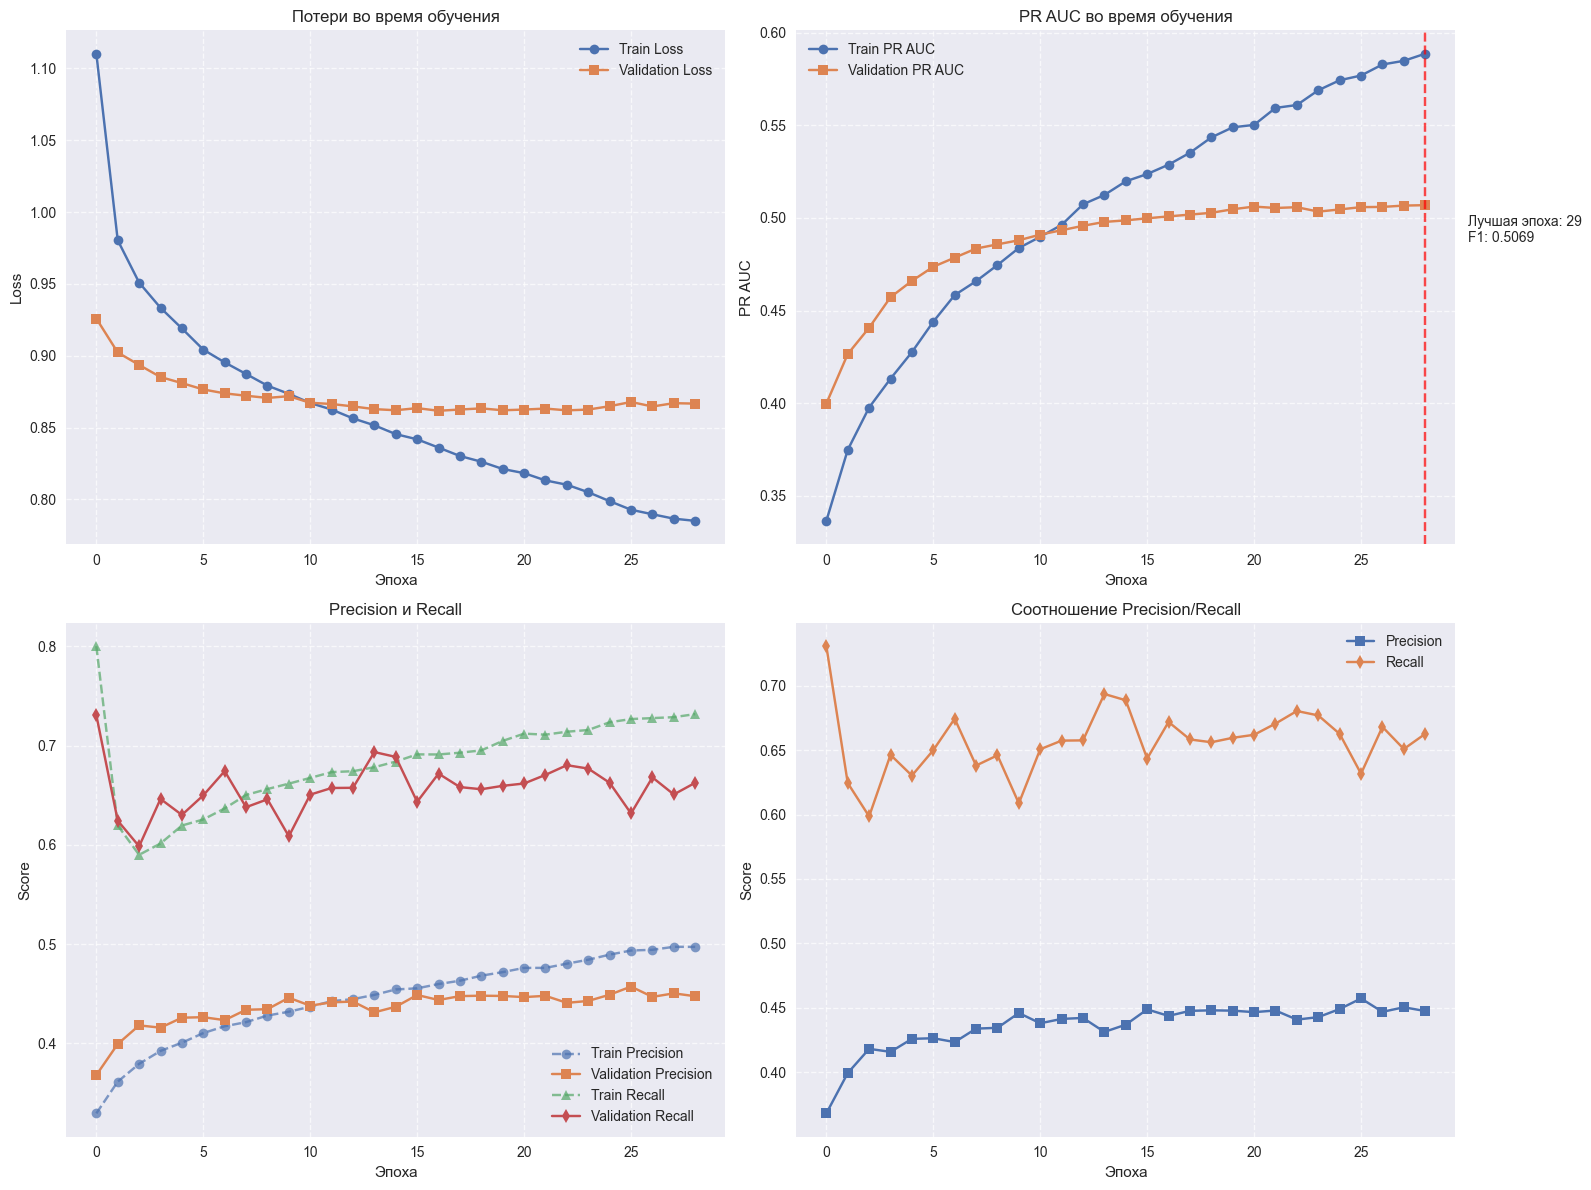


–ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –≠–ü–û–•–ò
–õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: 22
F1-score: 0.5371
Precision: 0.4480
Recall: 0.6705
PR AUC: 0.5054

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall: 0.67

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.40
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π F1-score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ä–æ–≥–µ: 0.5434


In [274]:
def plot_training_metrics(metrics):
    """–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫ –æ–±—É—á–µ–Ω–∏—è"""
    plt.figure(figsize=(16, 12))
    
    # –ì—Ä–∞—Ñ–∏–∫ 1: –ü–æ—Ç–µ—Ä–∏
    plt.subplot(2, 2, 1)
    plt.plot(metrics['train_losses'], 'o-', label='Train Loss')
    plt.plot(metrics['val_losses'], 's-', label='Validation Loss')
    plt.xlabel('–≠–ø–æ—Ö–∞')
    plt.ylabel('Loss')
    plt.title('–ü–æ—Ç–µ—Ä–∏ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # –ì—Ä–∞—Ñ–∏–∫ 2: PR AUC
    plt.subplot(2, 2, 2)
    plt.plot(metrics['train_pr_aucs'], 'o-', label='Train PR AUC')
    plt.plot(metrics['val_pr_aucs'], 's-', label='Validation PR AUC')
    plt.xlabel('–≠–ø–æ—Ö–∞')
    plt.ylabel('PR AUC')
    plt.title('PR AUC –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # –ù–∞—Ö–æ–¥–∏–º –ª—É—á—à—É—é —ç–ø–æ—Ö—É
    best_epoch = np.argmax(metrics['val_pr_aucs']) + 1
    best_f1 = max(metrics['val_pr_aucs'])
    plt.axvline(x=best_epoch-1, color='r', linestyle='--', alpha=0.7)
    plt.annotate(f'–õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: {best_epoch}\nF1: {best_f1:.4f}',
                 xy=(best_epoch-1, best_f1),
                 xytext=(best_epoch-1+2, best_f1-0.02))
    
    # –ì—Ä–∞—Ñ–∏–∫ 3: Precision –∏ Recall
    plt.subplot(2, 2, 3)
    plt.plot(metrics['train_precisions'], 'o--', label='Train Precision', alpha=0.7)
    plt.plot(metrics['val_precisions'], 's-', label='Validation Precision')
    plt.plot(metrics['train_recalls'], '^--', label='Train Recall', alpha=0.7)
    plt.plot(metrics['val_recalls'], 'd-', label='Validation Recall')
    plt.xlabel('–≠–ø–æ—Ö–∞')
    plt.ylabel('Score')
    plt.title('Precision –∏ Recall')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # –ì—Ä–∞—Ñ–∏–∫ 4: –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall
    plt.subplot(2, 2, 4)
    plt.plot(metrics['val_precisions'], 's-', label='Precision')
    plt.plot(metrics['val_recalls'], 'd-', label='Recall')
    plt.xlabel('–≠–ø–æ—Ö–∞')
    plt.ylabel('Score')
    plt.title('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏
plot_training_metrics(metrics)

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –±–∞–ª–∞–Ω—Å Precision/Recall
best_epoch = np.argmax(metrics['val_f1s'])
print("\n" + "="*70)
print("–ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –≠–ü–û–•–ò")
print("="*70)
print(f"–õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: {best_epoch+1}")
print(f"F1-score: {metrics['val_f1s'][best_epoch]:.4f}")
print(f"Precision: {metrics['val_precisions'][best_epoch]:.4f}")
print(f"Recall: {metrics['val_recalls'][best_epoch]:.4f}")
print(f"PR AUC: {metrics['val_pr_aucs'][best_epoch]:.4f}")
print(f"\n–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall: {metrics['val_precisions'][best_epoch]/metrics['val_recalls'][best_epoch]:.2f}")

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ—Ä–æ–≥–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
def find_optimal_threshold(model, dataloader):
    """–ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –¥–ª—è F1-score"""
    model.eval()
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for embeddings, labels in dataloader:
            outputs = model(embeddings)
            probs = torch.sigmoid(outputs)
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    thresholds = np.arange(0.1, 0.9, 0.05)
    f1_scores = []
    
    for threshold in thresholds:
        preds = (np.array(all_probs) >= threshold).astype(int)
        f1 = f1_score(all_labels, preds)
        f1_scores.append(f1)
    
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

# –ò—â–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥
optimal_threshold, best_f1 = find_optimal_threshold(model, val_loader)
print(f"\n–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {optimal_threshold:.2f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π F1-score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ä–æ–≥–µ: {best_f1:.4f}")

#### –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

–û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò –ù–ê –¢–ï–°–¢–û–í–´–• –î–ê–ù–ù–´–•

–û–°–ù–û–í–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
F1-score: 0.5437
Precision: 0.4103
Recall: 0.8054
PR AUC: 0.5133
Accuracy: 0.5678

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      –ü—Ä–æ–≤–∞–ª       0.83      0.46      0.59     14712
       –£—Å–ø–µ—Ö       0.41      0.81      0.54      6912

    accuracy                           0.57     21624
   macro avg       0.62      0.63      0.57     21624
weighted avg       0.70      0.57      0.57     21624



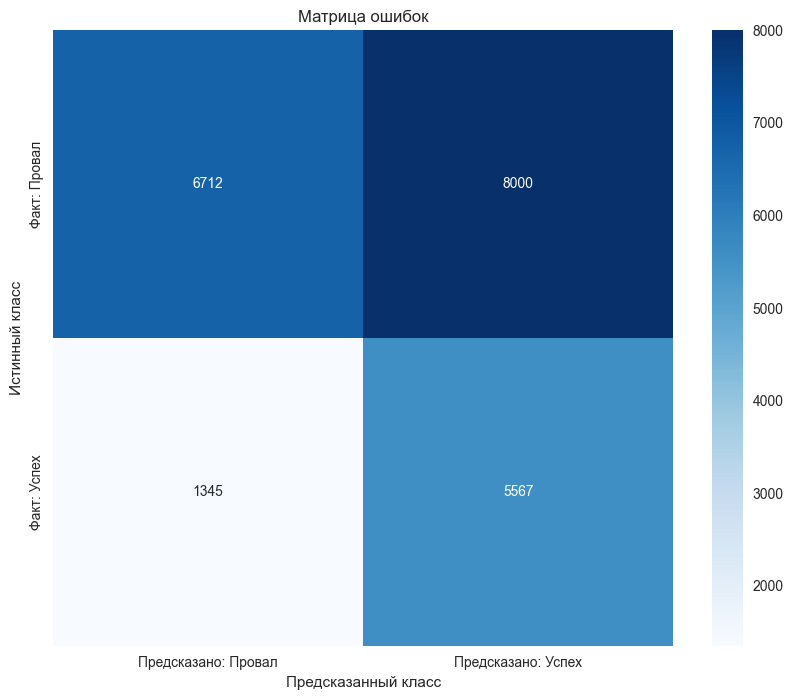

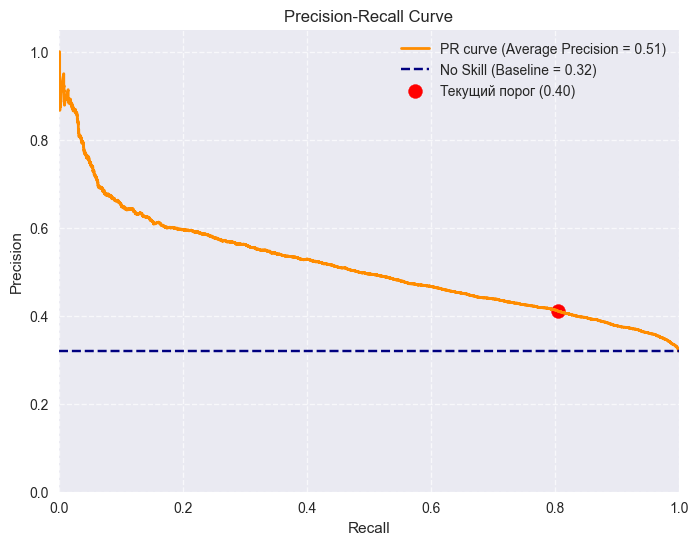


–ê–ù–ê–õ–ò–ó –ü–û–†–û–ì–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò
–¢–µ–∫—É—â–∏–π –ø–æ—Ä–æ–≥: 0.40 (F1 = 0.5437)
–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.40 (F1 = 0.5437)


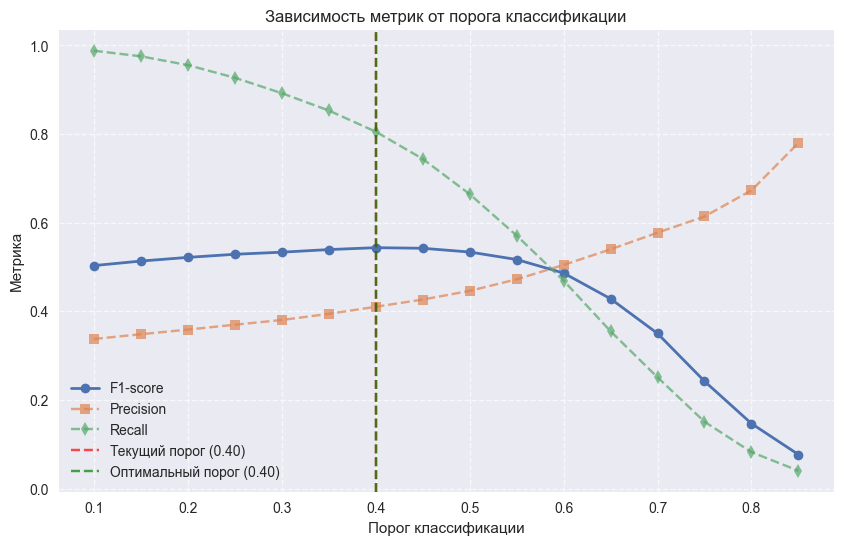

In [275]:
def evaluate_model(model, test_loader, threshold=0.5):
    print("="*70)
    print("–û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò –ù–ê –¢–ï–°–¢–û–í–´–• –î–ê–ù–ù–´–•")
    print("="*70)
    
    # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    model.eval()
    all_probs = []
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for embeddings, labels in test_loader:
            outputs = model(embeddings)
            probs = torch.sigmoid(outputs)
            
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend((probs >= threshold).cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ numpy
    all_probs = np.array(all_probs)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    # 1. –û—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏
    print("\n–û–°–ù–û–í–ù–´–ï –ú–ï–¢–†–ò–ö–ò:")
    print(f"F1-score: {f1_score(all_labels, all_preds):.4f}")
    print(f"Precision: {precision_score(all_labels, all_preds):.4f}")
    print(f"Recall: {recall_score(all_labels, all_preds):.4f}")
    print(f"PR AUC: {average_precision_score(all_labels, all_probs):.4f}")
    print(f"Accuracy: {np.mean(all_preds == all_labels):.4f}")
    
    # 2. Classification report
    print("\nCLASSIFICATION REPORT:")
    print(classification_report(all_labels, all_preds, target_names=['–ü—Ä–æ–≤–∞–ª', '–£—Å–ø–µ—Ö']))
    
    # 3. Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ: –ü—Ä–æ–≤–∞–ª', '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ: –£—Å–ø–µ—Ö'],
                yticklabels=['–§–∞–∫—Ç: –ü—Ä–æ–≤–∞–ª', '–§–∞–∫—Ç: –£—Å–ø–µ—Ö'])
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
    plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
    plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫')
    plt.show()
    
    # 4. PR Curve
    precision, recall, _ = precision_recall_curve(all_labels, all_probs)
    pr_auc = average_precision_score(all_labels, all_probs)
    
    # –ë–∞–∑–æ–≤—ã–π —É—Ä–æ–≤–µ–Ω—å (no-skill classifier)
    no_skill = np.mean(all_labels)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, 
             label=f'PR curve (Average Precision = {pr_auc:.2f})')
    
    # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è –ª–∏–Ω–∏—è –¥–ª—è "no skill" –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
    plt.axhline(y=no_skill, color='navy', linestyle='--', 
                label=f'No Skill (Baseline = {no_skill:.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # –î–æ–±–∞–≤–ª—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–æ—á–∫–µ —Å —Ç–µ–∫—É—â–∏–º –ø–æ—Ä–æ–≥–æ–º
    current_precision = precision_score(all_labels, all_preds)
    current_recall = recall_score(all_labels, all_preds)
    plt.scatter(current_recall, current_precision, 
                color='red', s=100, marker='o',
                label=f'–¢–µ–∫—É—â–∏–π –ø–æ—Ä–æ–≥ ({threshold:.2f})')
    
    plt.legend()
    plt.show()
    
    # 5. –ê–Ω–∞–ª–∏–∑ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞
    print("\n" + "="*50)
    print("–ê–ù–ê–õ–ò–ó –ü–û–†–û–ì–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò")
    print("="*50)
    
    # –ù–∞—Ö–æ–¥–∏–º F1 –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤
    thresholds = np.arange(0.1, 0.9, 0.05)
    f1_scores = []
    precisions = []
    recalls = []
    
    for t in thresholds:
        preds = (all_probs >= t).astype(int)
        f1 = f1_score(all_labels, preds)
        f1_scores.append(f1)
        precisions.append(precision_score(all_labels, preds))
        recalls.append(recall_score(all_labels, preds))
    
    # –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –ø–æ F1
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    
    print(f"–¢–µ–∫—É—â–∏–π –ø–æ—Ä–æ–≥: {threshold:.2f} (F1 = {f1_scores[np.where(thresholds == threshold)[0][0]]:.4f})")
    print(f"–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: {best_threshold:.2f} (F1 = {f1_scores[best_idx]:.4f})")
    
    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å F1 –æ—Ç –ø–æ—Ä–æ–≥–∞
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, 'o-', label='F1-score', linewidth=2)
    plt.plot(thresholds, precisions, 's--', label='Precision', alpha=0.7)
    plt.plot(thresholds, recalls, 'd--', label='Recall', alpha=0.7)
    
    plt.axvline(x=threshold, color='r', linestyle='--', alpha=0.7, label=f'–¢–µ–∫—É—â–∏–π –ø–æ—Ä–æ–≥ ({threshold:.2f})')
    plt.axvline(x=best_threshold, color='g', linestyle='--', alpha=0.7, label=f'–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ ({best_threshold:.2f})')
    
    plt.xlabel('–ü–æ—Ä–æ–≥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')
    plt.ylabel('–ú–µ—Ç—Ä–∏–∫–∞')
    plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫ –æ—Ç –ø–æ—Ä–æ–≥–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    return all_probs, all_preds, all_labels

# –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_probs, test_preds, test_labels = evaluate_model(model, test_loader, threshold=optimal_threshold)


#### –í—ã–≤–æ–¥

–ù–µ–π—Ä–æ—Å–µ—Ç–∫–∞ –≤ –∏—Ç–æ–≥–µ –æ–∫–∞–∑–∞–ª–∞—Å—å –≤—Å—ë —Ç–∞–∫–∏ –Ω–µ–º–Ω–æ–≥–æ —Ö—É–∂–µ, —á–µ–º –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–Ω–∞—è –Ω–∞ TF-IDF (—Ç–∞–º —É –Ω–∞—Å –ø–æ–ª—É—á–∏–ª—Å—è f1-score 0.549). PR AUC —Ç–æ–∂–µ –ø–æ–ª—É—á–∏–ª—Å—è –ø–æ—Ö—É–∂–µ (–Ω–∞ 0.015)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—ä–µ–¥–µ–Ω–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ SBERT –∏ –æ—Ä–≥–∏–≥–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –æ–±—É—á–∏—Ç—å –Ω–∞ –≤—Å—ë–º —ç—Ç–æ–º –Ω–µ–π—Ä–æ—Å–µ—Ç–∫—É.

## –ü–µ—Ä–µ–≤–æ–¥–∏–º –¥–∞–Ω–Ω—ã–µ –≤ –Ω—É–∂–Ω—ã–π –≤–∏–¥

In [347]:
X_train_sbert = np.hstack([title_embeddings_train, desc_embeddings_train])
X_test_sbert = np.hstack([title_embeddings_test, desc_embeddings_test])

In [348]:
X_train_no_text = X_train.drop(['name', 'desc'], axis=1).to_numpy(dtype='float32')
X_test_no_text = X_test.drop(['name', 'desc'], axis=1).to_numpy(dtype='float32')

In [349]:
X_train_all = np.hstack([X_train_sbert, X_train_no_text])
X_test_all = np.hstack([X_test_sbert, X_test_no_text])

In [350]:
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train_all, y_train, test_size=0.15, random_state=42, stratify=y_train
)

In [351]:
# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤ 
class_weights = {
    0: 1.0,
    1: (len(y_train) - sum(y_train)) / sum(y_train)
}
print(f"–í–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤: {class_weights}")

–í–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤: {0: 1.0, 1: 2.128322904987522}


In [352]:
X_train_tensor = torch.FloatTensor(X_train_)
y_train_tensor = torch.FloatTensor(y_train_.values).reshape(-1, 1)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_all)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [353]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è

In [354]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model = KickstarterMLP(
    input_size=X_train_.shape[1],
    dropout_rate = 0.2
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è
criterion, optimizer, scheduler, early_stopping = setup_training(
    model, 
    class_weights,
    lr=5e-5, # –æ—Å—Ç–∞–≤–∏–ª —Ç–∞–∫–æ–π –ø–æ—Å–ª–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∑–∞–ø—É–∫–æ–≤
    weight_decay=1e-5
)

## –û–±—É—á–µ–Ω–∏–µ

In [355]:
def train_model(model, train_loader, val_loader, criterion, 
                optimizer, scheduler, early_stopping, epochs=50):
    
    # –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
    train_losses = []
    val_losses = []
    train_f1s = []
    val_f1s = []
    train_precisions = []
    val_precisions = []
    train_recalls = []
    val_recalls = []
    train_pr_aucs = []
    val_pr_aucs = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        print(f"\n–≠–ø–æ—Ö–∞ {epoch+1}/{epochs}")
        
        # –û–±—É—á–µ–Ω–∏–µ
        train_loss, train_f1, train_precision, train_recall, train_pr_auc = train_epoch(
            model, train_loader, criterion, optimizer
        )
        
        # –í–∞–ª–∏–¥–∞—Ü–∏—è
        val_loss, val_f1, val_precision, val_recall, val_pr_auc, _, _ = validate_epoch(
            model, val_loader, criterion
        )
        
        # –û–±–Ω–æ–≤–ª—è–µ–º LR scheduler
        scheduler.step(val_pr_auc)
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        train_pr_aucs.append(train_pr_auc)
        val_pr_aucs.append(val_pr_auc)
        
        # –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
        print(f"  Train Loss: {train_loss:.4f} | F1: {train_f1:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | PR AUC: {train_pr_auc:.4f}")
        print(f"  Val Loss: {val_loss:.4f} | F1: {val_f1:.4f} | Precision: {val_precision:.4f} | Recall: {val_recall:.4f} | PR AUC: {val_pr_auc:.4f}")
        
        # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
        current_score = val_pr_auc
        
        if early_stopping['best_score'] is None:
            early_stopping['best_score'] = current_score
        elif current_score < early_stopping['best_score'] + early_stopping['min_delta']:
            early_stopping['epochs_no_improve'] += 1
            if early_stopping['epochs_no_improve'] >= early_stopping['patience']:
                early_stopping['stop'] = True
                print(f"\n–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞ —ç–ø–æ—Ö–µ {epoch+1}")
                break
        else:
            early_stopping['best_score'] = current_score
            early_stopping['epochs_no_improve'] = 0
    
    total_time = time.time() - start_time
    print(f"\n–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∑–∞ {total_time:.2f} —Å–µ–∫—É–Ω–¥")
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_f1s': train_f1s,
        'val_f1s': val_f1s,
        'train_precisions': train_precisions,
        'val_precisions': val_precisions,
        'train_recalls': train_recalls,
        'val_recalls': val_recalls,
        'train_pr_aucs': train_pr_aucs,
        'val_pr_aucs': val_pr_aucs
    }

In [356]:
metrics = train_model(
    model, train_loader, val_loader, criterion, 
    optimizer, scheduler, early_stopping
)


–≠–ø–æ—Ö–∞ 1/50


  Train Loss: 0.7522 | F1: 0.6275 | Precision: 0.4913 | Recall: 0.8681 | PR AUC: 0.6363
  Val Loss: 0.4836 | F1: 0.7702 | Precision: 0.6420 | Recall: 0.9624 | PR AUC: 0.8468

–≠–ø–æ—Ö–∞ 2/50


  Train Loss: 0.5037 | F1: 0.7593 | Precision: 0.6536 | Recall: 0.9058 | PR AUC: 0.8038
  Val Loss: 0.4286 | F1: 0.7858 | Precision: 0.6588 | Recall: 0.9735 | PR AUC: 0.8747

–≠–ø–æ—Ö–∞ 3/50


  Train Loss: 0.4470 | F1: 0.7857 | Precision: 0.6919 | Recall: 0.9088 | PR AUC: 0.8361
  Val Loss: 0.3859 | F1: 0.8090 | Precision: 0.7047 | Recall: 0.9496 | PR AUC: 0.8829

–≠–ø–æ—Ö–∞ 4/50


  Train Loss: 0.4223 | F1: 0.7956 | Precision: 0.7056 | Recall: 0.9117 | PR AUC: 0.8497
  Val Loss: 0.3811 | F1: 0.8062 | Precision: 0.6961 | Recall: 0.9576 | PR AUC: 0.8866

–≠–ø–æ—Ö–∞ 5/50


  Train Loss: 0.4089 | F1: 0.8009 | Precision: 0.7103 | Recall: 0.9179 | PR AUC: 0.8571
  Val Loss: 0.3696 | F1: 0.8154 | Precision: 0.7223 | Recall: 0.9361 | PR AUC: 0.8891

–≠–ø–æ—Ö–∞ 6/50


  Train Loss: 0.3987 | F1: 0.8063 | Precision: 0.7161 | Recall: 0.9226 | PR AUC: 0.8620
  Val Loss: 0.3683 | F1: 0.8141 | Precision: 0.7124 | Recall: 0.9496 | PR AUC: 0.8904

–≠–ø–æ—Ö–∞ 7/50


  Train Loss: 0.3885 | F1: 0.8091 | Precision: 0.7186 | Recall: 0.9257 | PR AUC: 0.8685
  Val Loss: 0.3772 | F1: 0.8049 | Precision: 0.6915 | Recall: 0.9626 | PR AUC: 0.8894

–≠–ø–æ—Ö–∞ 8/50


  Train Loss: 0.3846 | F1: 0.8104 | Precision: 0.7189 | Recall: 0.9286 | PR AUC: 0.8693
  Val Loss: 0.3718 | F1: 0.8076 | Precision: 0.6956 | Recall: 0.9626 | PR AUC: 0.8917

–≠–ø–æ—Ö–∞ 9/50


  Train Loss: 0.3801 | F1: 0.8124 | Precision: 0.7220 | Recall: 0.9287 | PR AUC: 0.8721
  Val Loss: 0.3634 | F1: 0.8160 | Precision: 0.7164 | Recall: 0.9477 | PR AUC: 0.8930

–≠–ø–æ—Ö–∞ 10/50


  Train Loss: 0.3773 | F1: 0.8141 | Precision: 0.7220 | Recall: 0.9332 | PR AUC: 0.8725
  Val Loss: 0.3654 | F1: 0.8110 | Precision: 0.7034 | Recall: 0.9576 | PR AUC: 0.8932

–≠–ø–æ—Ö–∞ 11/50


  Train Loss: 0.3709 | F1: 0.8168 | Precision: 0.7250 | Recall: 0.9351 | PR AUC: 0.8760
  Val Loss: 0.3652 | F1: 0.8121 | Precision: 0.7051 | Recall: 0.9573 | PR AUC: 0.8932

–≠–ø–æ—Ö–∞ 12/50


  Train Loss: 0.3682 | F1: 0.8182 | Precision: 0.7276 | Recall: 0.9344 | PR AUC: 0.8786
  Val Loss: 0.3637 | F1: 0.8152 | Precision: 0.7137 | Recall: 0.9503 | PR AUC: 0.8928

–≠–ø–æ—Ö–∞ 13/50


  Train Loss: 0.3659 | F1: 0.8199 | Precision: 0.7286 | Recall: 0.9375 | PR AUC: 0.8803
  Val Loss: 0.3637 | F1: 0.8146 | Precision: 0.7114 | Recall: 0.9527 | PR AUC: 0.8934

–≠–ø–æ—Ö–∞ 14/50


  Train Loss: 0.3624 | F1: 0.8201 | Precision: 0.7276 | Recall: 0.9396 | PR AUC: 0.8830
  Val Loss: 0.3675 | F1: 0.8093 | Precision: 0.6996 | Recall: 0.9597 | PR AUC: 0.8929

–≠–ø–æ—Ö–∞ 15/50


  Train Loss: 0.3581 | F1: 0.8213 | Precision: 0.7299 | Recall: 0.9387 | PR AUC: 0.8855
  Val Loss: 0.3646 | F1: 0.8122 | Precision: 0.7073 | Recall: 0.9537 | PR AUC: 0.8931

–≠–ø–æ—Ö–∞ 16/50


  Train Loss: 0.3580 | F1: 0.8212 | Precision: 0.7305 | Recall: 0.9376 | PR AUC: 0.8848
  Val Loss: 0.3655 | F1: 0.8101 | Precision: 0.7006 | Recall: 0.9602 | PR AUC: 0.8937

–≠–ø–æ—Ö–∞ 17/50


  Train Loss: 0.3537 | F1: 0.8235 | Precision: 0.7331 | Recall: 0.9394 | PR AUC: 0.8862
  Val Loss: 0.3696 | F1: 0.8072 | Precision: 0.6943 | Recall: 0.9638 | PR AUC: 0.8933

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞ —ç–ø–æ—Ö–µ 17

–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∑–∞ 102.38 —Å–µ–∫—É–Ω–¥


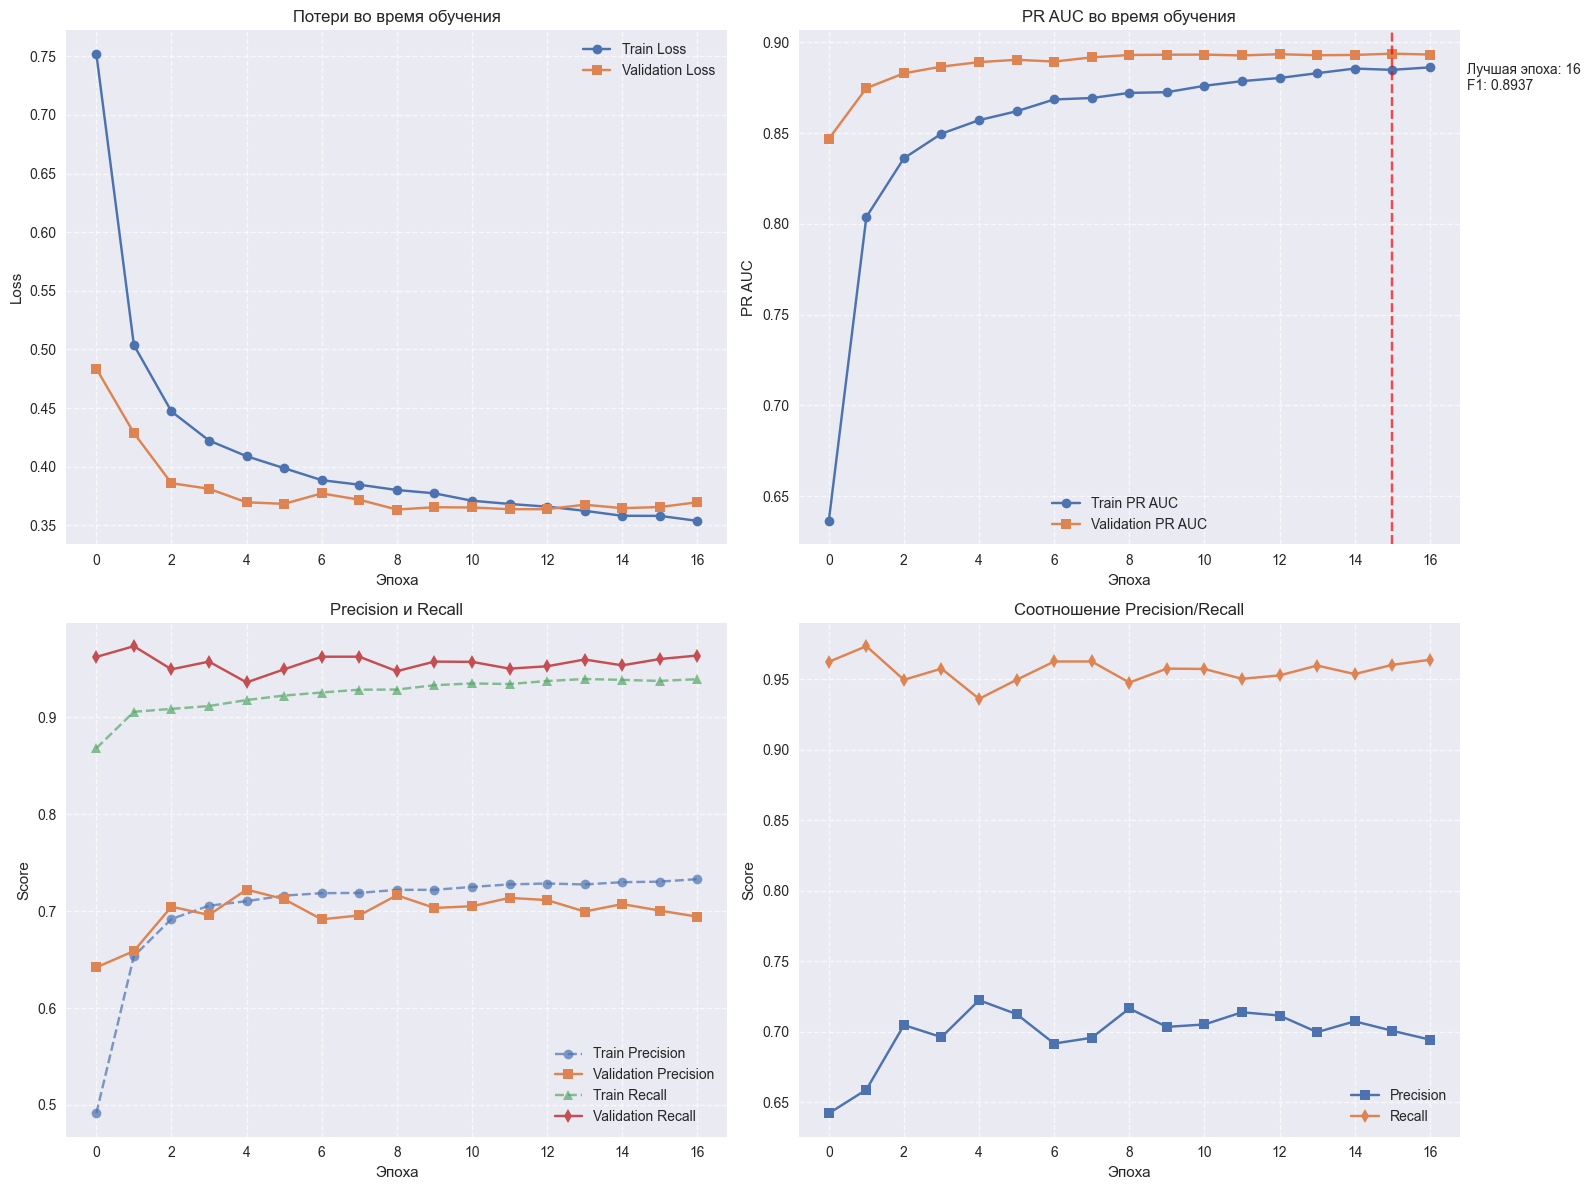


–ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –≠–ü–û–•–ò
–õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: 9
F1-score: 0.8160
Precision: 0.7164
Recall: 0.9477
PR AUC: 0.8930

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall: 0.76

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.65
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π F1-score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ä–æ–≥–µ: 0.8182


In [357]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏
plot_training_metrics(metrics)

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –±–∞–ª–∞–Ω—Å Precision/Recall
best_epoch = np.argmax(metrics['val_f1s'])
print("\n" + "="*70)
print("–ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –≠–ü–û–•–ò")
print("="*70)
print(f"–õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: {best_epoch+1}")
print(f"F1-score: {metrics['val_f1s'][best_epoch]:.4f}")
print(f"Precision: {metrics['val_precisions'][best_epoch]:.4f}")
print(f"Recall: {metrics['val_recalls'][best_epoch]:.4f}")
print(f"PR AUC: {metrics['val_pr_aucs'][best_epoch]:.4f}")
print(f"\n–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Precision/Recall: {metrics['val_precisions'][best_epoch]/metrics['val_recalls'][best_epoch]:.2f}")

# –ò—â–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥
optimal_threshold, best_f1 = find_optimal_threshold(model, val_loader)
print(f"\n–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {optimal_threshold:.2f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π F1-score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ä–æ–≥–µ: {best_f1:.4f}")

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

–û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò –ù–ê –¢–ï–°–¢–û–í–´–• –î–ê–ù–ù–´–•

–û–°–ù–û–í–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
F1-score: 0.8159
Precision: 0.7323
Recall: 0.9212
PR AUC: 0.8899
Accuracy: 0.8671

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      –ü—Ä–æ–≤–∞–ª       0.96      0.84      0.90     14712
       –£—Å–ø–µ—Ö       0.73      0.92      0.82      6912

    accuracy                           0.87     21624
   macro avg       0.85      0.88      0.86     21624
weighted avg       0.89      0.87      0.87     21624



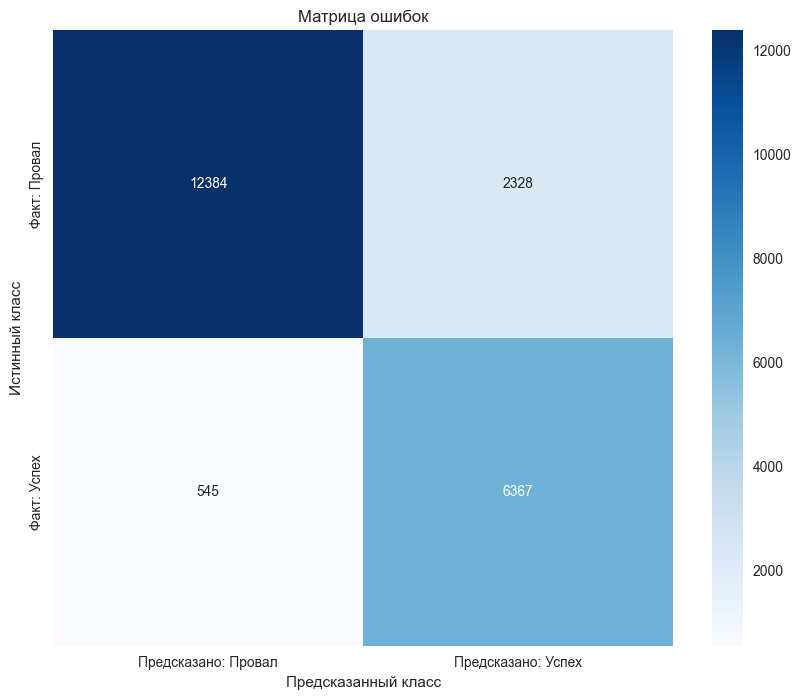

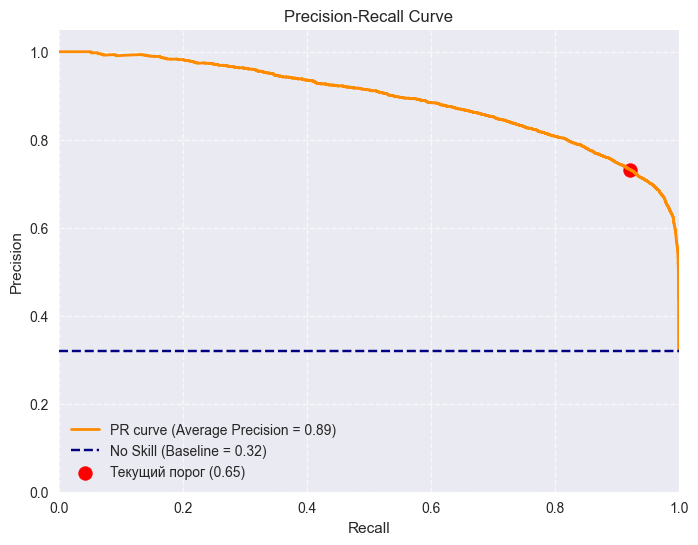


–ê–ù–ê–õ–ò–ó –ü–û–†–û–ì–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò
–¢–µ–∫—É—â–∏–π –ø–æ—Ä–æ–≥: 0.65 (F1 = 0.8159)
–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: 0.70 (F1 = 0.8170)


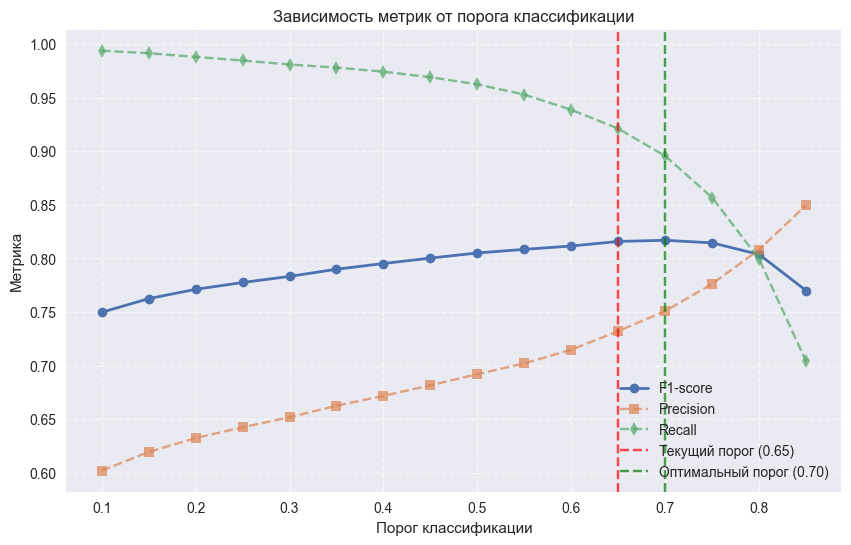

In [358]:
# –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_probs, test_preds, test_labels = evaluate_model(model, test_loader, threshold=optimal_threshold)

**–í—ã–≤–æ–¥:**

–î–∞–∂–µ —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ –æ–ø–∏—Å–∞–Ω–∏—è –∏ –Ω–∞–∑–≤–∞–Ω–∏—è, –º—ã –Ω–µ —Å–º–æ–≥–ª–∏ –ø–æ–±–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–µ–∑ –Ω–∏—Ö. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ —á—Ç–æ –∫–∞–∫–∞—è-—Ç–æ –ø–æ–ª–µ–∑–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ –Ω–∏—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è (–º—ã –º–æ–∂–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –ª—É—á—à–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ —É–≥–∞–¥—ã–≤–∞–Ω–∏—è), –≤ –∫–æ–Ω–µ—á–Ω–æ–º –∏—Ç–æ–≥–µ –æ–Ω–∏ –Ω–µ —Ç–∞–∫ –≤–∞–∂–Ω—ã —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É—Å–ø–µ—Ö–∞.

# –¢–∞–±–ª–∏—á–Ω—ã–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã

–†–µ—à–∏–ª –¥–æ–±–∞–≤–∏—Ç—å —ç—Ç–æ—Ç –ø—É–Ω–∫—Ç, –ø–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ —É–∑–Ω–∞–ª –ø—Ä–æ –Ω–∏—Ö.

–ü—Ä–∏–¥—ë—Ç—Å—è –Ω–µ–º–Ω–æ–≥–æ –ø–µ—Ä–µ–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É - —á–∏—Å–ª–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —Ç–∞–∫–∂–µ, –∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –Ω–µ –¥–µ–ª–∞–µ–º OHE.

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
data_train = pd.read_csv('train.csv')

–í—Å—ë —Ç–æ –∂–µ —á—Ç–æ –∏ —Ä–∞–Ω—å—à–µ

In [4]:
data_train['name'] = data_train['keywords'].str.split('-').str.join(' ')
data_train.drop(['keywords', 'project_id'], axis=1, inplace=True)
data_train.dropna(inplace=True)

### –î–∞—Ç—ã

In [5]:
data_train["launched_at"] = pd.to_datetime(data_train["launched_at"], unit="s")
data_train["created_at"] = pd.to_datetime(data_train["created_at"], unit="s")
data_train["deadline"] = pd.to_datetime(data_train["deadline"], unit="s")
data_train["state_changed_at"] = pd.to_datetime(data_train["state_changed_at"], unit="s")

# –ì–æ–¥
data_train["year_trend"] = data_train["launched_at"].dt.year - data_train["launched_at"].dt.year.min()

# –ú–µ—Å—è—Ü
data_train['month_launched'] = data_train["launched_at"].dt.month.astype("category")

# # –î–µ–ª–∞–µ–º OHE –º–µ—Å—è—Ü–∞
# data_train = pd.get_dummies(
#     data_train,
#     columns=["month_launched"],
#     prefix="month_launched",        
#     prefix_sep="_",        
#     drop_first=True        
# )

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–Ω—è
data_train["day_sin"] = np.sin(2 * np.pi * data_train["launched_at"].dt.day / 31)
data_train["day_cos"] = np.cos(2 * np.pi * data_train["launched_at"].dt.day / 31)

# –§–ª–∞–≥ –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã–µ
data_train["is_weekend"] = data_train["launched_at"].dt.dayofweek.isin([5, 6]).astype(int)

data_train['created_dif'] = (data_train['launched_at'] - data_train['created_at']).dt.days
data_train['campaign_duration'] = (data_train['deadline'] - data_train['launched_at']).dt.days
data_train.drop(['state_changed_at', 'launched_at', 'created_at', 'deadline'], axis = 1, inplace=True)

### –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ

country

In [6]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∫–æ–¥—ã —Å—Ç—Ä–∞–Ω –≤ —Ä–µ–≥–∏–æ–Ω—ã
cc = coco.CountryConverter()
data_train["region"] = data_train["country"].apply(
    lambda x: cc.convert(names=x, to="continent", not_found="Other")
)
data_train.drop(['country'], axis=1, inplace=True)

currency

In [7]:
main_currencies = set(['USD', 'GBP', 'EUR', 'CAD'])
data_train['currency'] = data_train['currency'].apply(lambda x: x if x in main_currencies else 'Other')

### –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train/test

In [8]:
y = data_train['final_status'].copy()
X = data_train.drop(['final_status'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### –ß–∏—Å–ª–æ–≤—ã–µ

In [9]:
# goal
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["goal"] = np.log10(X_train["goal"] + 1)
X_test["goal"] = np.log10(X_test["goal"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["goal"] = scaler.fit_transform(X_train[["goal"]])
X_test["goal"] = scaler.transform(X_test[["goal"]])

# backers_count
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["backers_count"] = np.log10(X_train["backers_count"] + 1)
X_test["backers_count"] = np.log10(X_test["backers_count"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["backers_count"] = scaler.fit_transform(X_train[["backers_count"]])
X_test["backers_count"] = scaler.transform(X_test[["backers_count"]])

# created_dif
# –õ–æ–≥–∞—Ä–∏—Ñ–∏–º—Ä—É–µ–º
X_train["created_dif"] = np.log10(X_train["created_dif"] + 1)
X_test["created_dif"] = np.log10(X_test["created_dif"] + 1)

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º
scaler = RobustScaler()
X_train["created_dif"] = scaler.fit_transform(X_train[["created_dif"]])
X_test["created_dif"] = scaler.transform(X_test[["created_dif"]])

# campaign_duration
def categorize_duration(days):
    if days <= 14:
        return "Very_Short"
    elif 15 <= days <= 24:
        return "Short"
    elif 25 <= days <= 35:
        return "Normal"
    elif 36 <= days <= 54:
        return "Long"
    elif 55 <= days <= 65:
        return "Two_month"
    else:
        return "Very_long"

X_train["campaign_duration"] = X_train["campaign_duration"].apply(categorize_duration)
X_test["campaign_duration"] = X_test["campaign_duration"].apply(categorize_duration)

–ü—Ä–æ—Å—Ç—ã–µ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ

In [10]:
X_train['words_name'] = X_train['name'].apply(lambda x: len(x.split()))
X_train['words_desc'] = X_train['desc'].apply(lambda x: len(x.split()))
X_train['uppercase_ratio'] = X_train['desc'].apply(lambda text: sum(1 for char in text if char.isupper()) / max(len(text), 1))
X_train['exlam_and_quest'] = X_train['desc'].apply(lambda text: sum(1 for char in text if char == '!' or char == '?'))

X_test['words_name'] = X_test['name'].apply(lambda x: len(x.split()))
X_test['words_desc'] = X_test['desc'].apply(lambda x: len(x.split()))
X_test['uppercase_ratio'] = X_test['desc'].apply(lambda text: sum(1 for char in text if char.isupper()) / max(len(text), 1))
X_test['exlam_and_quest'] = X_test['desc'].apply(lambda text: sum(1 for char in text if char == '!' or char == '?'))

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏
scaler = StandardScaler()
X_train['words_name'] = scaler.fit_transform(X_train[['words_name']])
X_test['words_name'] = scaler.transform(X_test[['words_name']])

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏
scaler = StandardScaler()
X_train['words_desc'] = scaler.fit_transform(X_train[['words_desc']])
X_test['words_desc'] = scaler.transform(X_test[['words_desc']])

# –î–æ–ª—è –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏
X_train['uppercase_ratio'] = np.log(X_train[['uppercase_ratio']] + 0.01)
X_test['uppercase_ratio'] = np.log(X_test[['uppercase_ratio']] + 0.01)

scaler = StandardScaler()
X_train['uppercase_ratio'] = scaler.fit_transform(X_train[['uppercase_ratio']])
X_test['uppercase_ratio'] = scaler.transform(X_test[['uppercase_ratio']])

# –ö–æ–ª-–≤–æ –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤
def exlam_and_quest_classifier(counter):
    if counter == 0:
        return 0
    elif counter < 4:
        return 1
    elif counter < 9:
        return 2
    else:
        return 3

X_train["exlam_and_quest"] = X_train["exlam_and_quest"].apply(exlam_and_quest_classifier)

## –û–±—É—á–∞–µ–º

In [11]:
X_train_no_text = X_train.drop(['name', 'desc'], axis=1)
X_test_no_text = X_test.drop(['name', 'desc'], axis=1)

In [12]:
full_train = X_train_no_text.copy()
full_train['target'] = y_train

full_test = X_test_no_text.copy()
full_test['target'] = y_test

In [13]:
full_train.columns

Index(['goal', 'disable_communication', 'currency', 'backers_count',
       'year_trend', 'month_launched', 'day_sin', 'day_cos', 'is_weekend',
       'created_dif', 'campaign_duration', 'region', 'words_name',
       'words_desc', 'uppercase_ratio', 'exlam_and_quest', 'target'],
      dtype='object')

### –ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏

In [14]:
cat_cols = ['region', 'currency', 'month_launched', 'campaign_duration', 'disable_communication', 'is_weekend', 'exlam_and_quest']

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
data_config = DataConfig(
    target=['target'],  
    continuous_cols=[col for col in full_train.columns if col not in cat_cols and col != 'target'],
    categorical_cols=cat_cols,
)

# –ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è –º–æ–¥–µ–ª–∏
model_config = TabTransformerConfig(
    task="classification",
    metrics=["f1_score", "average_precision", 'accuracy'],
    metrics_prob_input=[False, True, False]
)

# –ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è —Ç—Ä–µ–Ω–µ—Ä–∞ (–æ–±—É—á–µ–Ω–∏—è)
trainer_config = TrainerConfig(
    max_epochs=50,
    early_stopping='valid_f1_score',
    load_best=False
)

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
optimizer_config = OptimizerConfig()

# –°–æ–∑–¥–∞—ë–º TabularModel
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

2025-09-09 15:45:24,628 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [28]:
# –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è
tabular_model.fit(train= full_train)

Seed set to 42


2025-09-09 15:45:24,836 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-09-09 15:45:24,877 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

2025-09-09 15:45:25,021 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabTransformerModel

2025-09-09 15:45:25,083 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-09-09 15:45:25,105 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

‚îè‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ   ‚îÉ Name             ‚îÉ Type                   ‚îÉ Params ‚îÉ Mode  ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ 0 ‚îÇ _backbone        ‚îÇ TabTransformerBackbone ‚îÇ  271 K ‚îÇ train ‚îÇ
‚îÇ 1 ‚îÇ _embedding_layer ‚îÇ Embedding2dLayer       ‚îÇ  1.4 K ‚îÇ train ‚îÇ
‚îÇ 2 ‚îÇ _head            ‚îÇ LinearHead             ‚îÇ    468 ‚îÇ train ‚îÇ
‚îÇ 3 ‚îÇ loss             ‚îÇ CrossEntropyLoss       ‚îÇ      0 ‚îÇ train ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Trainable params: 273 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 273 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 133                                                                                         
Modules in eval mode: 0

Output()

2025-09-09 15:51:24,749 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

### –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏

–ö —Å–æ–∂–∞–ª–µ–Ω–∏—é, –≤ —Ç–µ–∫—É—â–µ–π –≤–µ—Ä—Å–∏–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–æ–¥—Å—á—ë—Ç–∞ –º–µ—Ç—Ä–∏–∫ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –∏ –≤—Å–µ–≥–¥–∞ —Å—á–∏—Ç–∞–µ—Ç –º–∞–∫—Ä–æ –≤–∞—Ä–∏–∞–Ω—Ç (–æ–±—â–∞–ª—Å—è —Å –∞–≤—Ç–æ—Ä–∞–º–∏ –Ω–∞ –≥–∏—Ç—Ö–∞–±–µ). –ü–æ—ç—Ç–æ–º—É –º–µ—Ç—Ä–∏–∫–∏ —Å—á–∏—Ç–∞–µ–º –≤—Ä—É—á–Ω—É—é, –∞ –Ω–µ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º evaluate.

In [29]:
def process_result(y_pred, y_pred_proba, y_test):
    result =  {
            'f1_test': f1_score(y_test, y_pred),
            'PR_AUC_test': average_precision_score(y_test, y_pred_proba),
            'accuracy': accuracy_score(y_test, y_pred),
            'predictions': y_pred,
            'probabilities': y_pred_proba
            }

    return result


def print_results_no_val(results):
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π f1-score: {results['f1_test']:.3f}")
    print()
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: {results['PR_AUC_test']:.3f}")
    print()
    print(f"–¢–µ—Å—Ç–æ–≤—ã–π accuracy: {results['accuracy']:.3f}")
    print()

In [34]:
pred_df

target_0_probability  target_1_probability  target_prediction
28214                 0.995                 0.005                  0
56448                 0.354                 0.646                  1
96783                 0.393                 0.607                  1
63814                 0.008                 0.992                  1
39127                 1.000                 0.000                  0
...                     ...                   ...                ...
97806                 0.371                 0.629                  1
49543                 0.230                 0.770                  1
83007                 0.299                 0.701                  1
15214                 0.211                 0.789                  1
92626                 0.999                 0.001                  0

[21624 rows x 3 columns]

In [30]:
pred_df = tabular_model.predict(full_test)

In [31]:
results = process_result(pred_df['target_prediction'], pred_df['target_1_probability'], y_test)

In [32]:
print_results_no_val(results)

–¢–µ—Å—Ç–æ–≤—ã–π f1-score: 0.794

–¢–µ—Å—Ç–æ–≤—ã–π PR AUC: 0.881

–¢–µ—Å—Ç–æ–≤—ã–π accuracy: 0.871



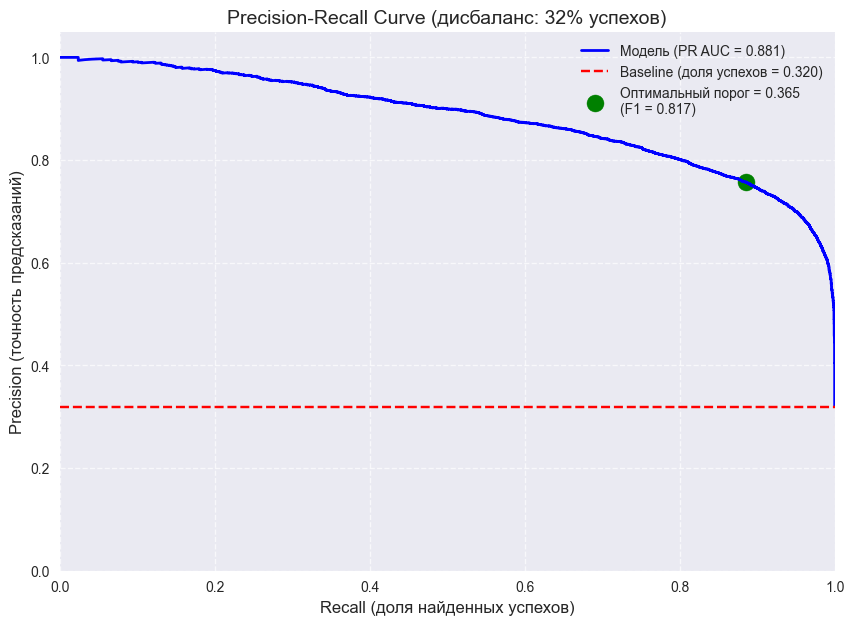

(0.3647741, 0.8814272645320946)

In [33]:
plot_precision_recall_curve(y_test, pred_df['target_1_probability'])

–ß—Ç–æ –∂, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –Ω–µ –æ—á–µ–Ω—å –≤–ø–µ—á–∞—Ç–ª—è—é—â–∏–º–∏, –Ω–æ –º–æ–∂–Ω–æ –≤—Å—ë —Ç–∞–∫–∏ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å.

# –ó–∞–∫–ª—é—á–µ–Ω–∏–µ

**–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å:** –ë–ª–µ–Ω–¥–∏–Ω–≥ –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ–¥–µ–ª–µ–π, –æ–±—É—á–µ–Ω–Ω—ã—Ö –Ω–∞ –Ω–µ—Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

- **f1-score –Ω–∞ —Ç–µ—Å—Ç–µ:** 0.821

- **PR AUC –Ω–∞ —Ç–µ—Å—Ç–µ:** 0.891

**–ö–ª—é—á–µ–≤—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:**

- ***–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–µ–∫–µ—Ä–æ–≤*** - –∫–æ–ª-–≤–æ –ª—é–¥–µ–π –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—â–∏—Ö –ø—Ä–æ–µ–∫—Ç —è–≤–ª—è–µ—Ç—Å—è –±–µ–∑ –∑–∞–∑–∞—Ä–µ–Ω–∏—è —Å–æ–≤–µ—Å—Ç–∏ –∞–±—Å–æ–ª—é—Ç–Ω–æ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º –≤ —ç—Ç–æ–π –∏—Å—Ç–æ—Ä–∏–∏. –ù–∞ —Å—Ç–∞—Ä—Ç–µ –∫–æ–º–ø–∞–Ω–∏–∏ –Ω—É–∂–Ω–æ –Ω–∞–±—Ä–∞—Ç—å –∏—Ö –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ - —ç—Ç–æ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö.

- ***–¶–µ–ª–µ–≤–∞—è —Å—É–º–º–∞ –ø—Ä–æ–µ–∫—Ç–∞*** - –º–∞–ª–µ–Ω—å–∫–∏–µ –ø—Ä–æ–µ–∫—Ç—ã –≥–æ—Ä–∞–∑–¥–æ –ª–µ–≥—á–µ —á–∞—â–µ –ø—Ä–µ—É—Å–ø–µ–≤–∞—é—Ç, —á–µ–º –∫—Ä—É–ø–Ω—ã–µ. –ü–æ—ç—Ç–æ–º—É –ø—Ä–µ–∂–¥–µ, —á–µ–º –∑–∞–º–∞—Ö–∏–≤–∞—Ç—å—Å—è –Ω–∞ –≥–∏–≥–∞–Ω—Ç—Å–∫–∏–µ —Å—É–º–º—ã –Ω—É–∂–Ω–æ –¥–≤–∞–∂–¥—ã –ø–æ–¥—É–º–∞—Ç—å –∏–ª–∏ —á–µ—Ç–∫–æ –≤—Å—ë —Å–ø–ª–∞–Ω–∏—Ä–æ–≤–∞—Ç—å

- ***–û—Ç–∫–ª—é—á–µ–Ω–∏–µ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–π*** - –¥–æ–≤–æ–ª—å–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ, –Ω–æ –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏ - —ç—Ç–æ –∫—Ä–∞—Å–Ω—ã–π —Ñ–ª–∞–≥ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å –ø—Ä–æ–µ–∫—Ç–æ–º —á—Ç–æ-—Ç–æ –Ω–µ —Ç–∞–∫, –ø–æ—ç—Ç–æ–º—É –Ω–∏ –≤ –∫–æ–µ–º —Å–ª—É—á–∞–µ –ª—É—á—à–µ —ç—Ç–æ–≥–æ –Ω–µ –¥–µ–ª–∞—Ç—å.

- ***–í–∞–ª—é—Ç–∞ –¥–ª—è —Å–±–æ—Ä–æ–≤*** - –±–µ–∑–æ–ø–∞—Å–Ω—ã–π, –Ω–æ –Ω–µ —Å–∞–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π - —Å–æ–±–∏—Ä–∞—Ç—å –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö. –û–¥–Ω–∞–∫–æ –µ—Å–ª–∏ —É –ø—Ä–æ–µ–∫—Ç–∞ –∫–∞–∫–∞—è-—Ç–∞ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏ —Å—Ç—Ä–∞–Ω–æ–≤–∞—è —Ü–µ–ª–µ–≤–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è, —Ç–æ –ª—É—á—à–µ –≤–∑—è—Ç—å –≤–∞–ª—é—Ç—É —ç—Ç–æ–π —Å—Ç—Ä–∞–Ω—ã - —ç—Ç–æ —É–≤–µ–ª–∏—á–∏—Ç —à–∞–Ω—Å—ã –Ω–∞ —É—Å–ø–µ—Ö. –ò—Å–∫–ª—é—á–µ–Ω–∏–µ: —Ñ—É–Ω—Ç—ã - –ø—Ä–æ–µ–∫—Ç—ã —Å —ç—Ç–æ–π –≤–∞–ª—é—Ç–æ–π –ø–æ–∫–∞–∑—ã–≤–∞—Ç —Å–µ–±—è —Ö—É–∂–µ, —Ö–æ—Ç—è —Ç—É—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ –æ–±—Ä–∞—Ç–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏ –ê–Ω–≥–ª–∏–π—Å–∫–∏–µ –ø—Ä–æ–µ–∫—Ç—ã –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–∞ –≤–Ω—É—Ç—Ä–µ–Ω—é—é –∞—É–¥–∏—Ç–æ—Ä–∏–∏ –Ω–µ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω—ã.

- ***–î–∞—Ç–∞ –∑–∞–ø—É—Å–∫–∞*** - —Å—É–¥—è –ø–æ –≤—Å–µ–º—É –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –¥–µ–Ω—å –∑–∞–ø—É—Å–∫–∞ –Ω–µ –∏–º–µ–µ—Ç —Ä–µ—à–∞—é—â–µ–π —Ä–æ–ª–∏, –æ–¥–Ω–∞–∫–æ –µ—Å–ª–∏ –≤—Å—ë –∂–µ –æ—Ç—Ç–∞–ª–∫–∏–≤–∞—Ç—å—Å—è –æ—Ç –≤–µ—Å–æ–≤, —Ç–æ –ª—É—á—à–µ –ù–ï –∑–∞–ø—É—Å–∫–∞—Ç—å –∫–∞–º–ø–∞–Ω–∏—é –ª–µ—Ç–æ–º –∏ –æ—Å–µ–Ω—å—é.

**–ò—Ç–æ–≥–æ–≤—ã–π —Å–∞–º—ã–π –±–µ–∑–æ–ø–∞—Å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç**

–ú–∞–ª–µ–Ω—å–∫–∏–π –ø—Ä–æ–µ–∫—Ç –Ω–∞ 100 - 1000$ —Å —Å—Ä–æ–∫–æ–º —Å–±–æ—Ä–æ–≤ –≤ 15-20 –¥–Ω–µ–π, –∑–∞–ø—É—â–µ–Ω–Ω—ã–π –≤ –Ω–∞—á–∞–ª–µ –¥–µ–∫–∞–±—Ä—è, —Å –≤–∫–ª—é—á–µ–Ω–Ω—ã–º–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º–∏ –∏ 3-5 –±–µ–∫–µ—Ä–∞–º–∏.